# SOLAR POWER GENERATION

In [1]:
#IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#LOAD THE DATA
df=pd.read_csv(r"C:\Users\darsh\OneDrive\Desktop\ExcelR Project GR-3\solarpowergeneration.csv")

In [3]:
df

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 10 columns]

In [4]:
df.describe()

distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2919.000000   
mean      1.987671     9.557705    73.513699                    10.129154   
std       1.411978     1.383884    15.077139                     7.261547   
min       0.000000     0.000000    14.000000                     0.000000   
25%       1.000000    10.000000    65.000000                     5.000000   
50%       2.000000    10.000000    77.000000                     9.000000   
75%       3.000000    10.000000    84.000000                    15.000000   
max       4.000000    10.000000   100.000000                    40.000000   

       average-pressure-(period)  power-generated  
count                2920.000000      2920.000000  
mean                   30.017760      6979.846233  
std                     0.142006     10312.336413  
min                    29.480000         0.000000  
25%                    29.920000         0.000000  
50%                    30.000000       404.000000  
75%                    30.110000     12723.500000  
max                    30.530000     36580.000000

In [5]:
#This summary gives insights into data distribution, variability, and the presence of outliers.
#USING df.describe() we can check for outliers by comparing min and 25% and max and 75% ifthey have huge difference then there's an outlier in that col.
#But we can't fully rely on this.
#We can also look for the missing values by looking the count values of each column,As we can see there's one missing value in average_wind_speed-(period)col
#Also get to know the skewness --- +ve mean > median
#                                  -ve median > mean
#                                  no skewness ---mean = median


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [7]:
df.shape

(2920, 10)

In [8]:
df.dtypes

distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

In [9]:
df['visibility'].nunique()

17

In [10]:
df['visibility'].var()

1.9151341646838265

In [11]:
df['power-generated'].nunique()

1529

In [12]:
#GETTING THE UNIQUE VALUES
df['sky-cover'].nunique()

5

In [13]:
# RENAMING THE COLUMN NAME
df.columns = [col.replace("-", "_") for col in df.columns]

# Display the renamed columns
print(df.columns)


Index(['distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'sky_cover', 'visibility', 'humidity', 'average_wind_speed_(period)',
       'average_pressure_(period)', 'power_generated'],
      dtype='object')


In [14]:
df.head()

distance_to_solar_noon  temperature  wind_direction  wind_speed  sky_cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average_wind_speed_(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average_pressure_(period)  power_generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89             5418  
3                      29.91            25477  
4                      29.89            30069

In [15]:
#sky_cover is ordinal categorical data, as it represents levels of sky coverage on a scale (0 to 4).

df['sky_cover'] = df['sky_cover'].astype('category')


In [16]:
# Map the levels manually
mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}
df['sky_cover_encoded'] = df['sky_cover'].astype(str).map(mapping)

# Drop the original column if needed
df = df.drop(columns=['sky_cover'])




In [64]:
df.columns

Index(['distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'humidity', 'average_wind_speed_(period)', 'average_pressure_(period)',
       'power_generated', 'sky_cover_encoded'],
      dtype='object')

In [17]:
df

distance_to_solar_noon  temperature  wind_direction  wind_speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      visibility  humidity  average_wind_speed_(period)  \
0           10.0        75                          8.0   
1           10.0        77                          5.0   
2           10.0        70                          0.0   
3           10.0        33                          0.0   
4           10.0        21                          3.0   
...          ...       ...                          ...   
2915        10.0        75                         10.0   
2916        10.0        66                         15.0   
2917        10.0        68                         21.0   
2918        10.0        81                         17.0   
2919        10.0        81                         11.0   

      average_pressure_(period)  power_generated  sky_cover_encoded  
0                         29.82                0                  0  
1                         29.85                0                  0  
2                         29.89             5418                  0  
3                         29.91            25477                  0  
4                         29.89            30069                  0  
...                         ...              ...                ...  
2915                      29.93             6995                  4  
2916                      29.91            29490                  1  
2917                      29.88            17257                  2  
2918                      29.87              677                  2  
2919                      29.90                0                  1  

[2920 rows x 10 columns]

In [18]:
df['sky_cover_encoded'].nunique()

5

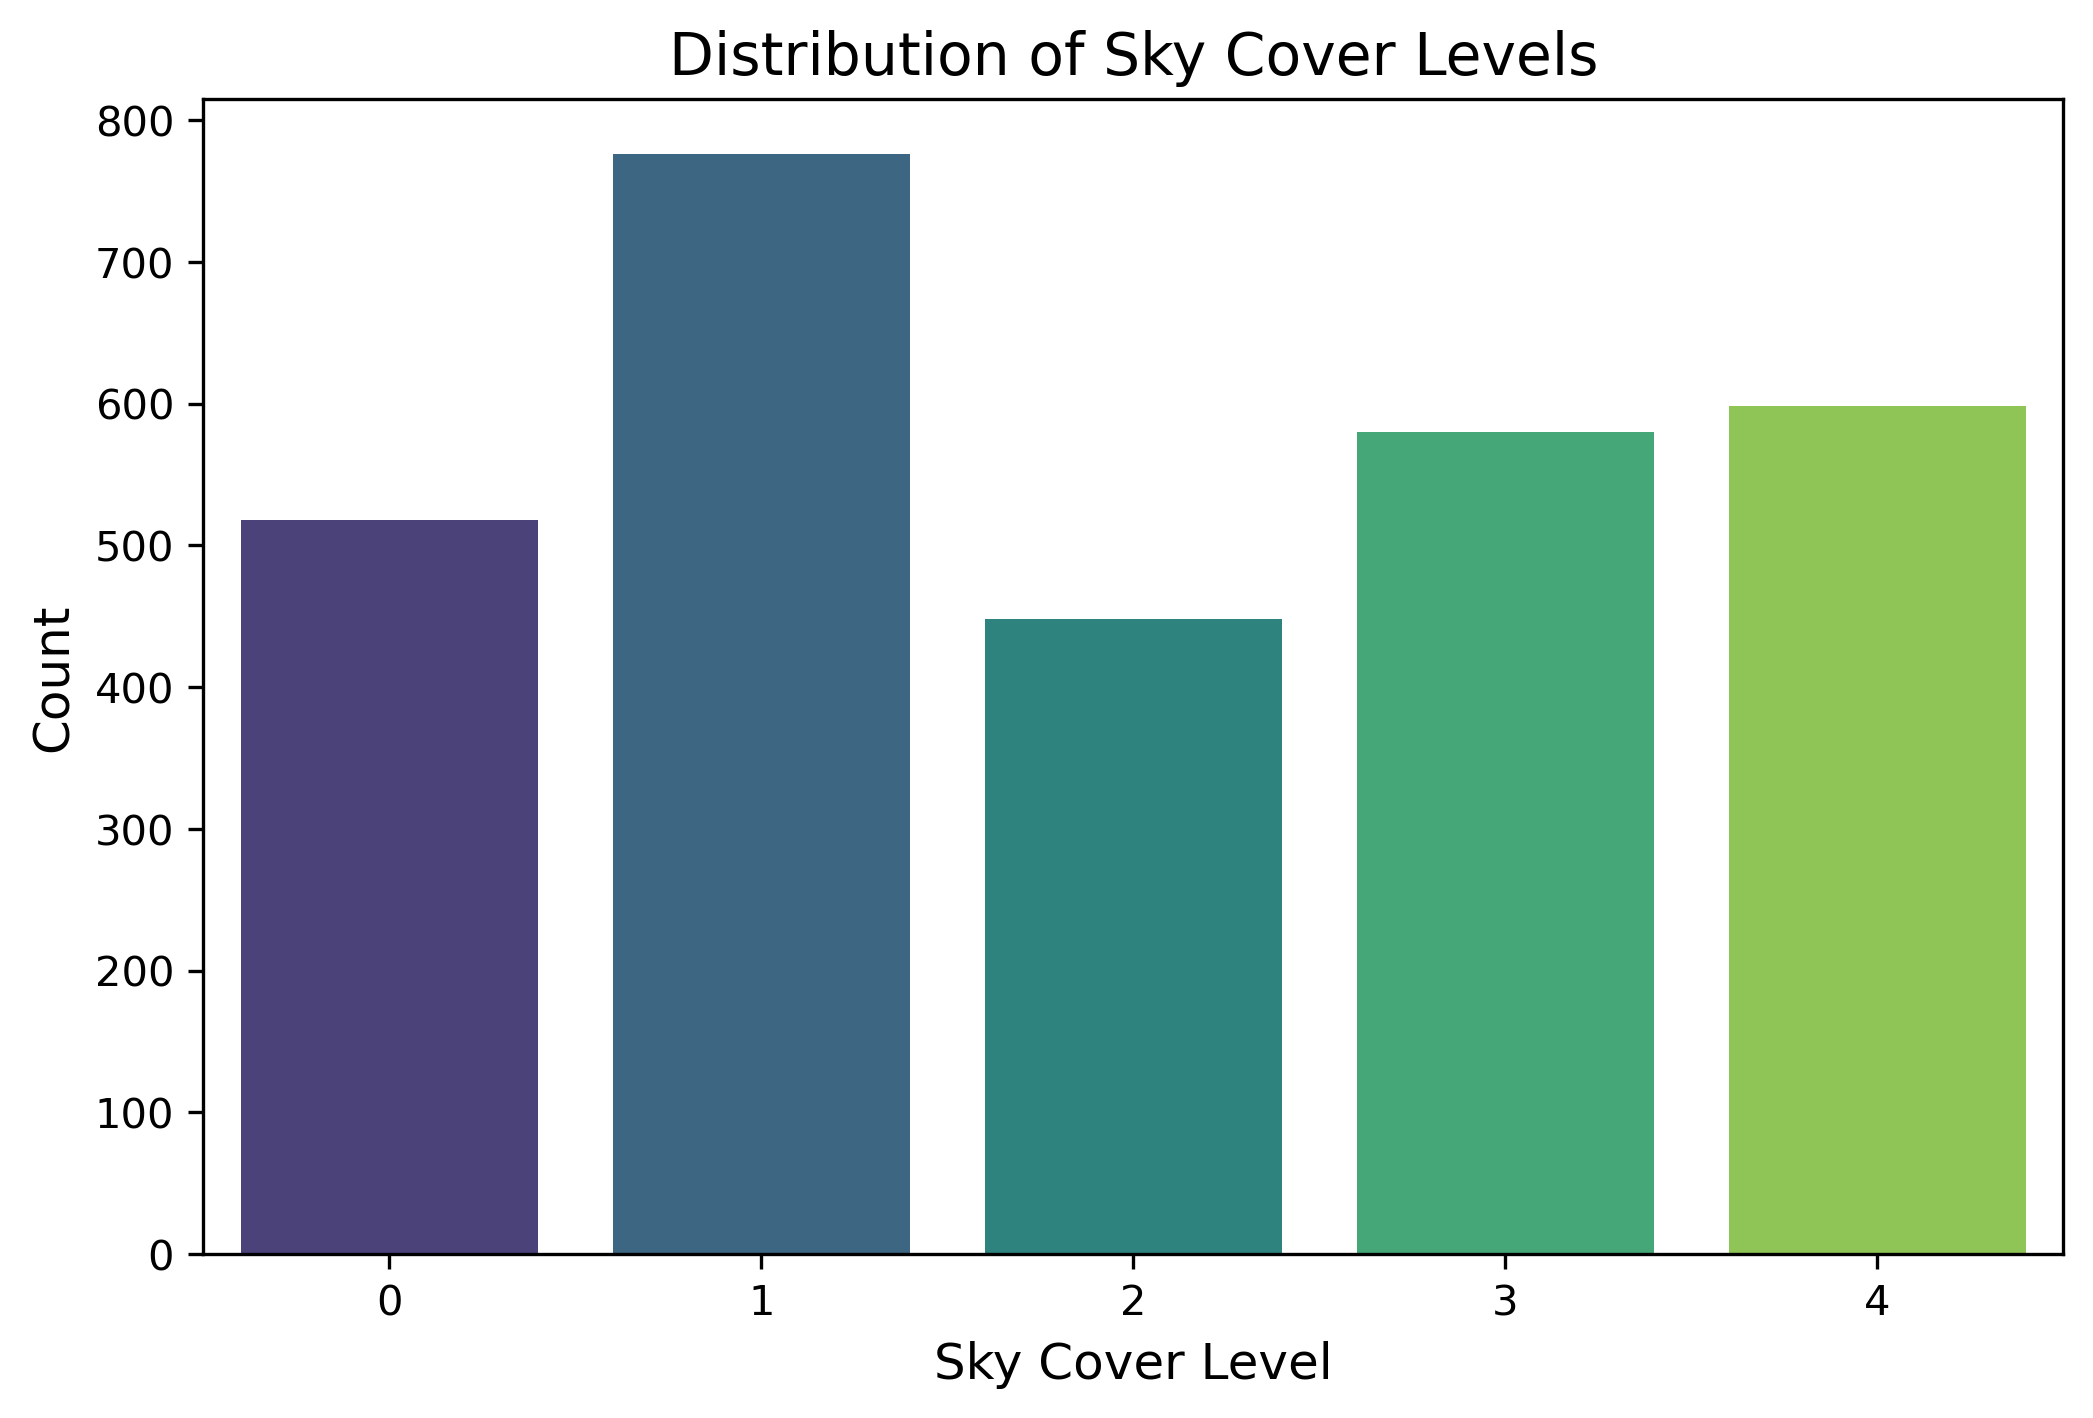

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sky_cover_encoded', palette='viridis')

# Add title and labels
plt.title('Distribution of Sky Cover Levels', fontsize=14)
plt.xlabel('Sky Cover Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

# CHECKING FOR MISSING VALUES

In [20]:
df.isna().sum()

distance_to_solar_noon         0
temperature                    0
wind_direction                 0
wind_speed                     0
visibility                     0
humidity                       0
average_wind_speed_(period)    1
average_pressure_(period)      0
power_generated                0
sky_cover_encoded              0
dtype: int64

In [21]:
for i in df.isna().sum():
    print(f'{(i/len(df))*100} %')

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.03424657534246575 %
0.0 %
0.0 %
0.0 %


In [22]:
#FILLING WITH MEDIAN
df['average_wind_speed_(period)']=df['average_wind_speed_(period)'].fillna(df['average_wind_speed_(period)'].median())

In [23]:
df.isna().sum()

distance_to_solar_noon         0
temperature                    0
wind_direction                 0
wind_speed                     0
visibility                     0
humidity                       0
average_wind_speed_(period)    0
average_pressure_(period)      0
power_generated                0
sky_cover_encoded              0
dtype: int64

# CHECKING FOR DUPLICATES

In [24]:
df.duplicated().sum()

0

# DETECTING AND TREATING OUTLIERS

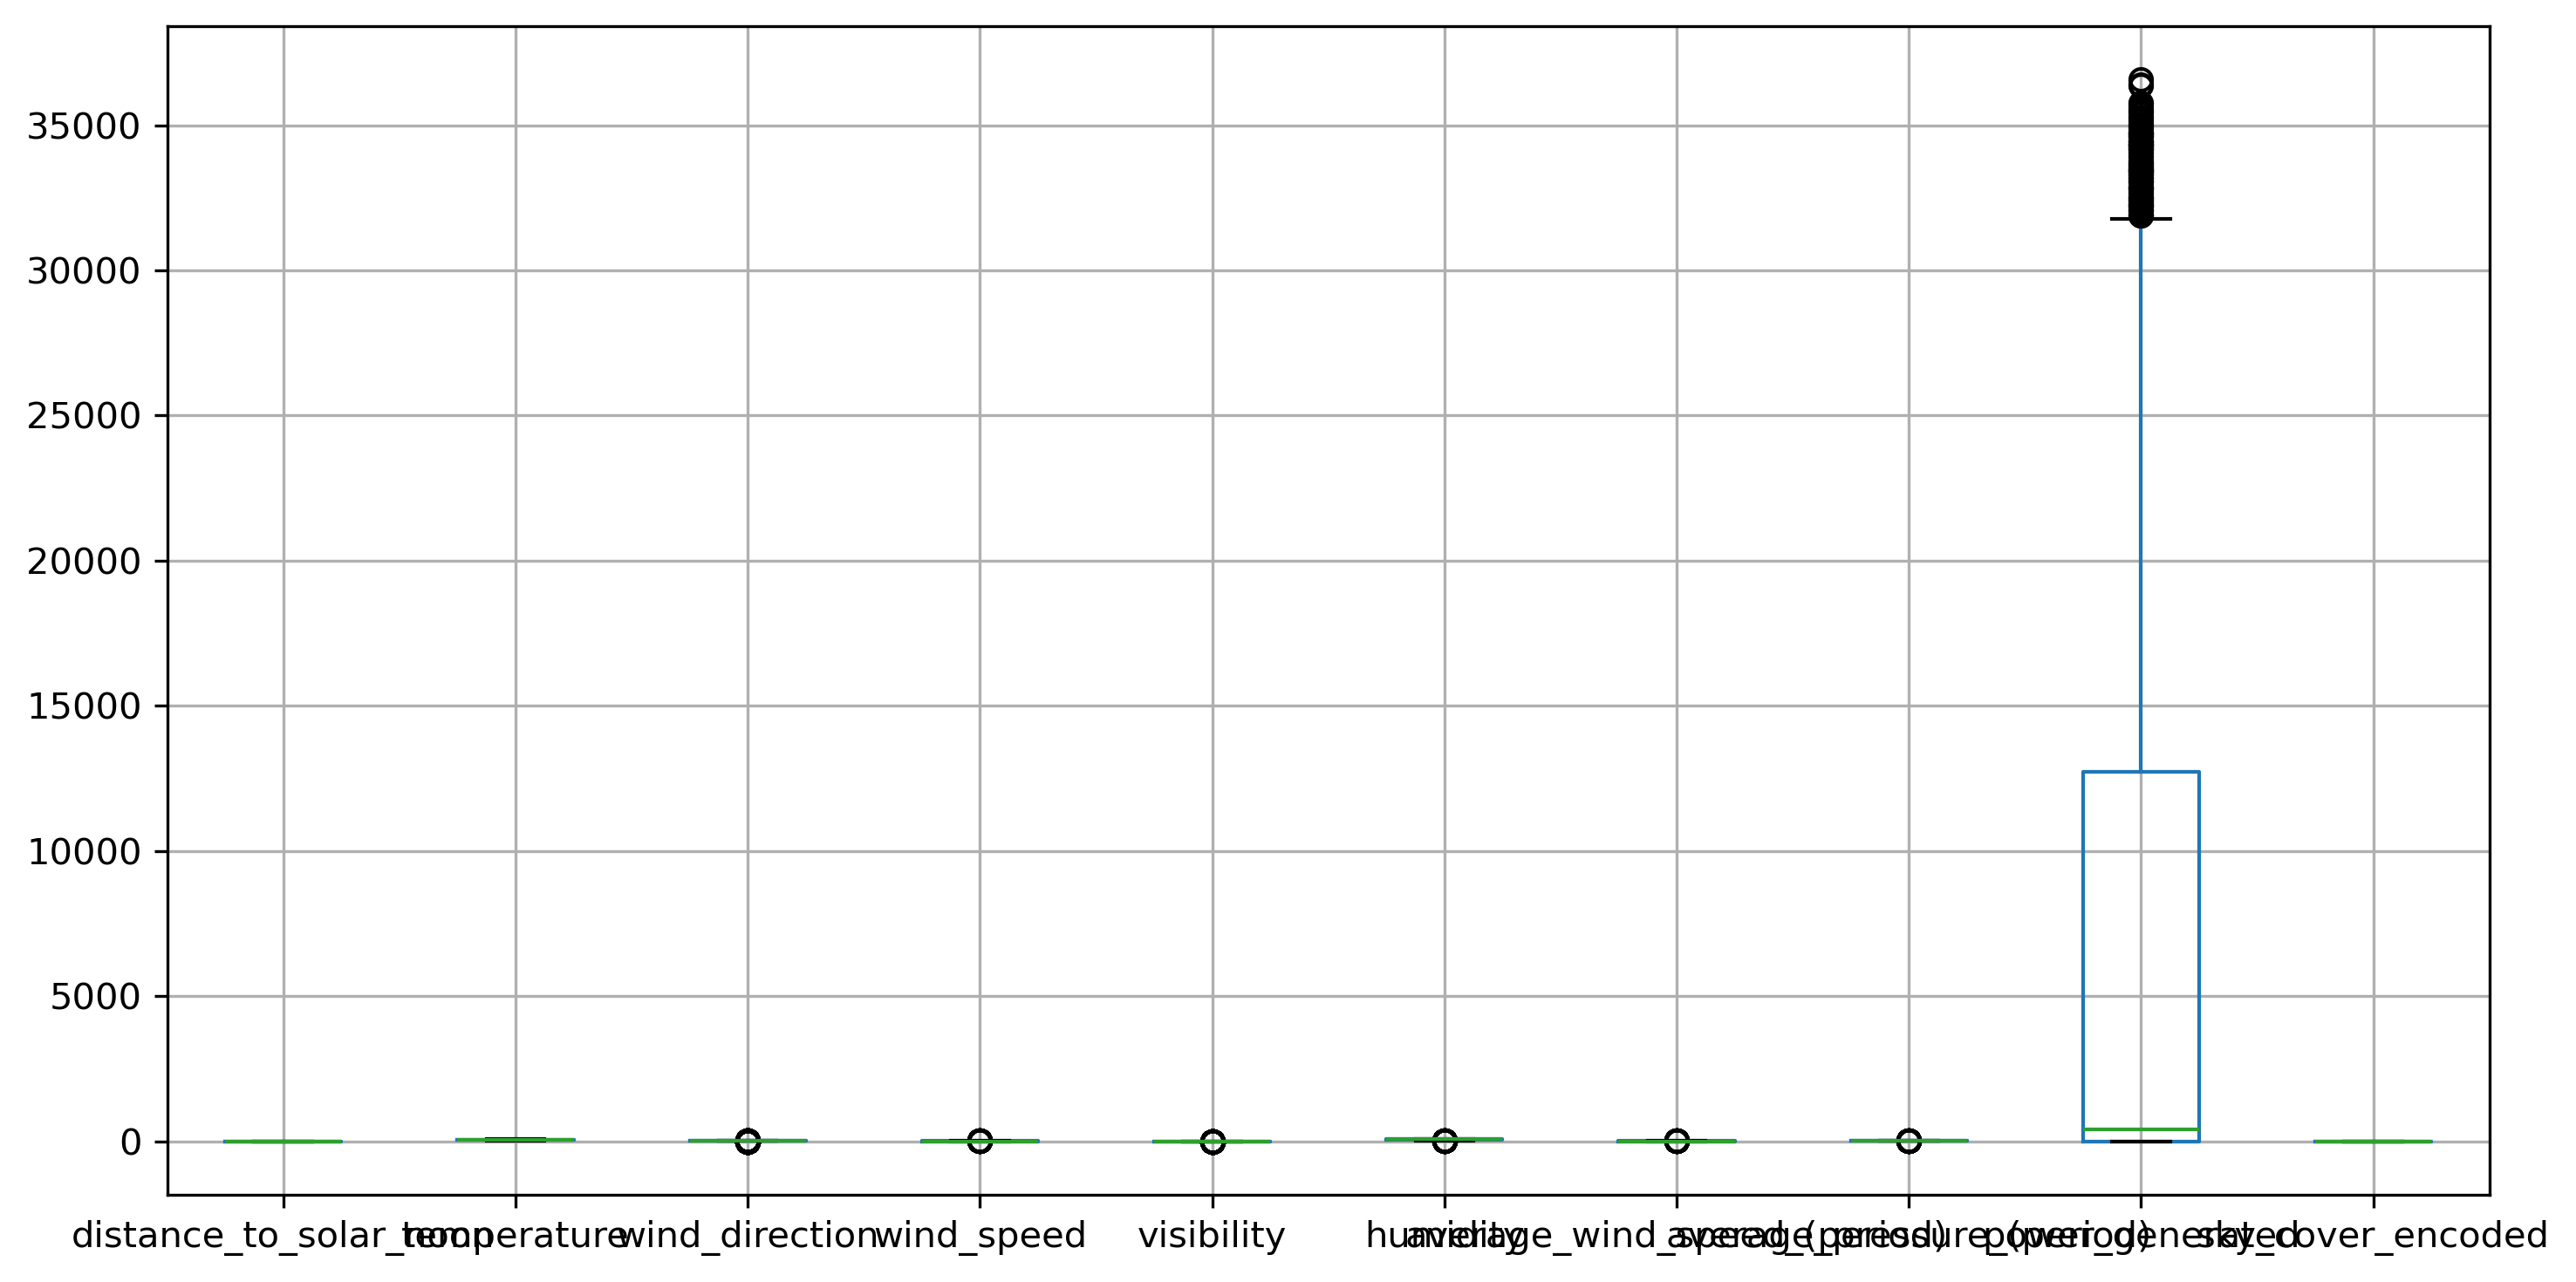

In [25]:
df.boxplot()
plt.tight_layout()

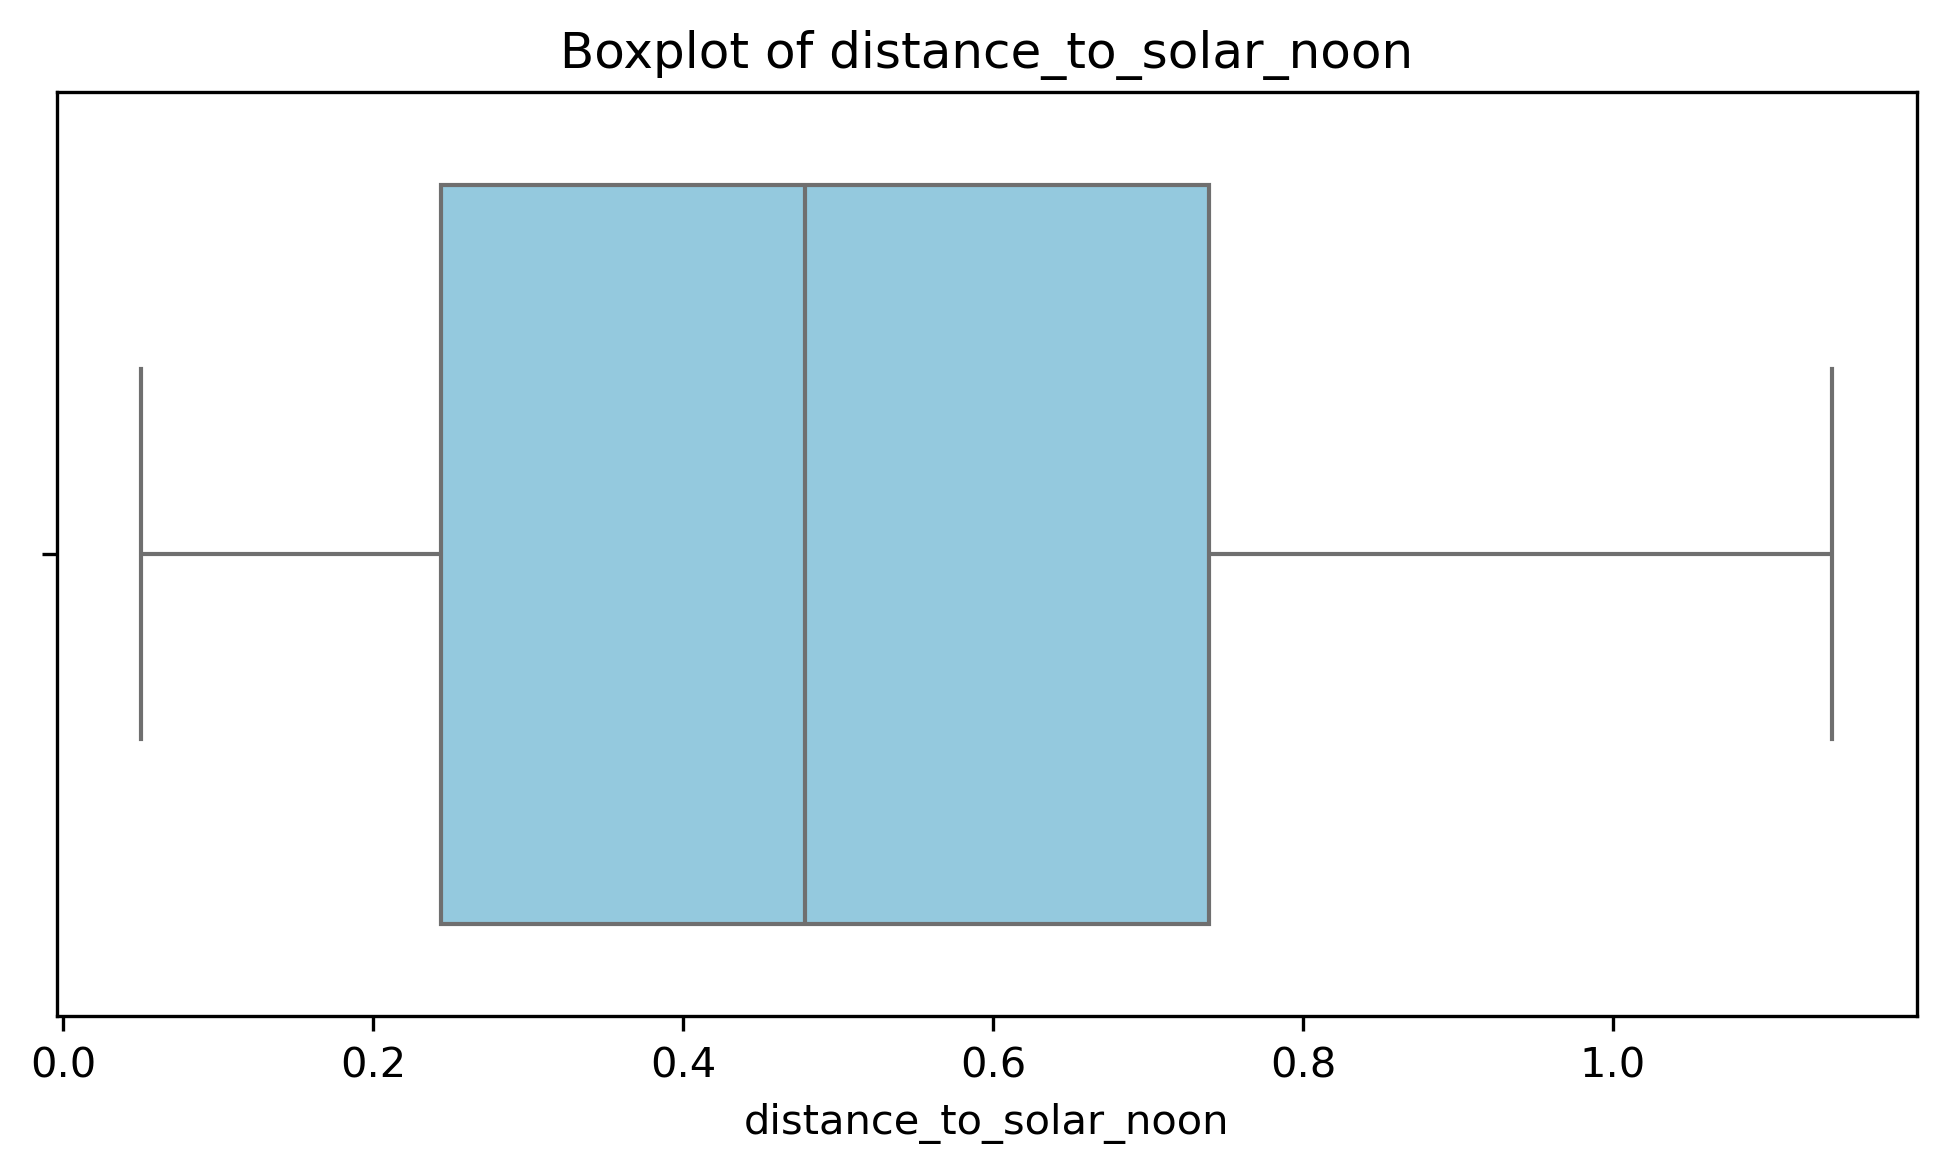

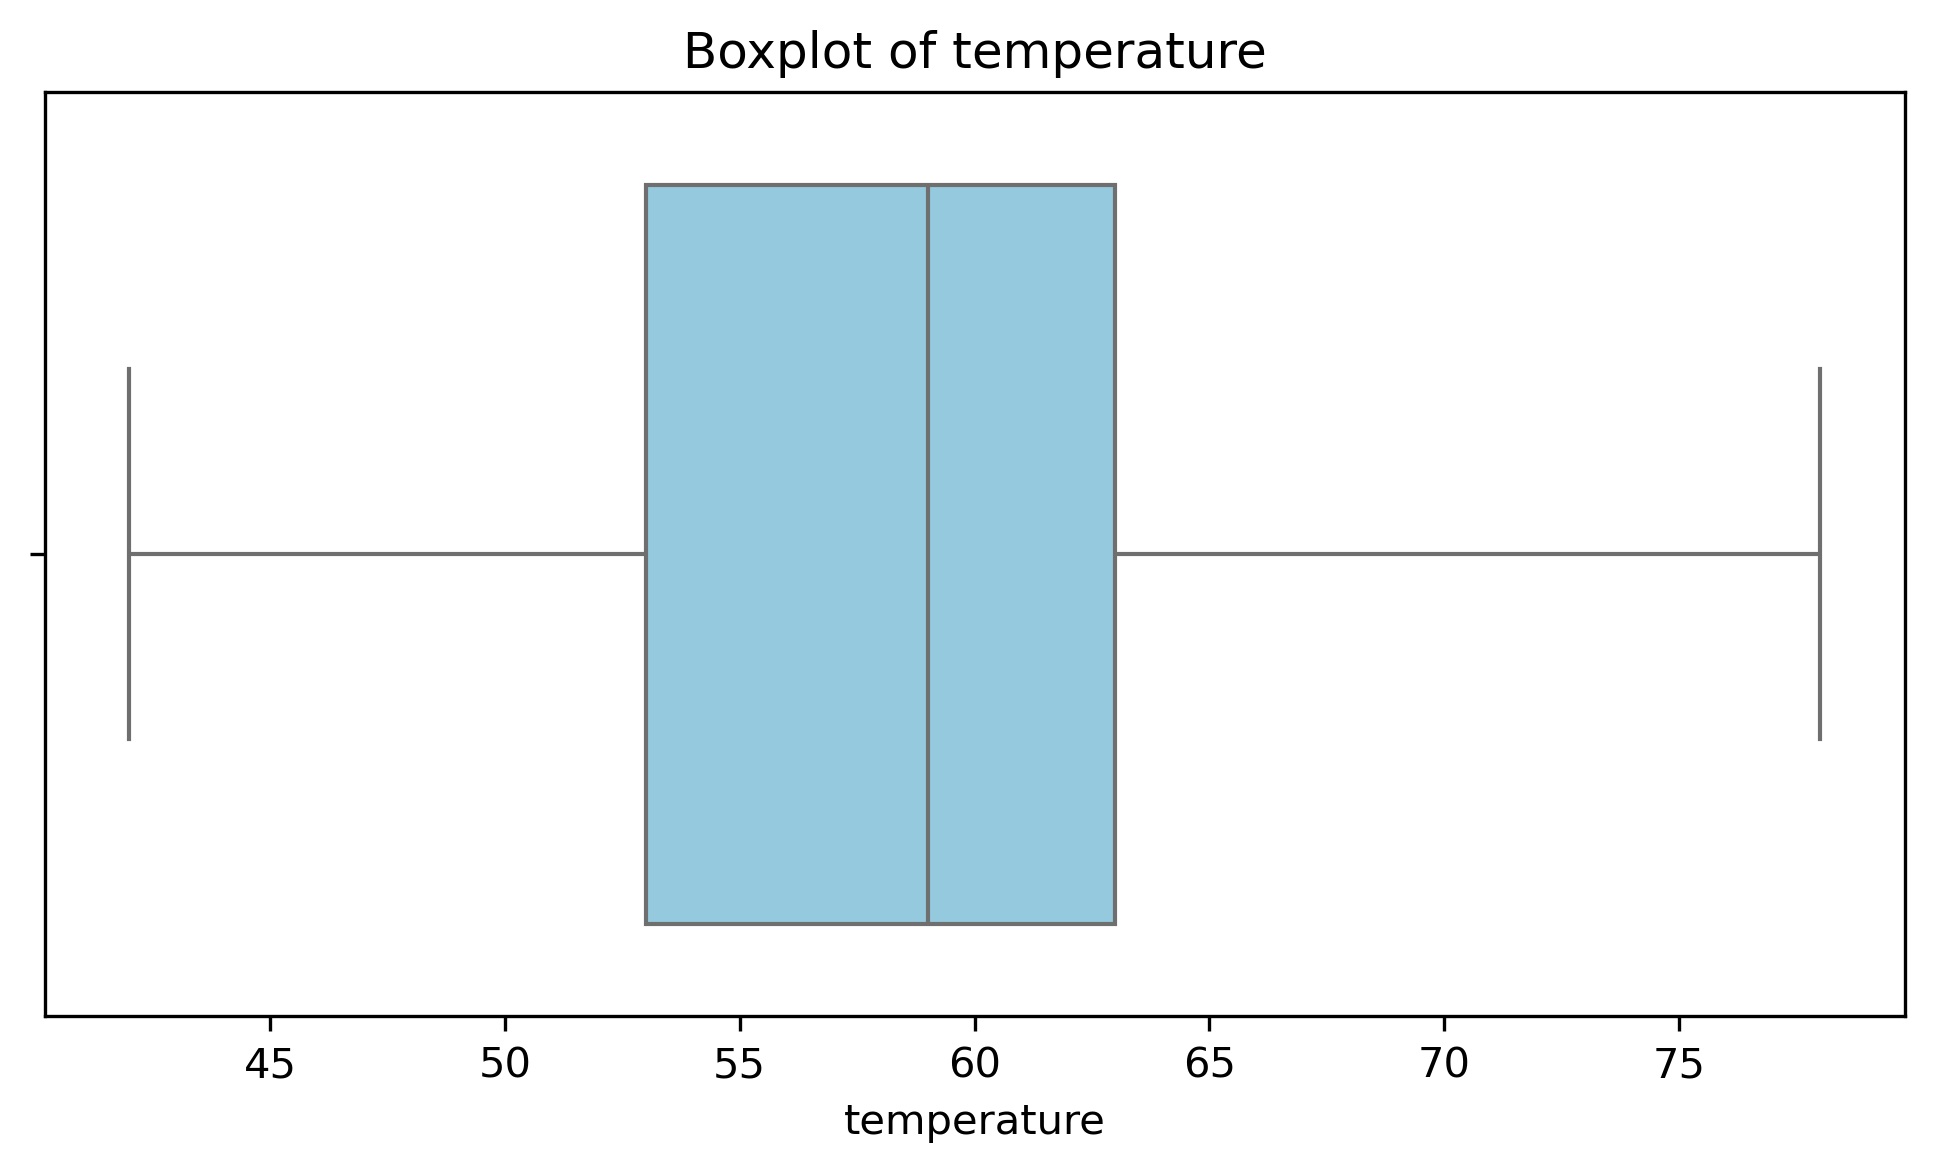

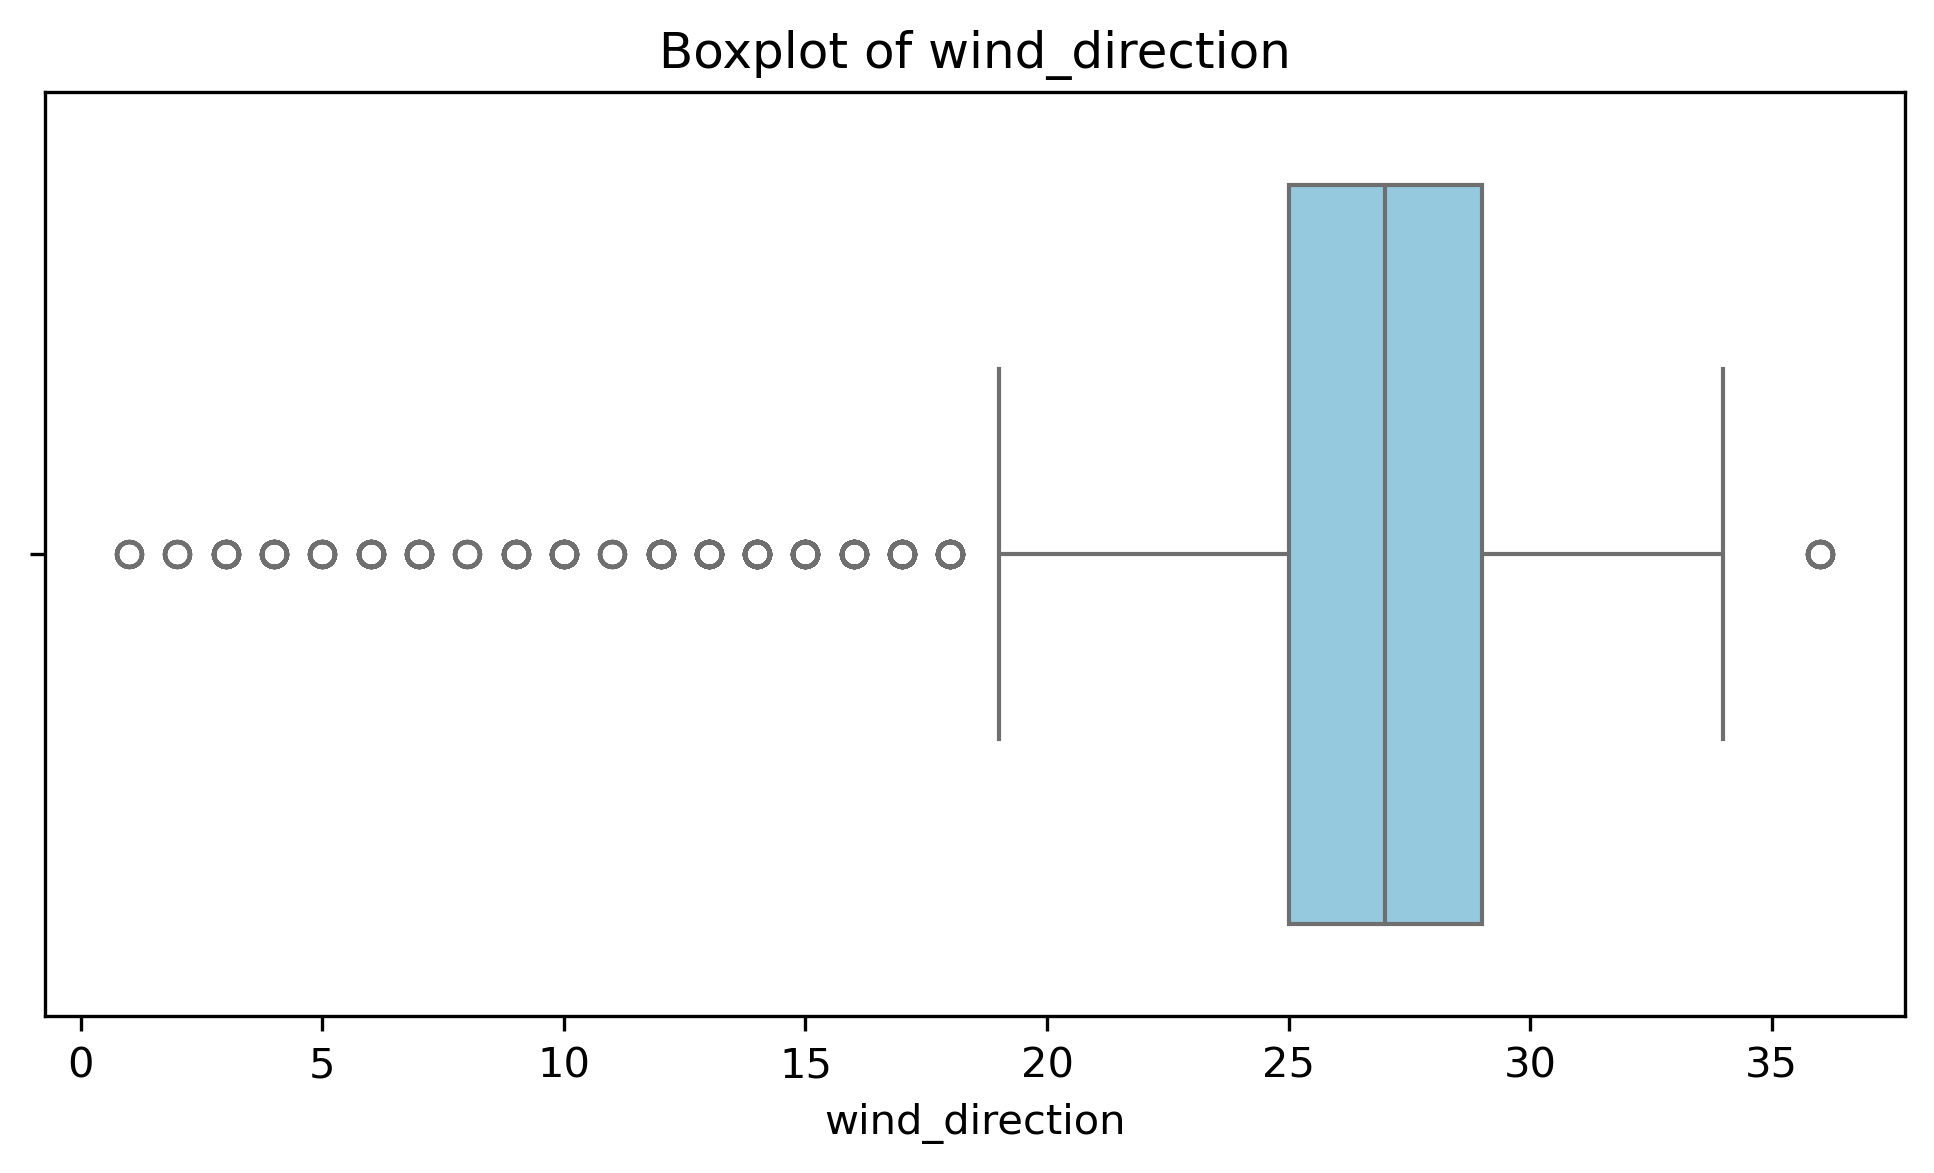

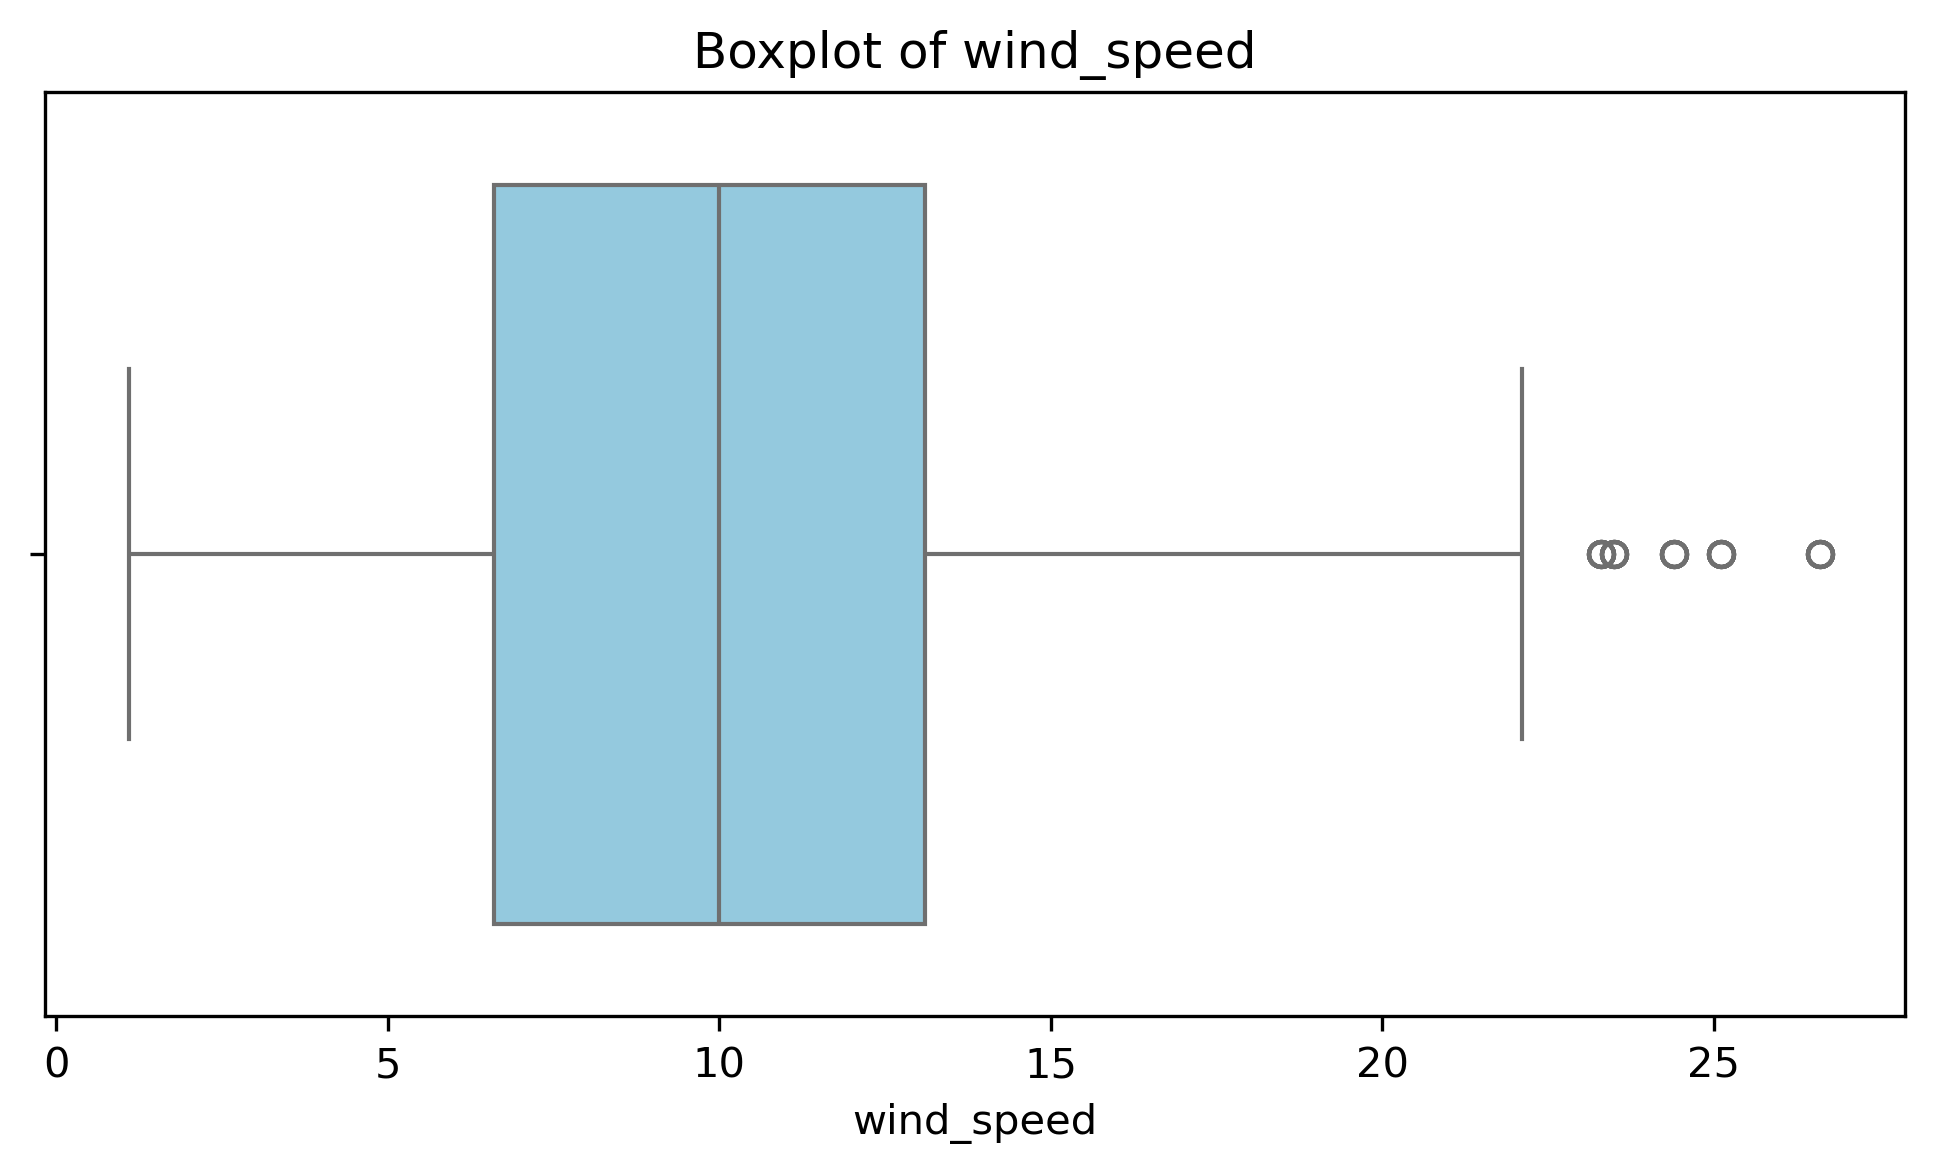

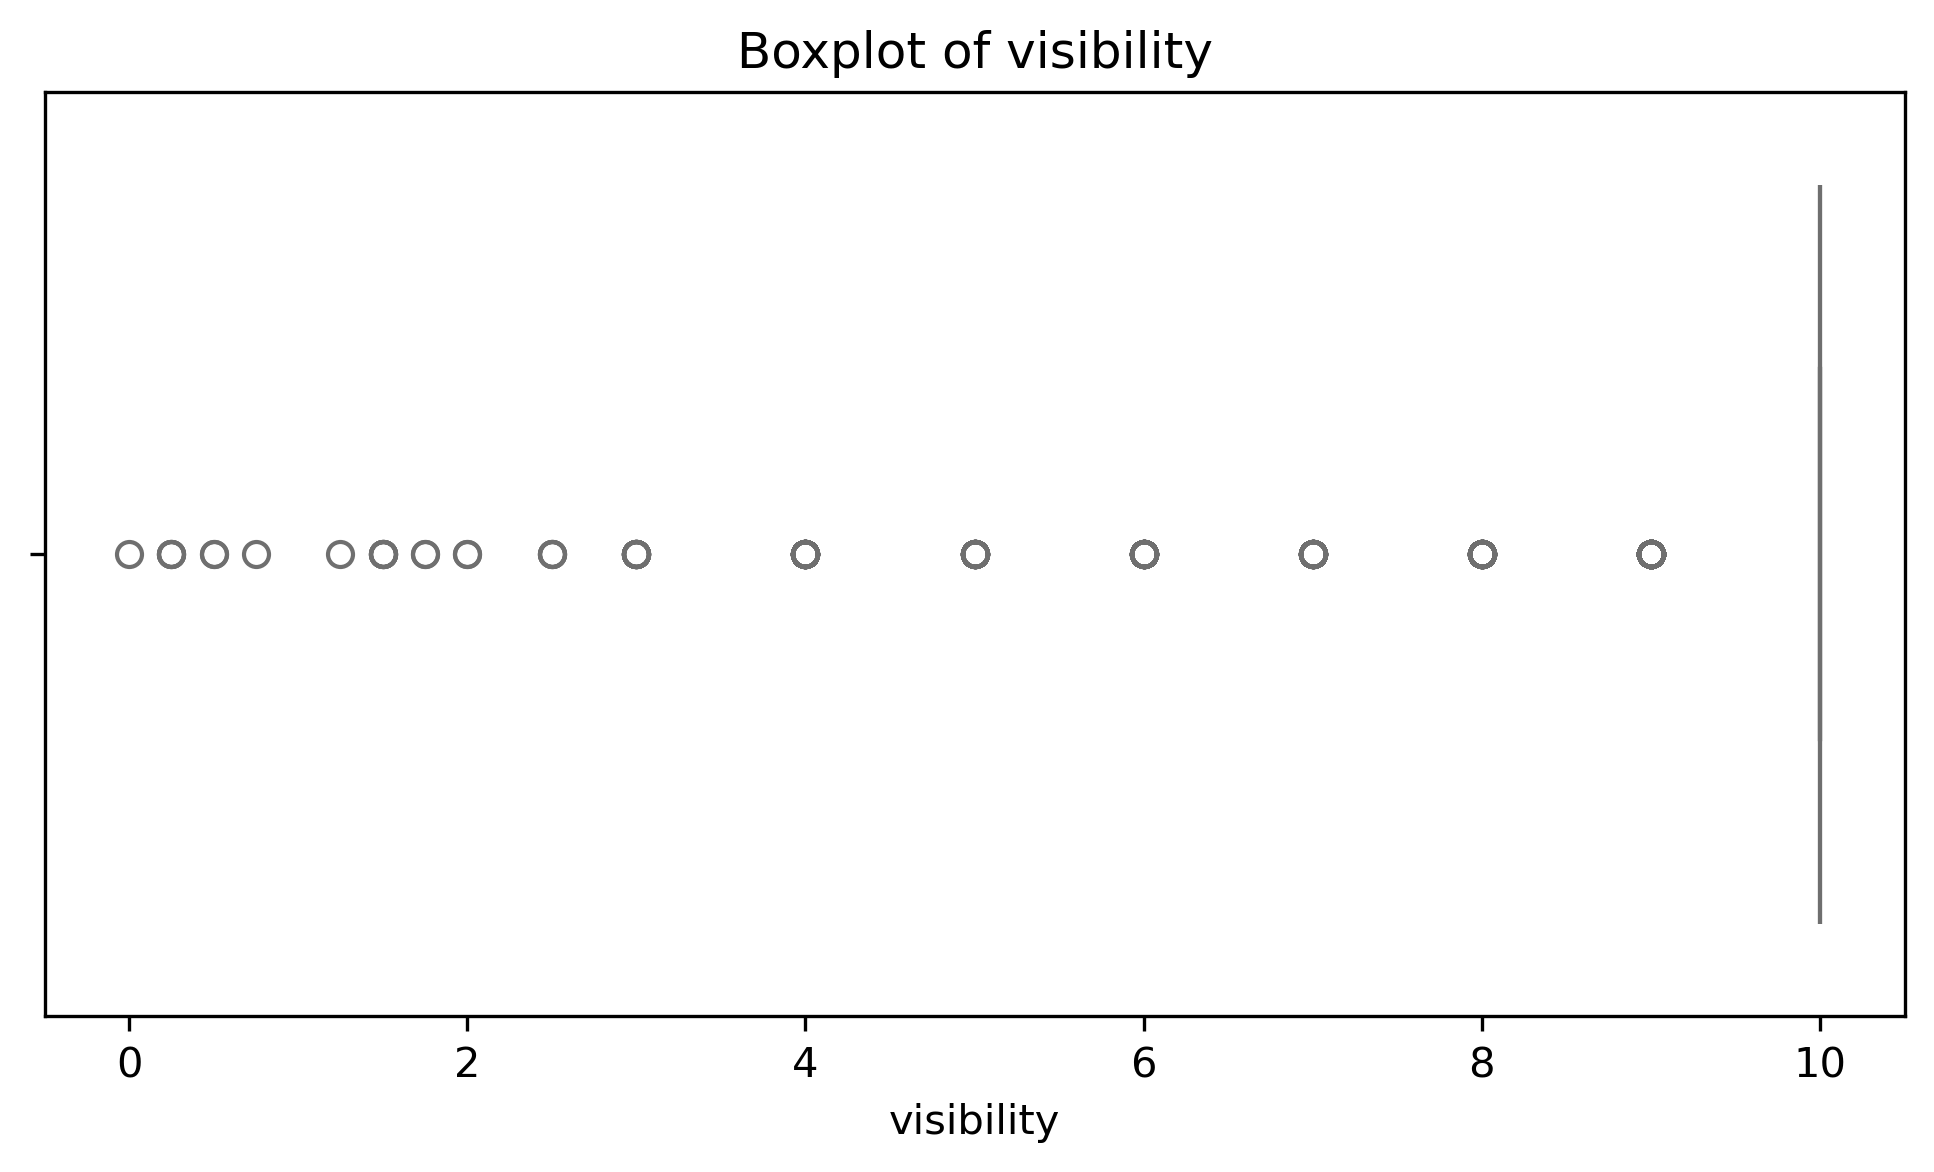

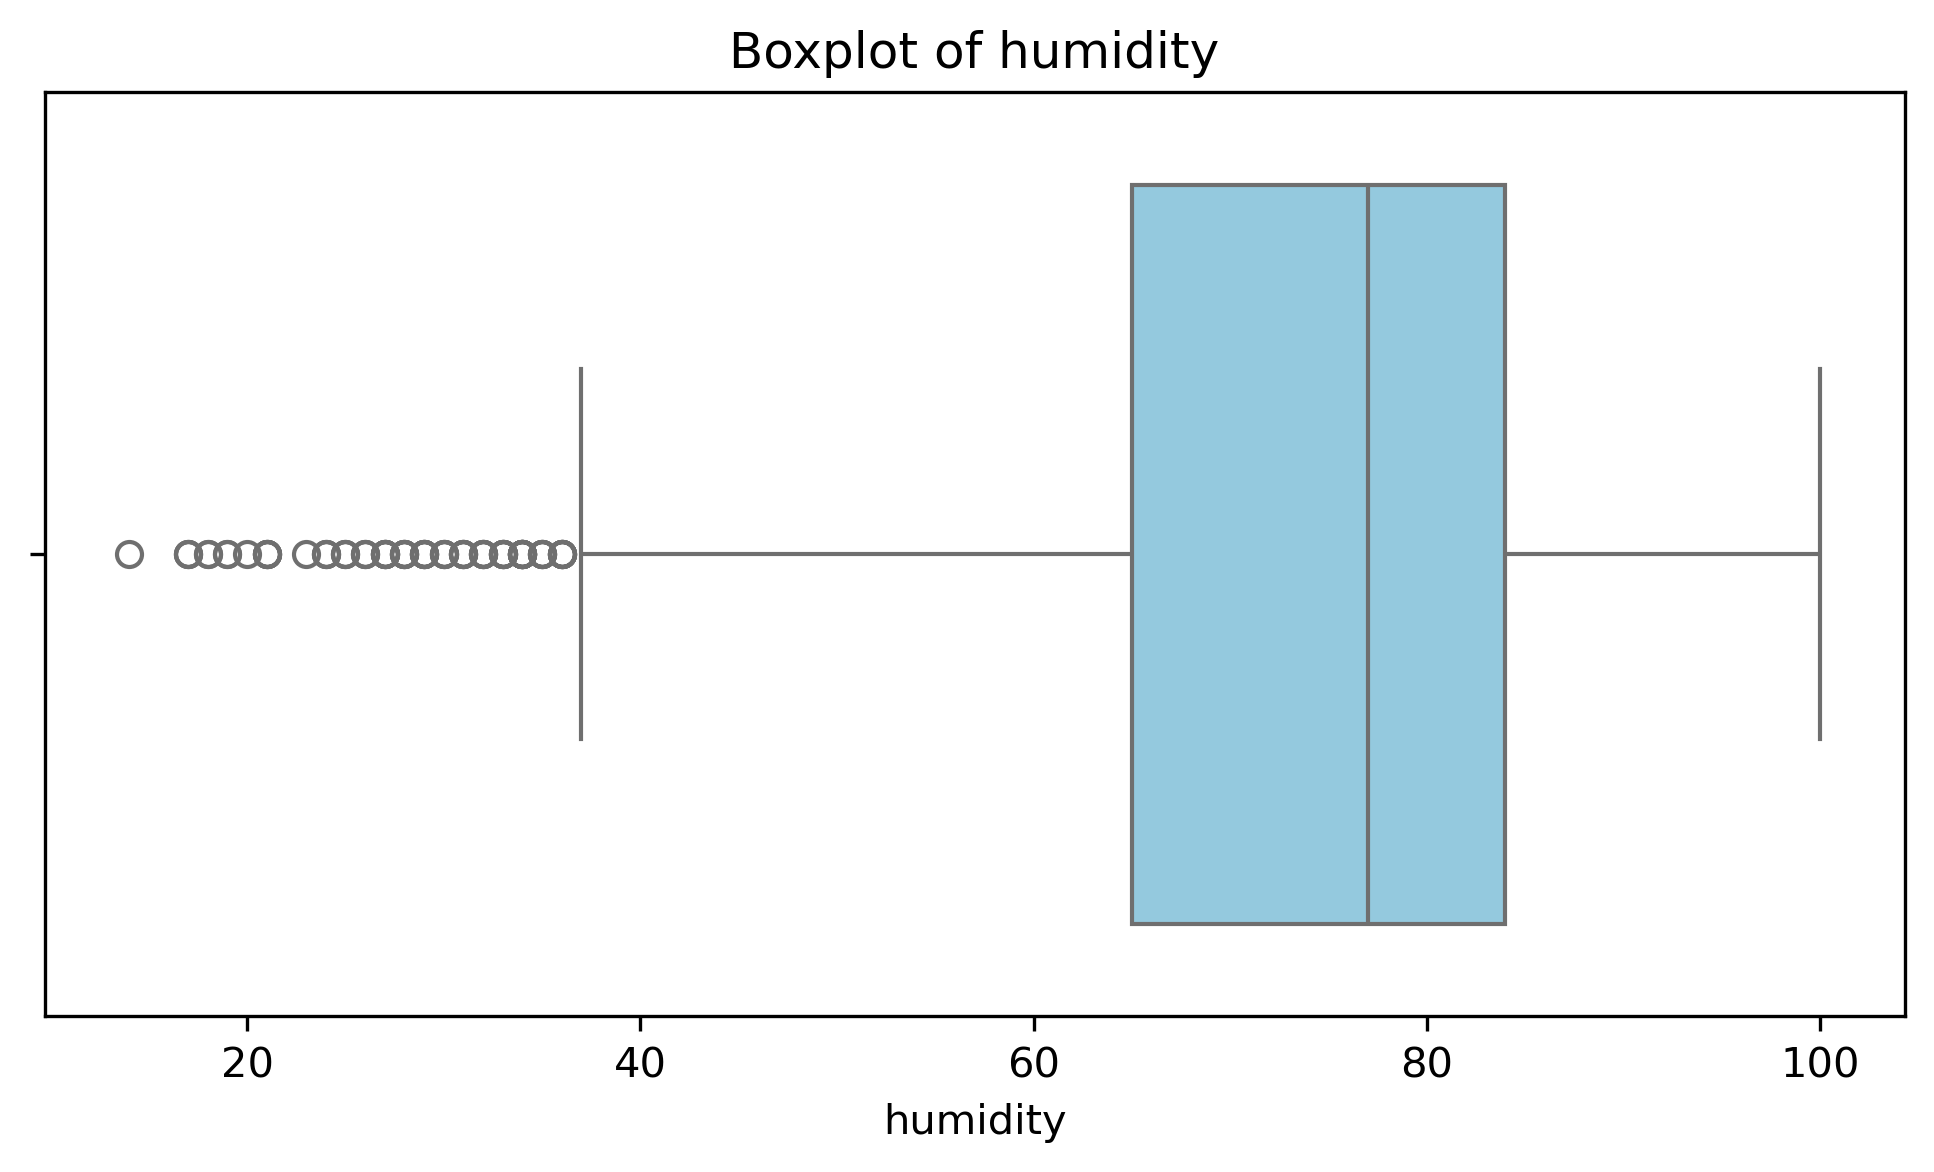

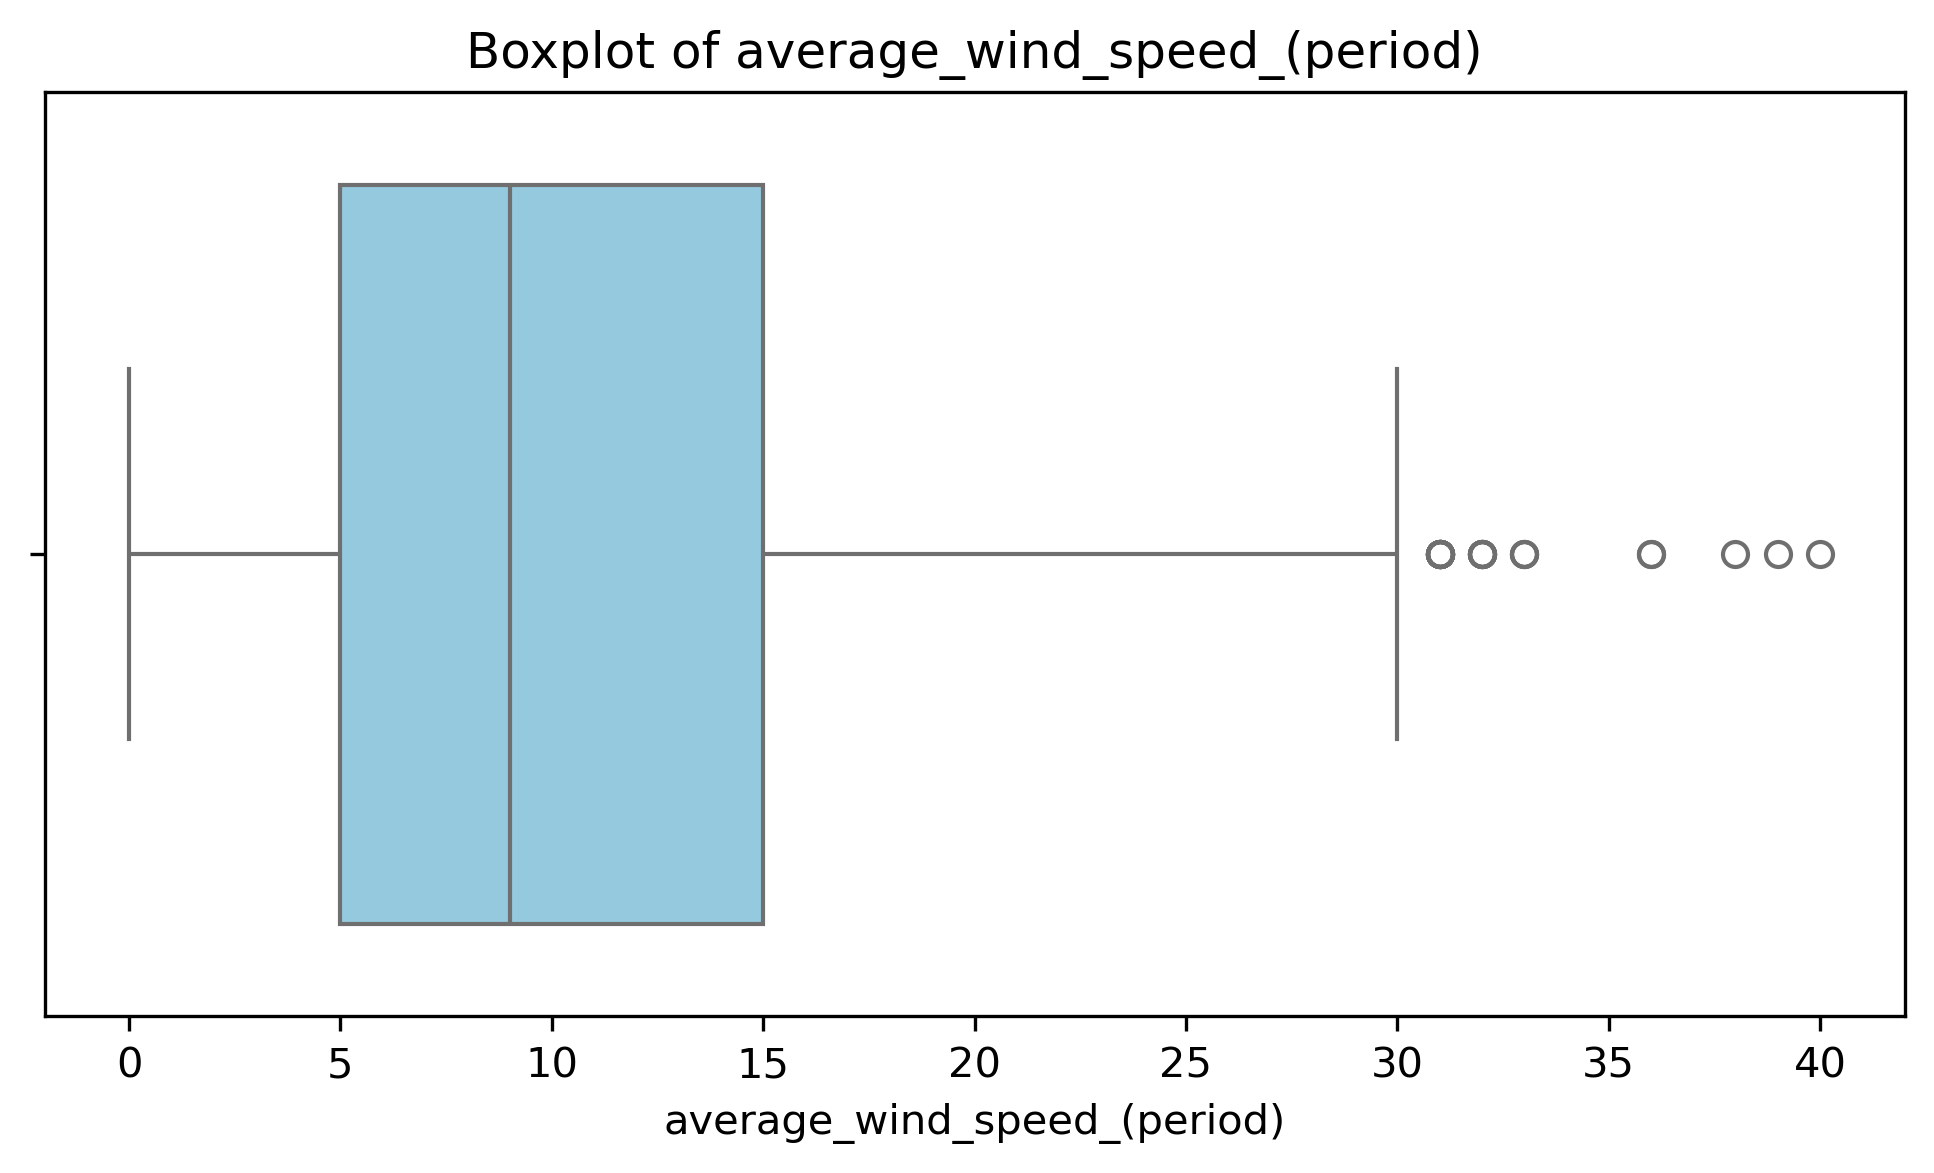

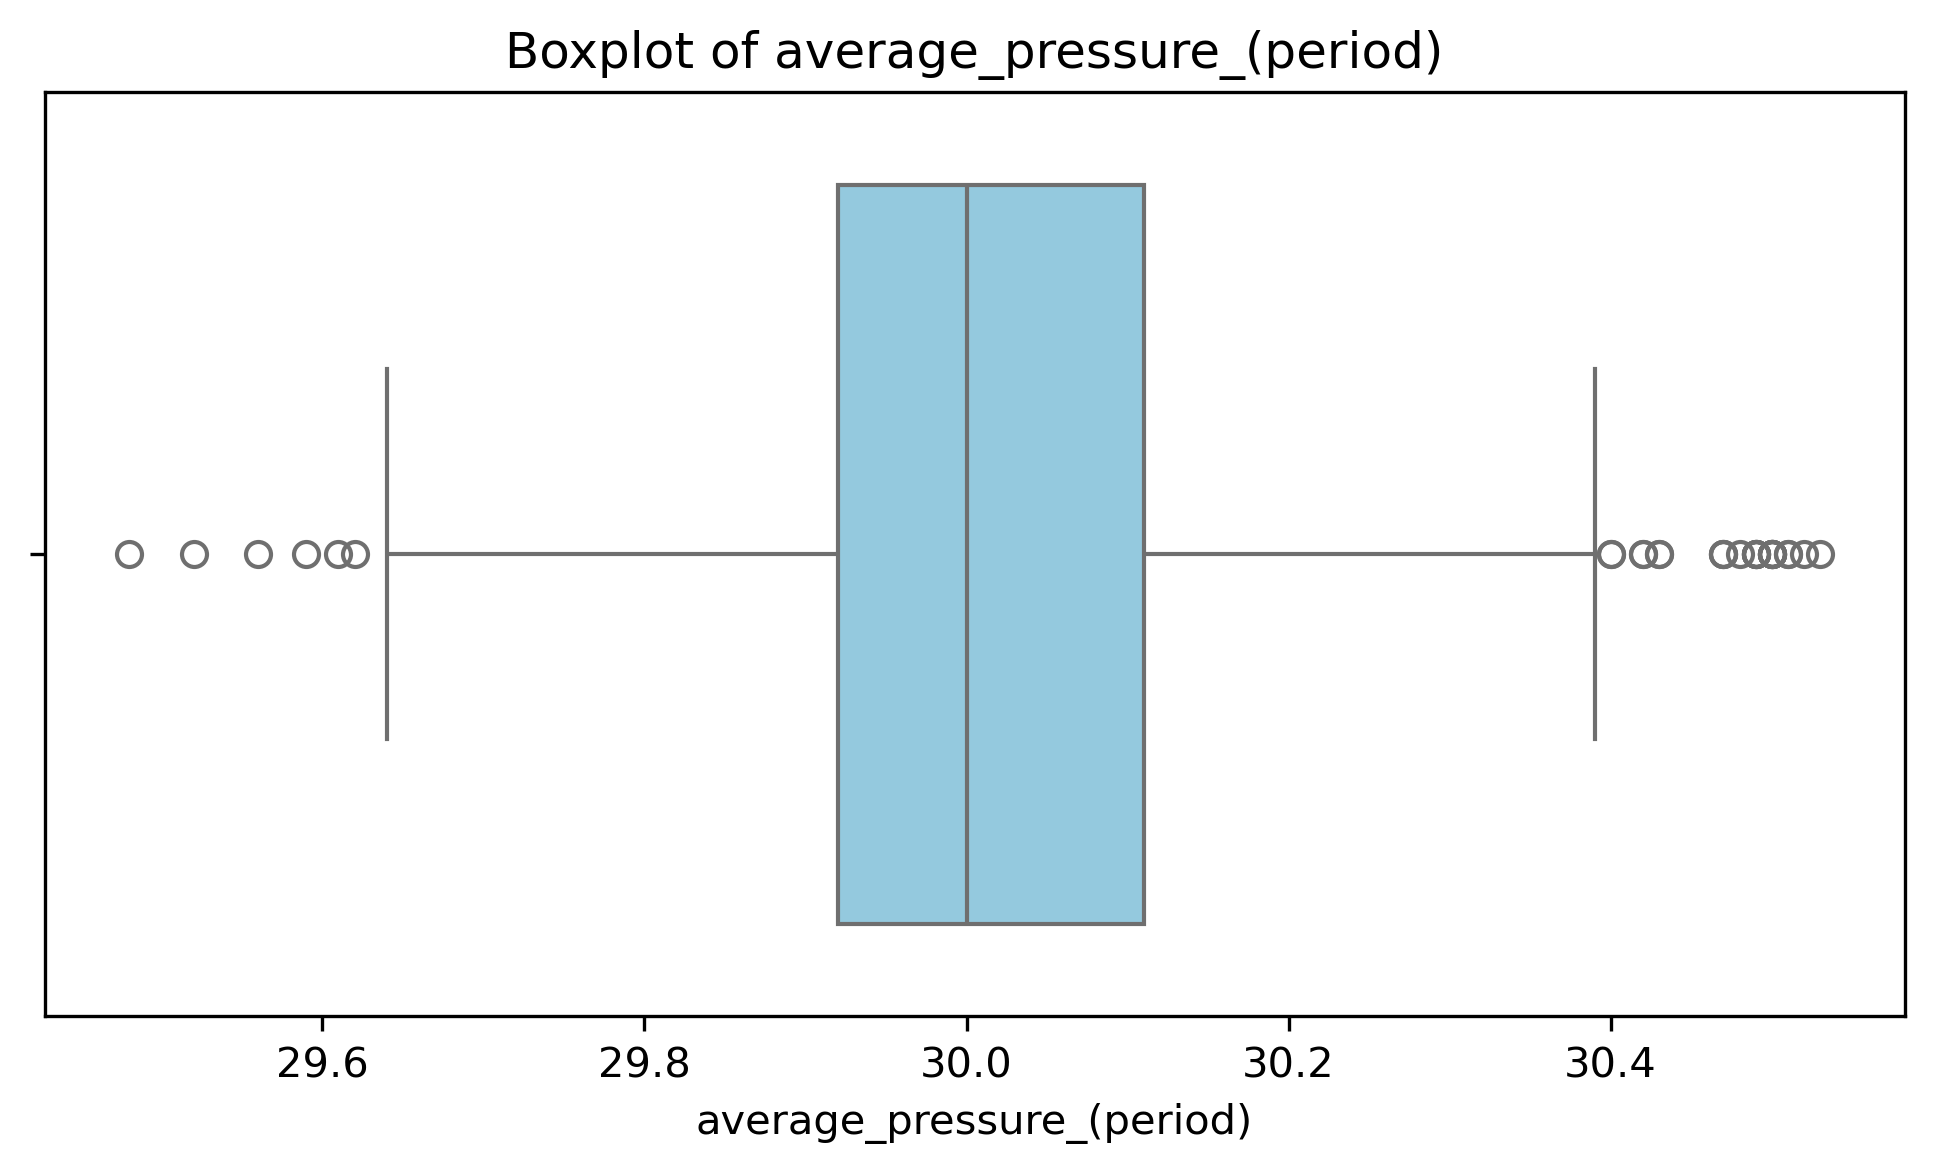

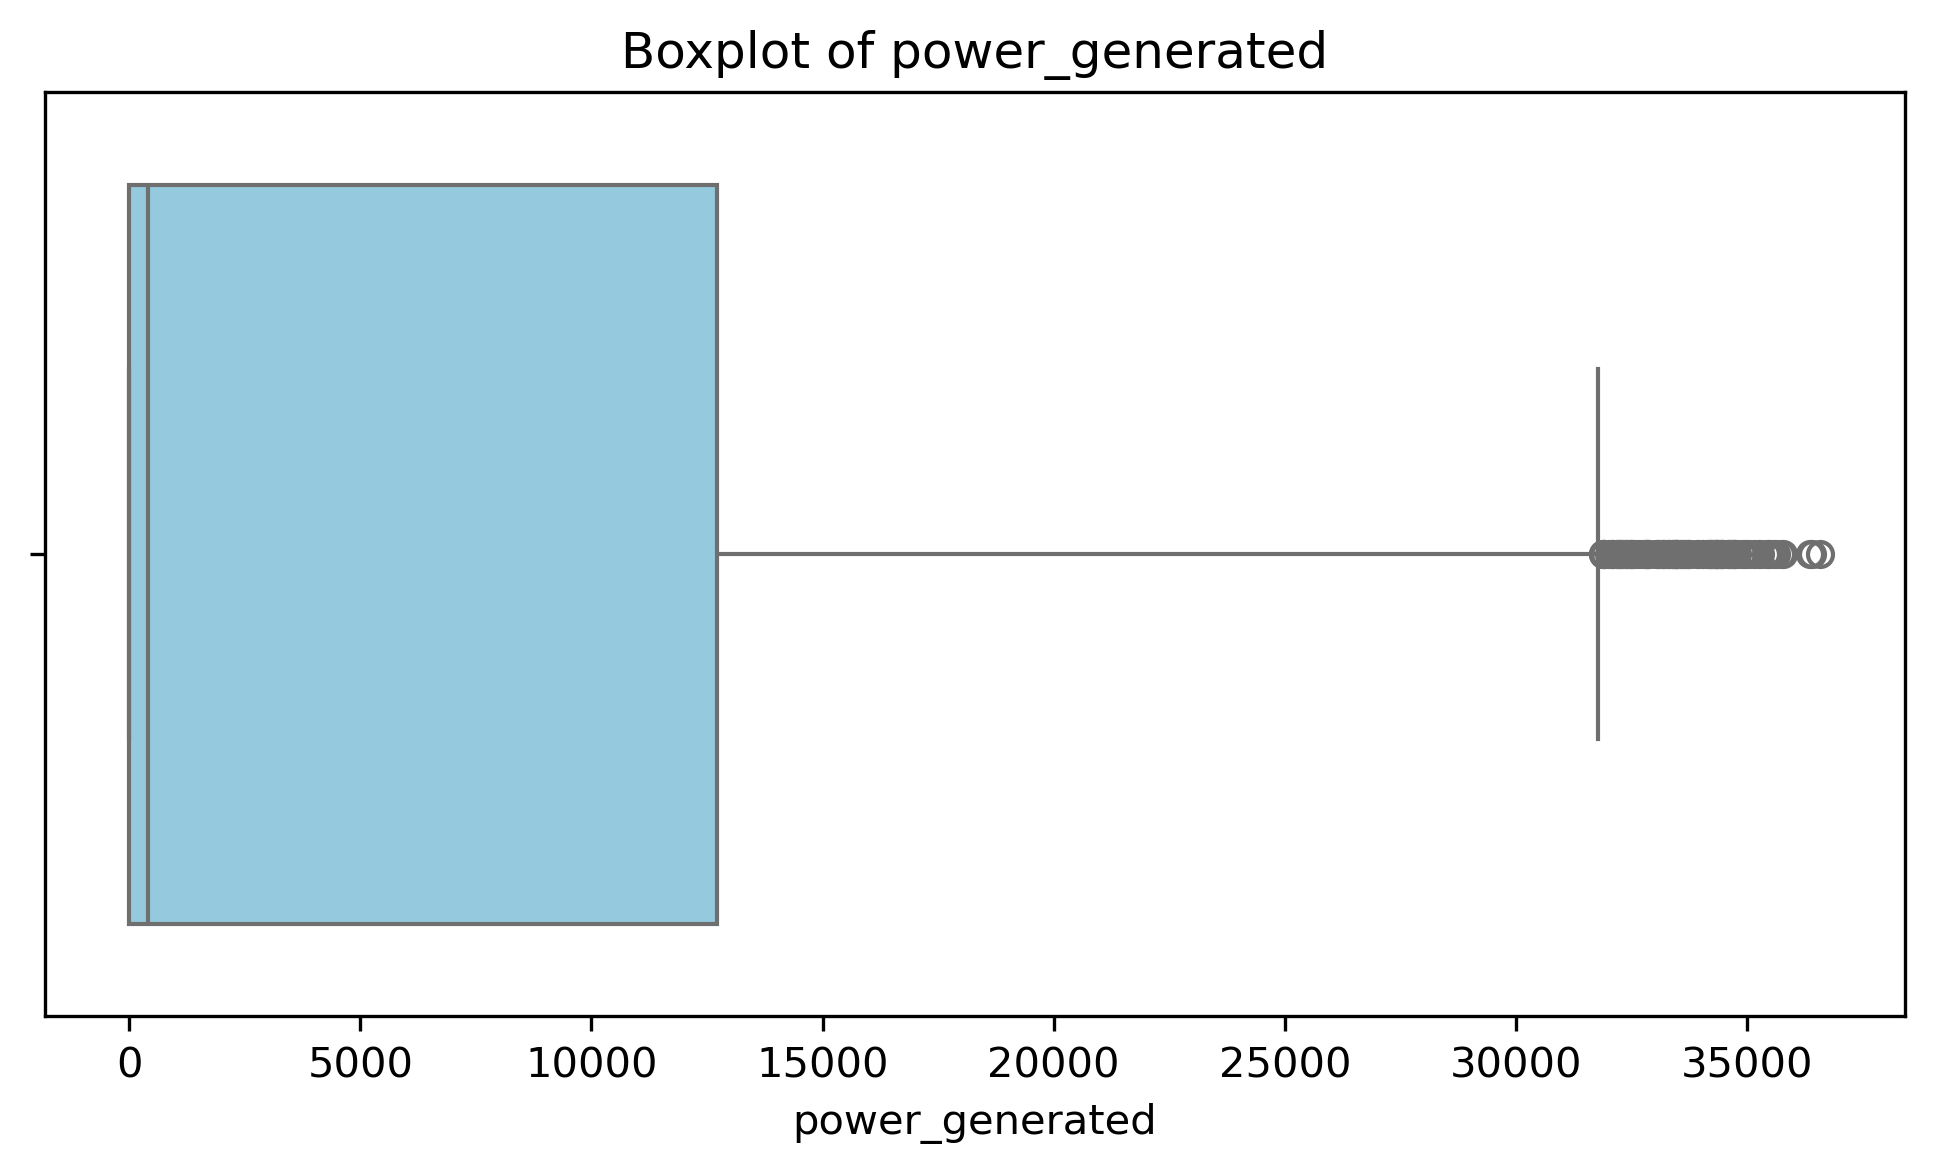

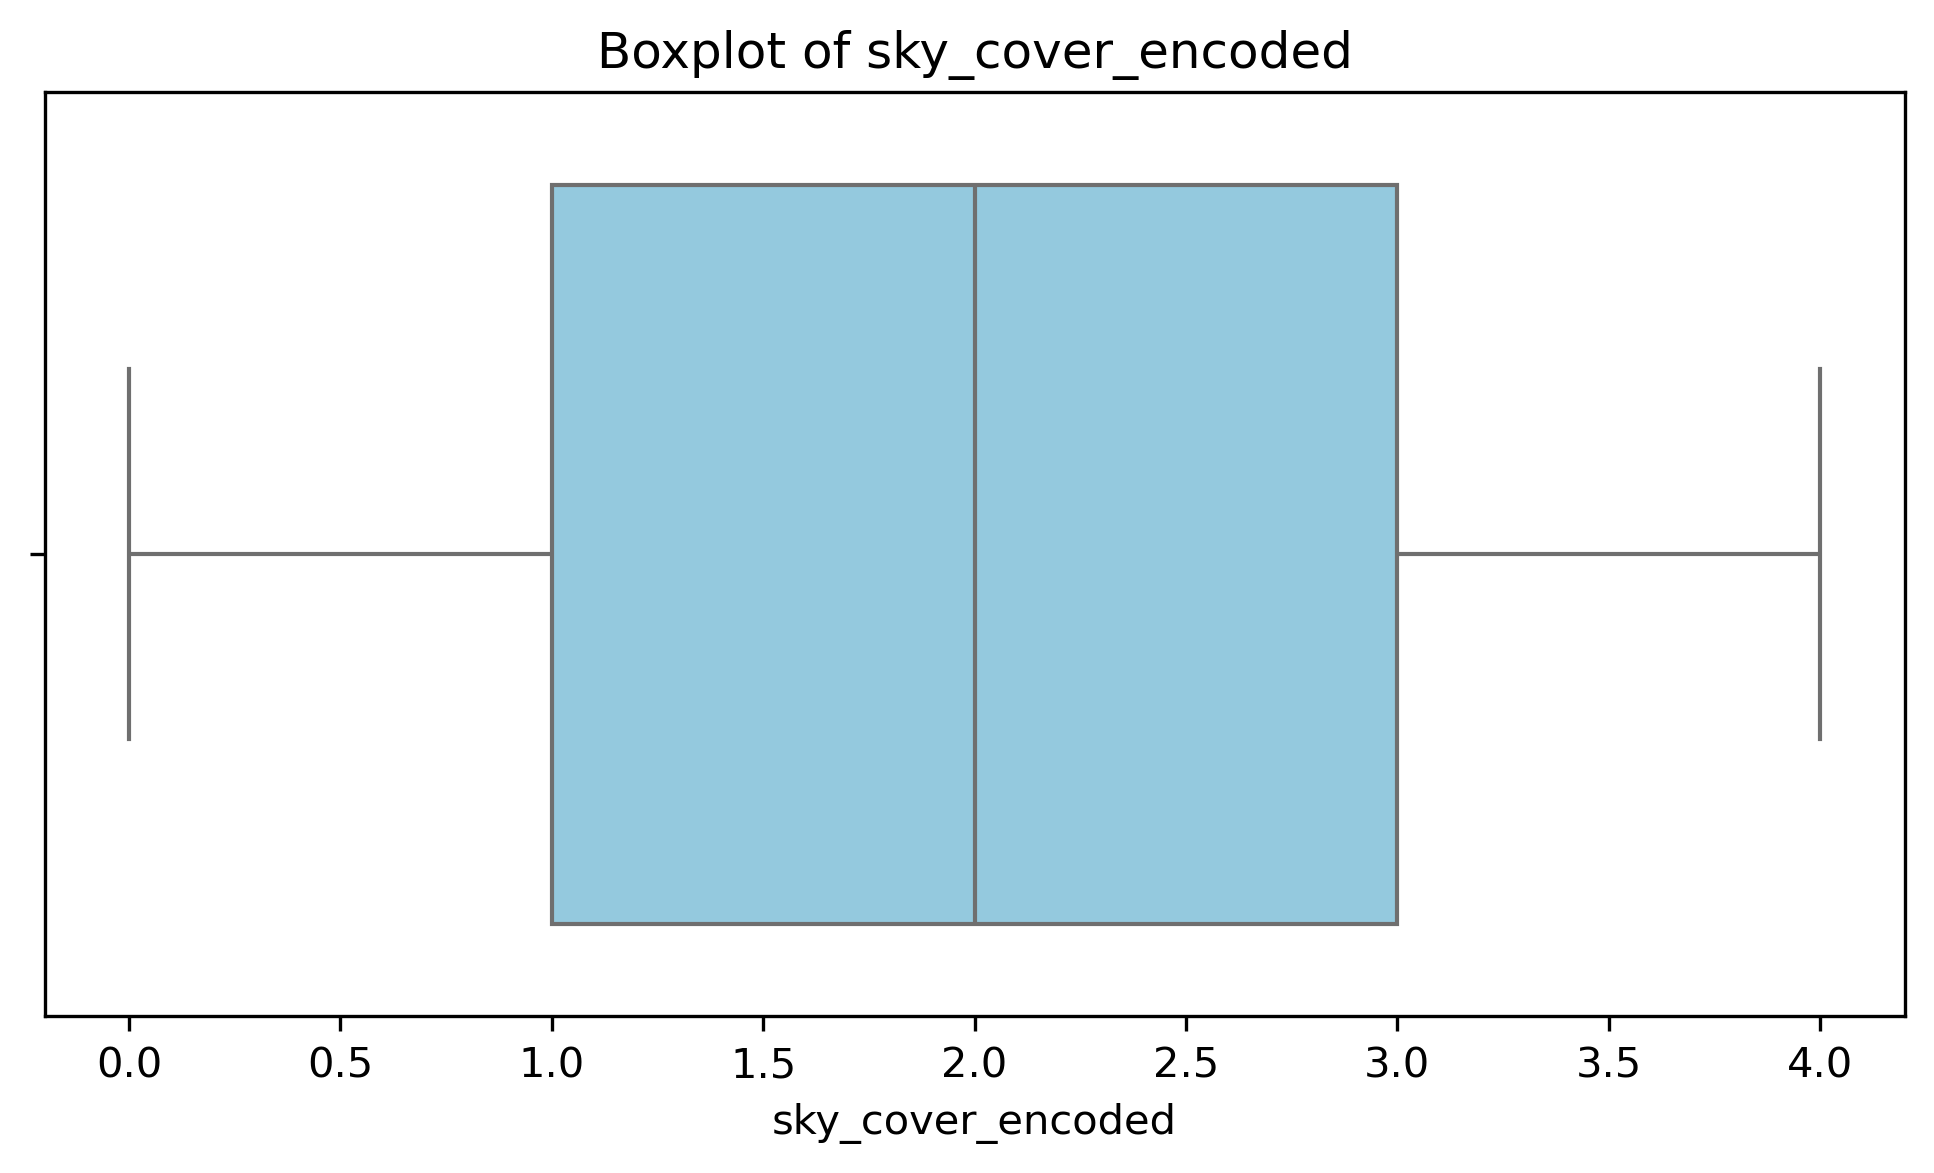

In [26]:

columns_to_plot = df.columns  # Get all column names

# Plot boxplots for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

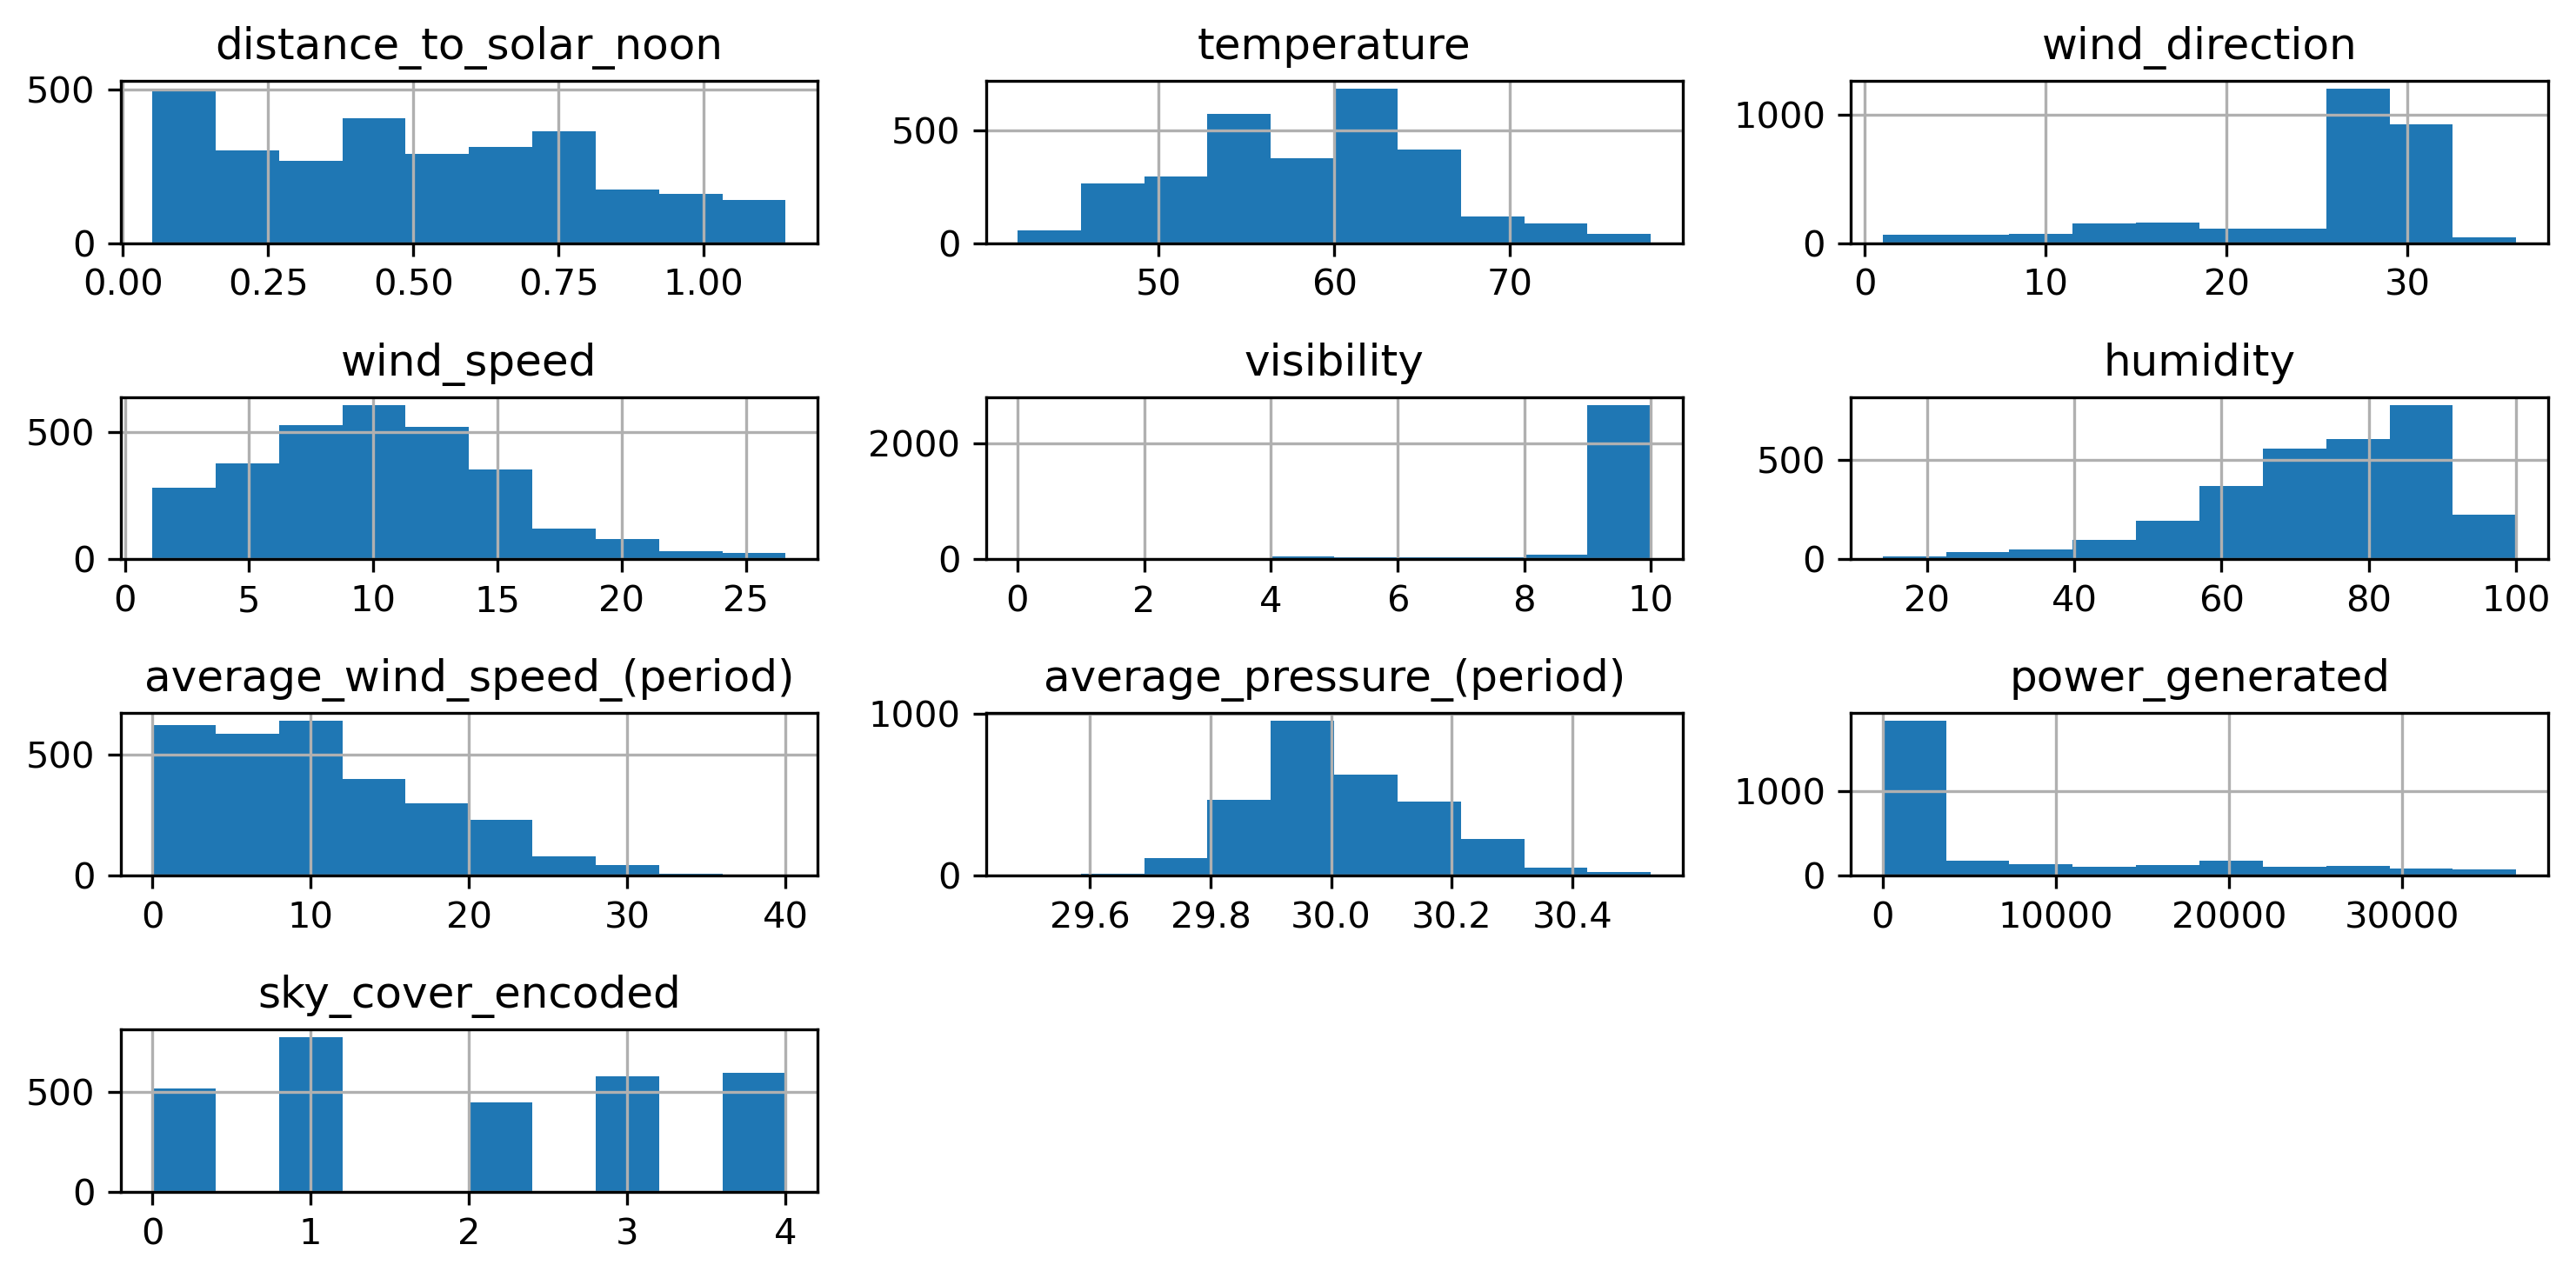

In [27]:
df.hist()
plt.tight_layout()

In [28]:
#ONCE DETECT THE OUTLIER REPLACE IT USING CAPPING METHOD
#REPLACING OUTLIER VALUE TO UPPER EXTREME VALUE AND LOWER EXTREME VALUE 

In [29]:
#CREATING OWN FUNCTION
def outlier_detect(data, columns):
    for col in columns:
        # Calculate Q1, Q3, and IQR
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)
        
        # Replace outliers with the lower or upper bound
        data[col] = np.where(data[col] > upper, upper, 
                             np.where(data[col] < lower, lower, data[col]))

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Call the function
outlier_detect(df, numeric_columns)

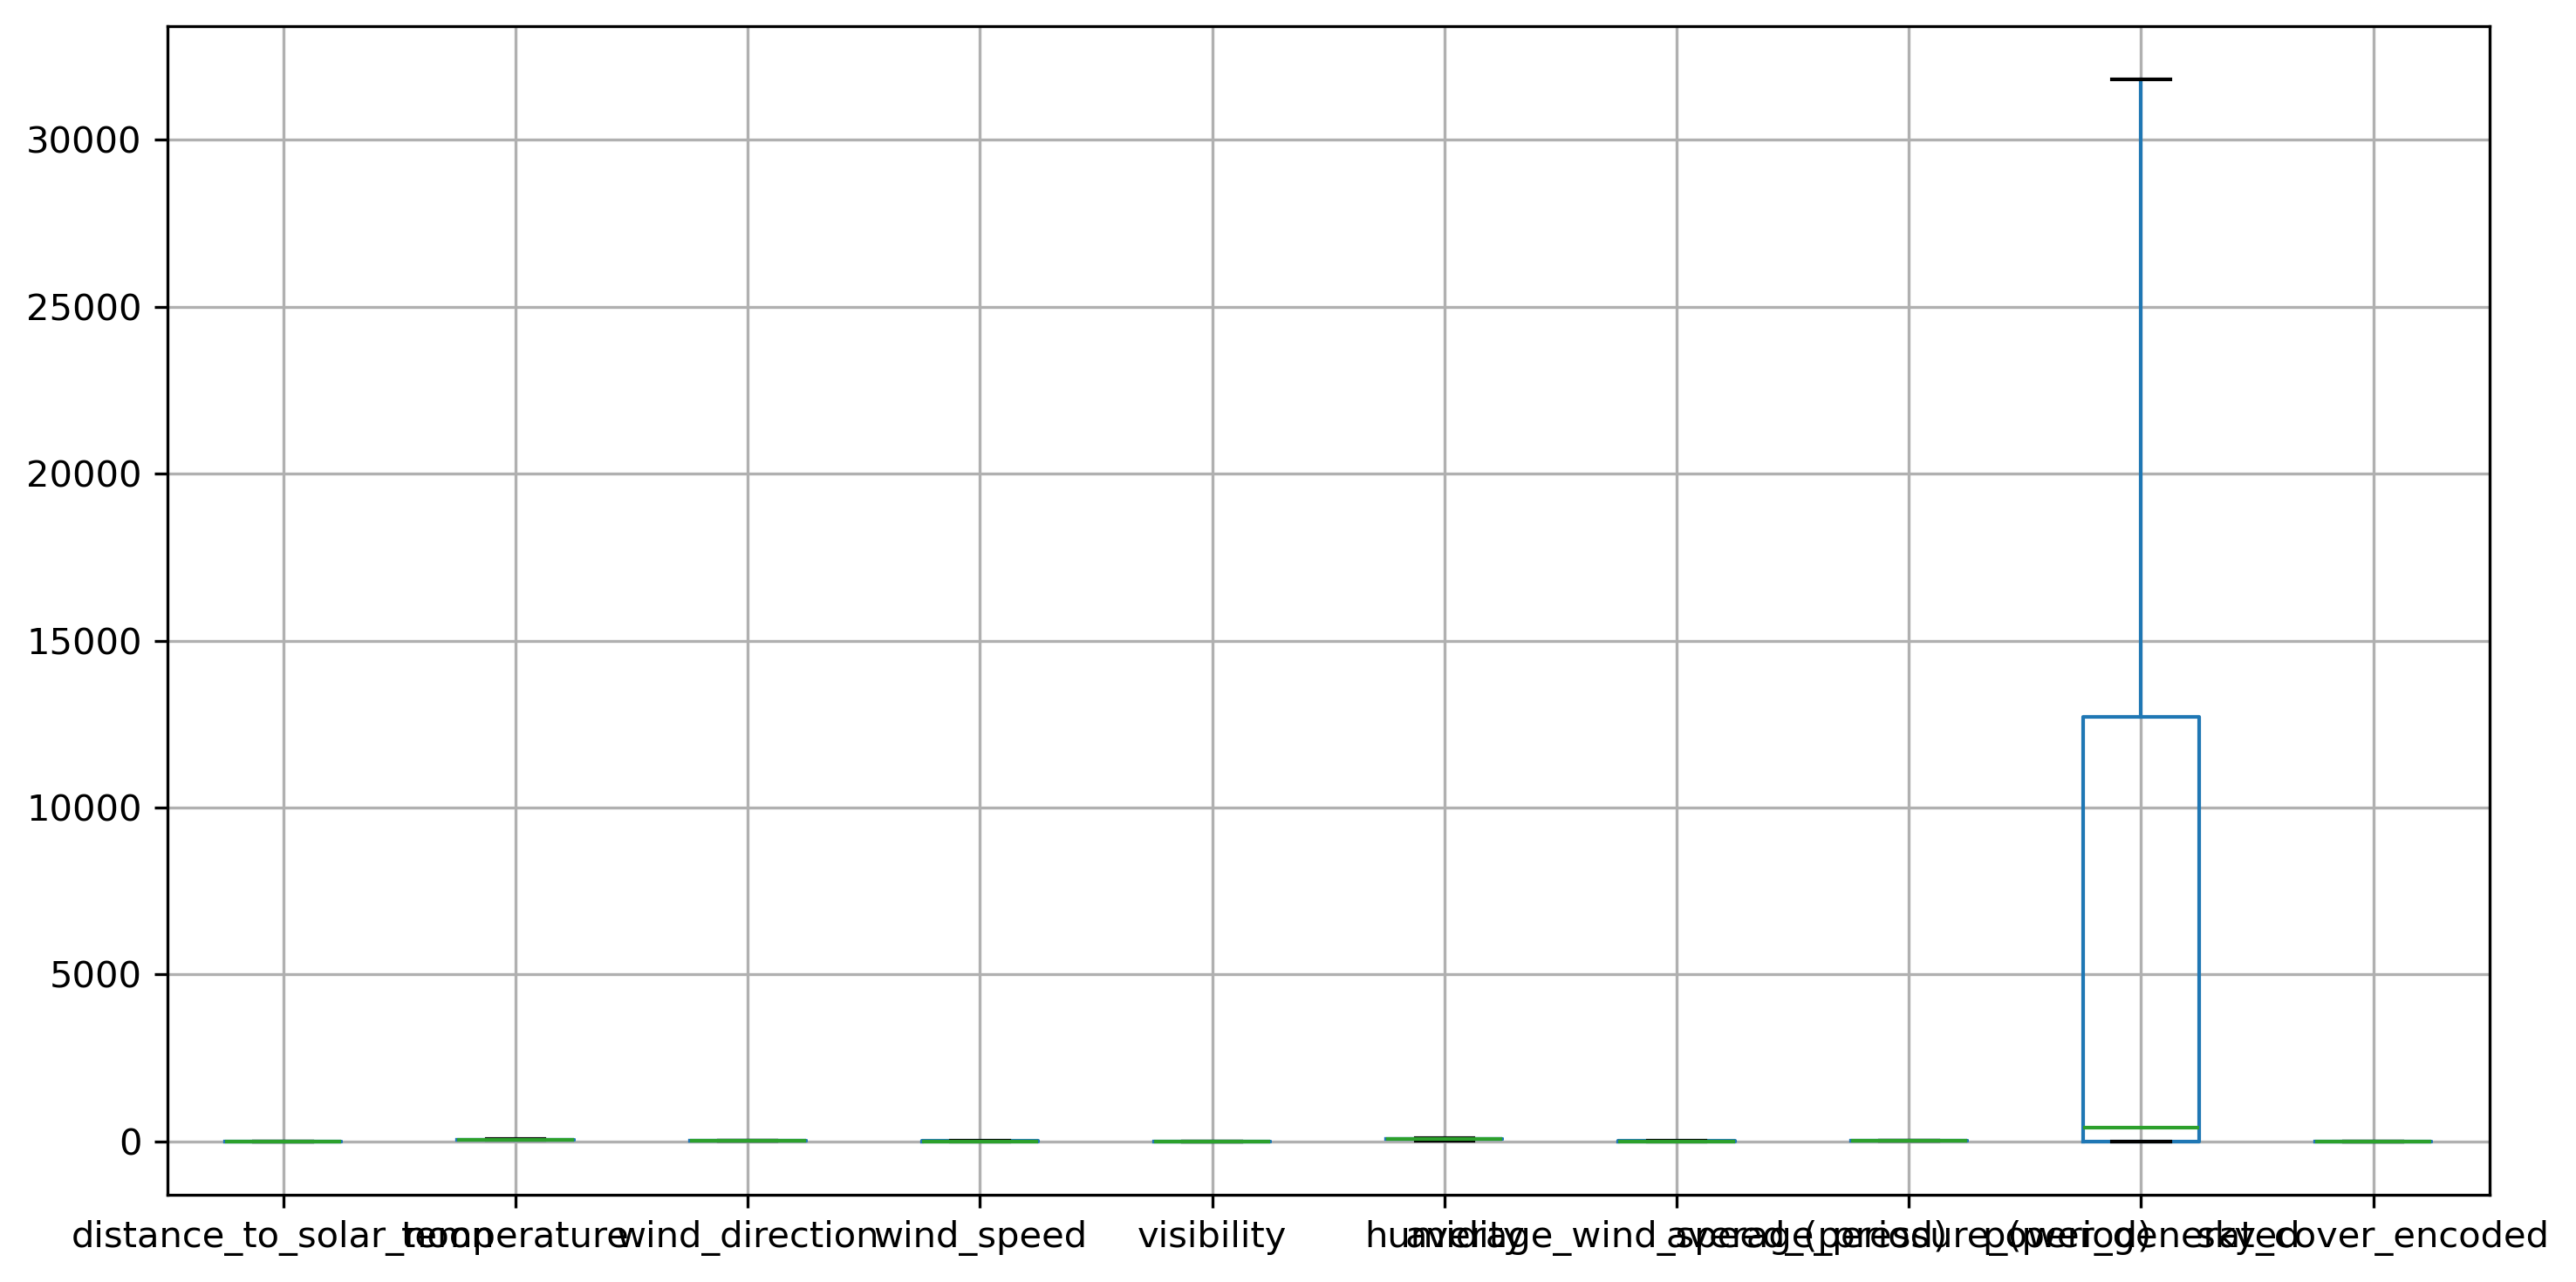

In [30]:
df.boxplot()
plt.tight_layout()

# LOOKING FOR RELATIONSHIPS BETWEEN FEATURES

<Axes: >

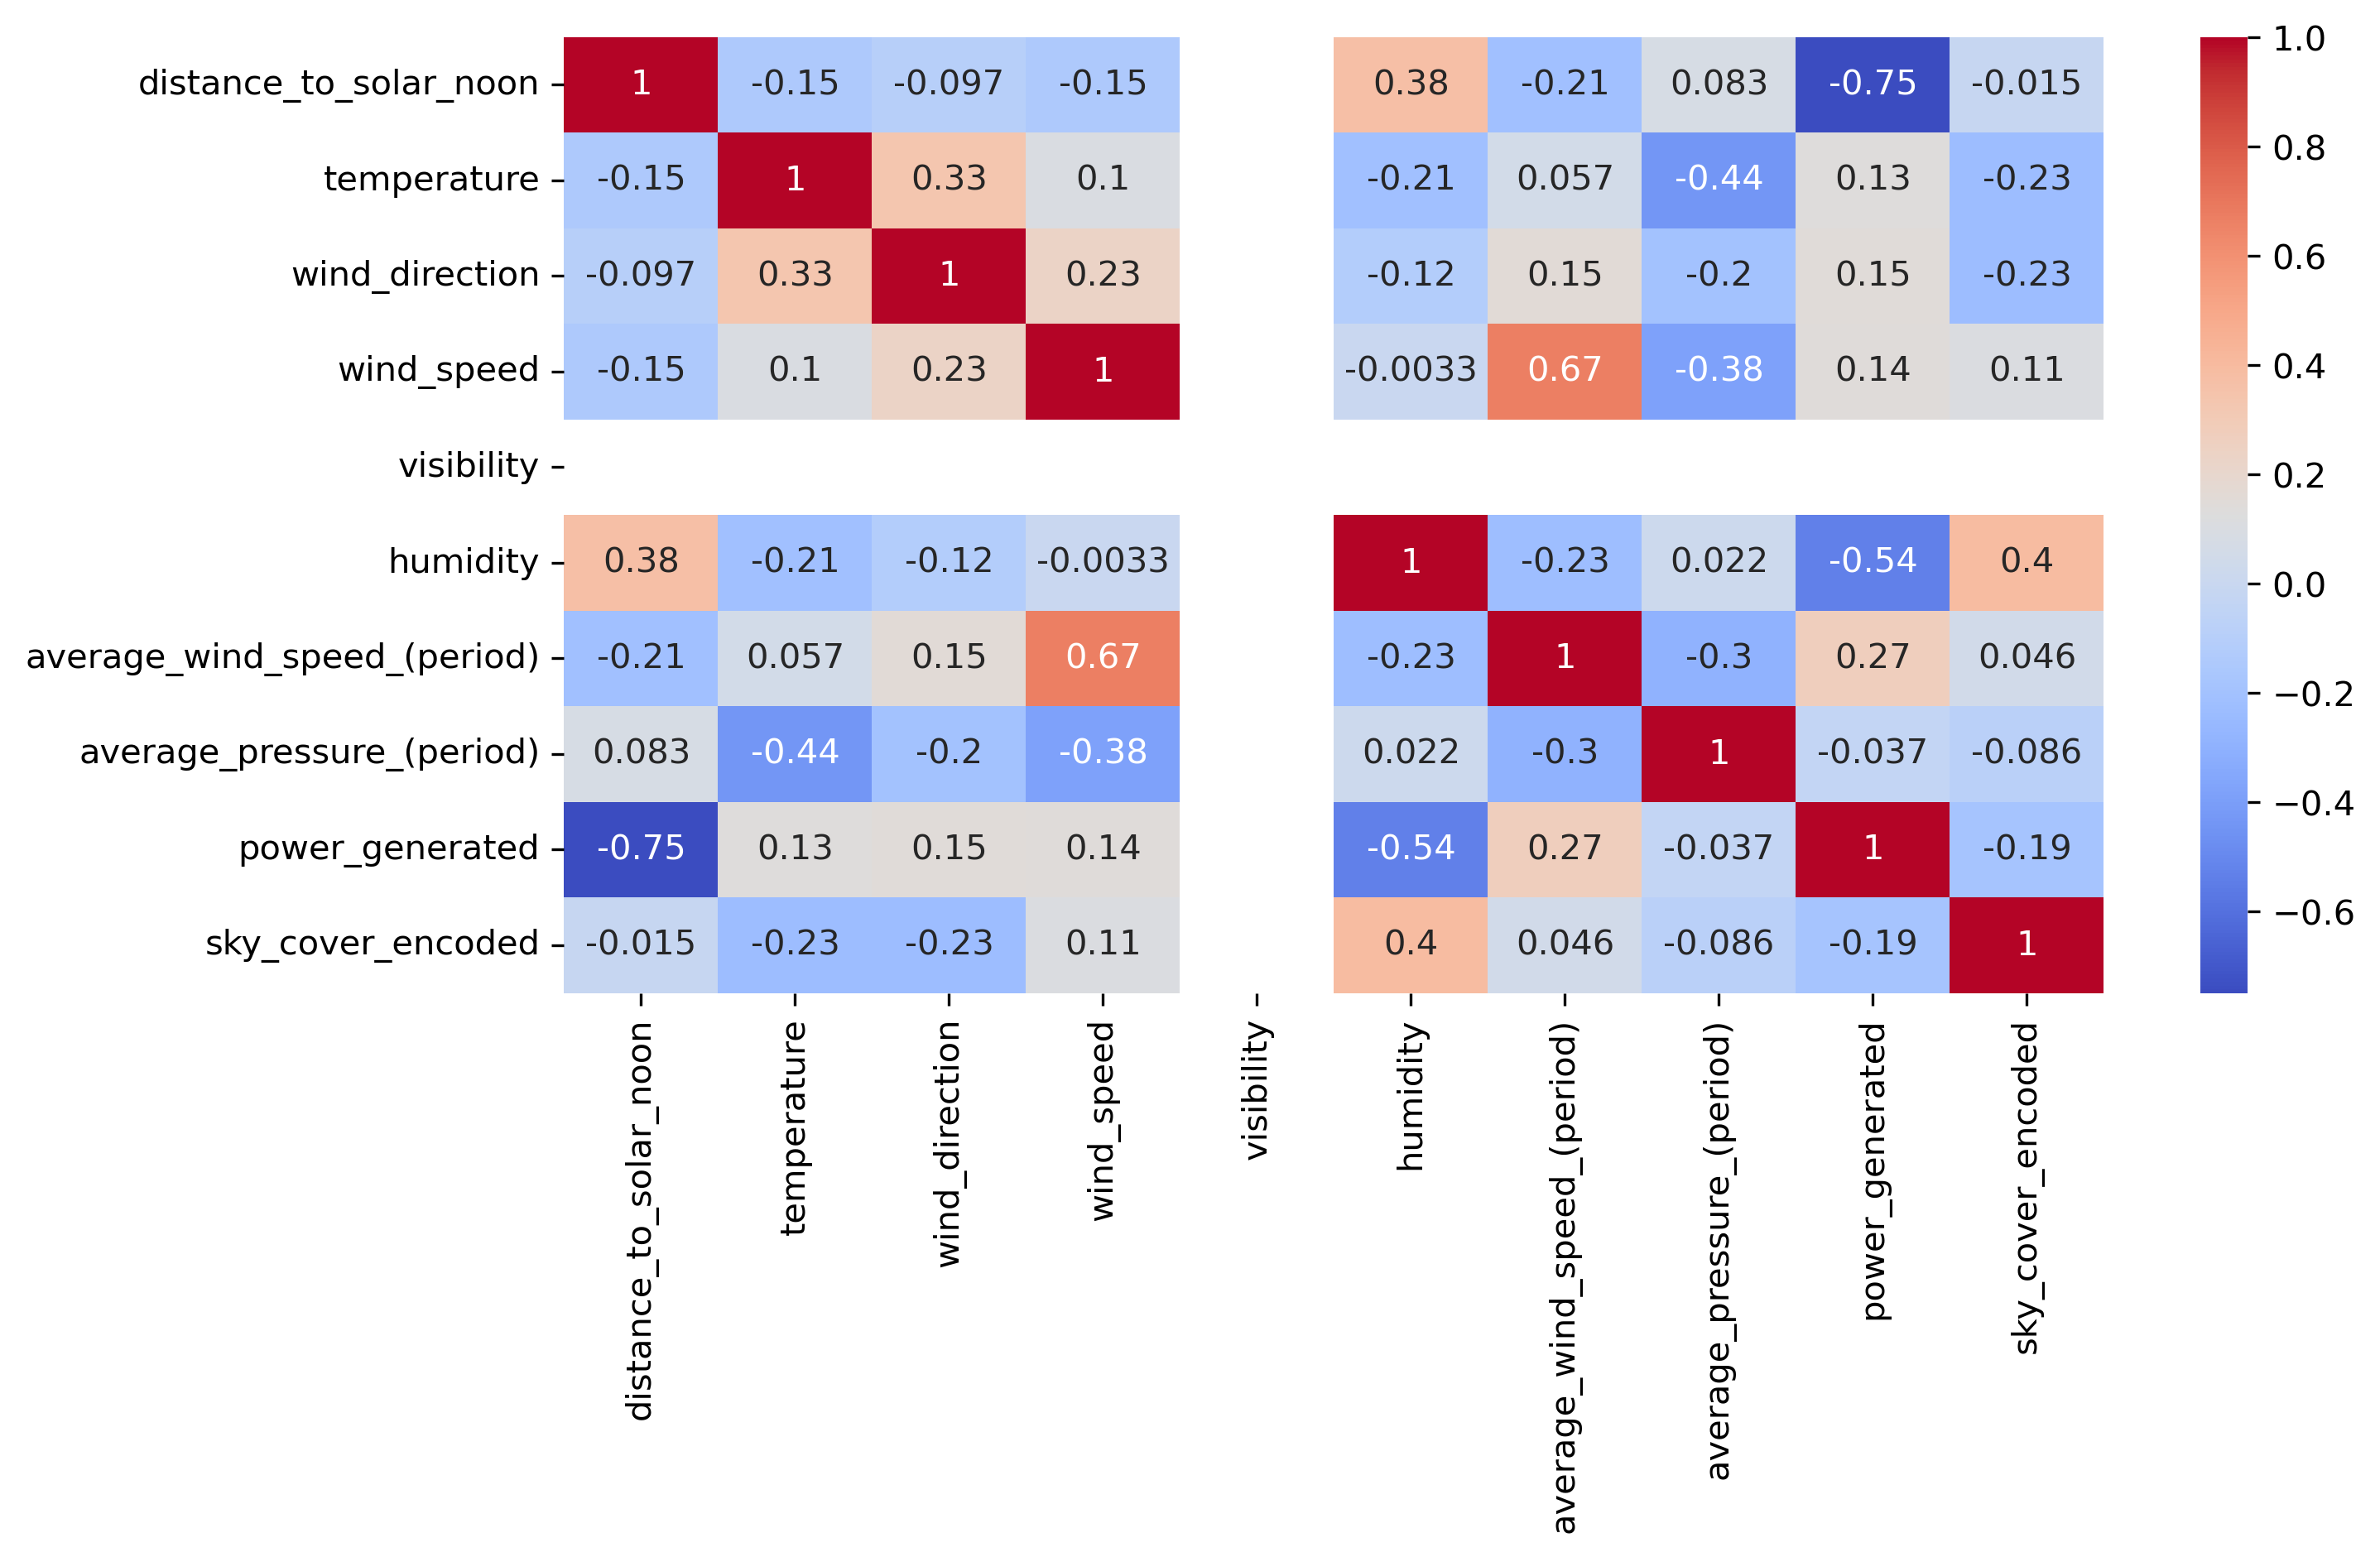

In [31]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
X=df.drop(columns=['power_generated'])

In [34]:
#creating a new table 
vif=pd.DataFrame()

In [35]:
vif['Features']=X.columns

In [36]:
range(len(df.columns))

range(0, 10)

In [37]:
vif["VIF"]=[variance_inflation_factor(X,i) for i in range(0,9)]

In [38]:
vif

Features           VIF
0       distance_to_solar_noon      1.250498
1                  temperature      1.495880
2               wind_direction      1.232702
3                   wind_speed      2.108551
4                   visibility  73419.728680
5                     humidity      1.573450
6  average_wind_speed_(period)      2.055245
7    average_pressure_(period)      1.509256
8            sky_cover_encoded      1.387782

In [39]:
#DROPPING COLUMN
df.drop(['visibility'],axis=1,inplace=True)

In [40]:

#drop the visibility column. It has low correlation with power-generated and might be redundant with other features.
#visibility is likely redundant with humidity and wind-speed. These features might capture similar information about atmospheric conditions that could affect power generation.

# DATA VISUALIZATION

<Axes: >

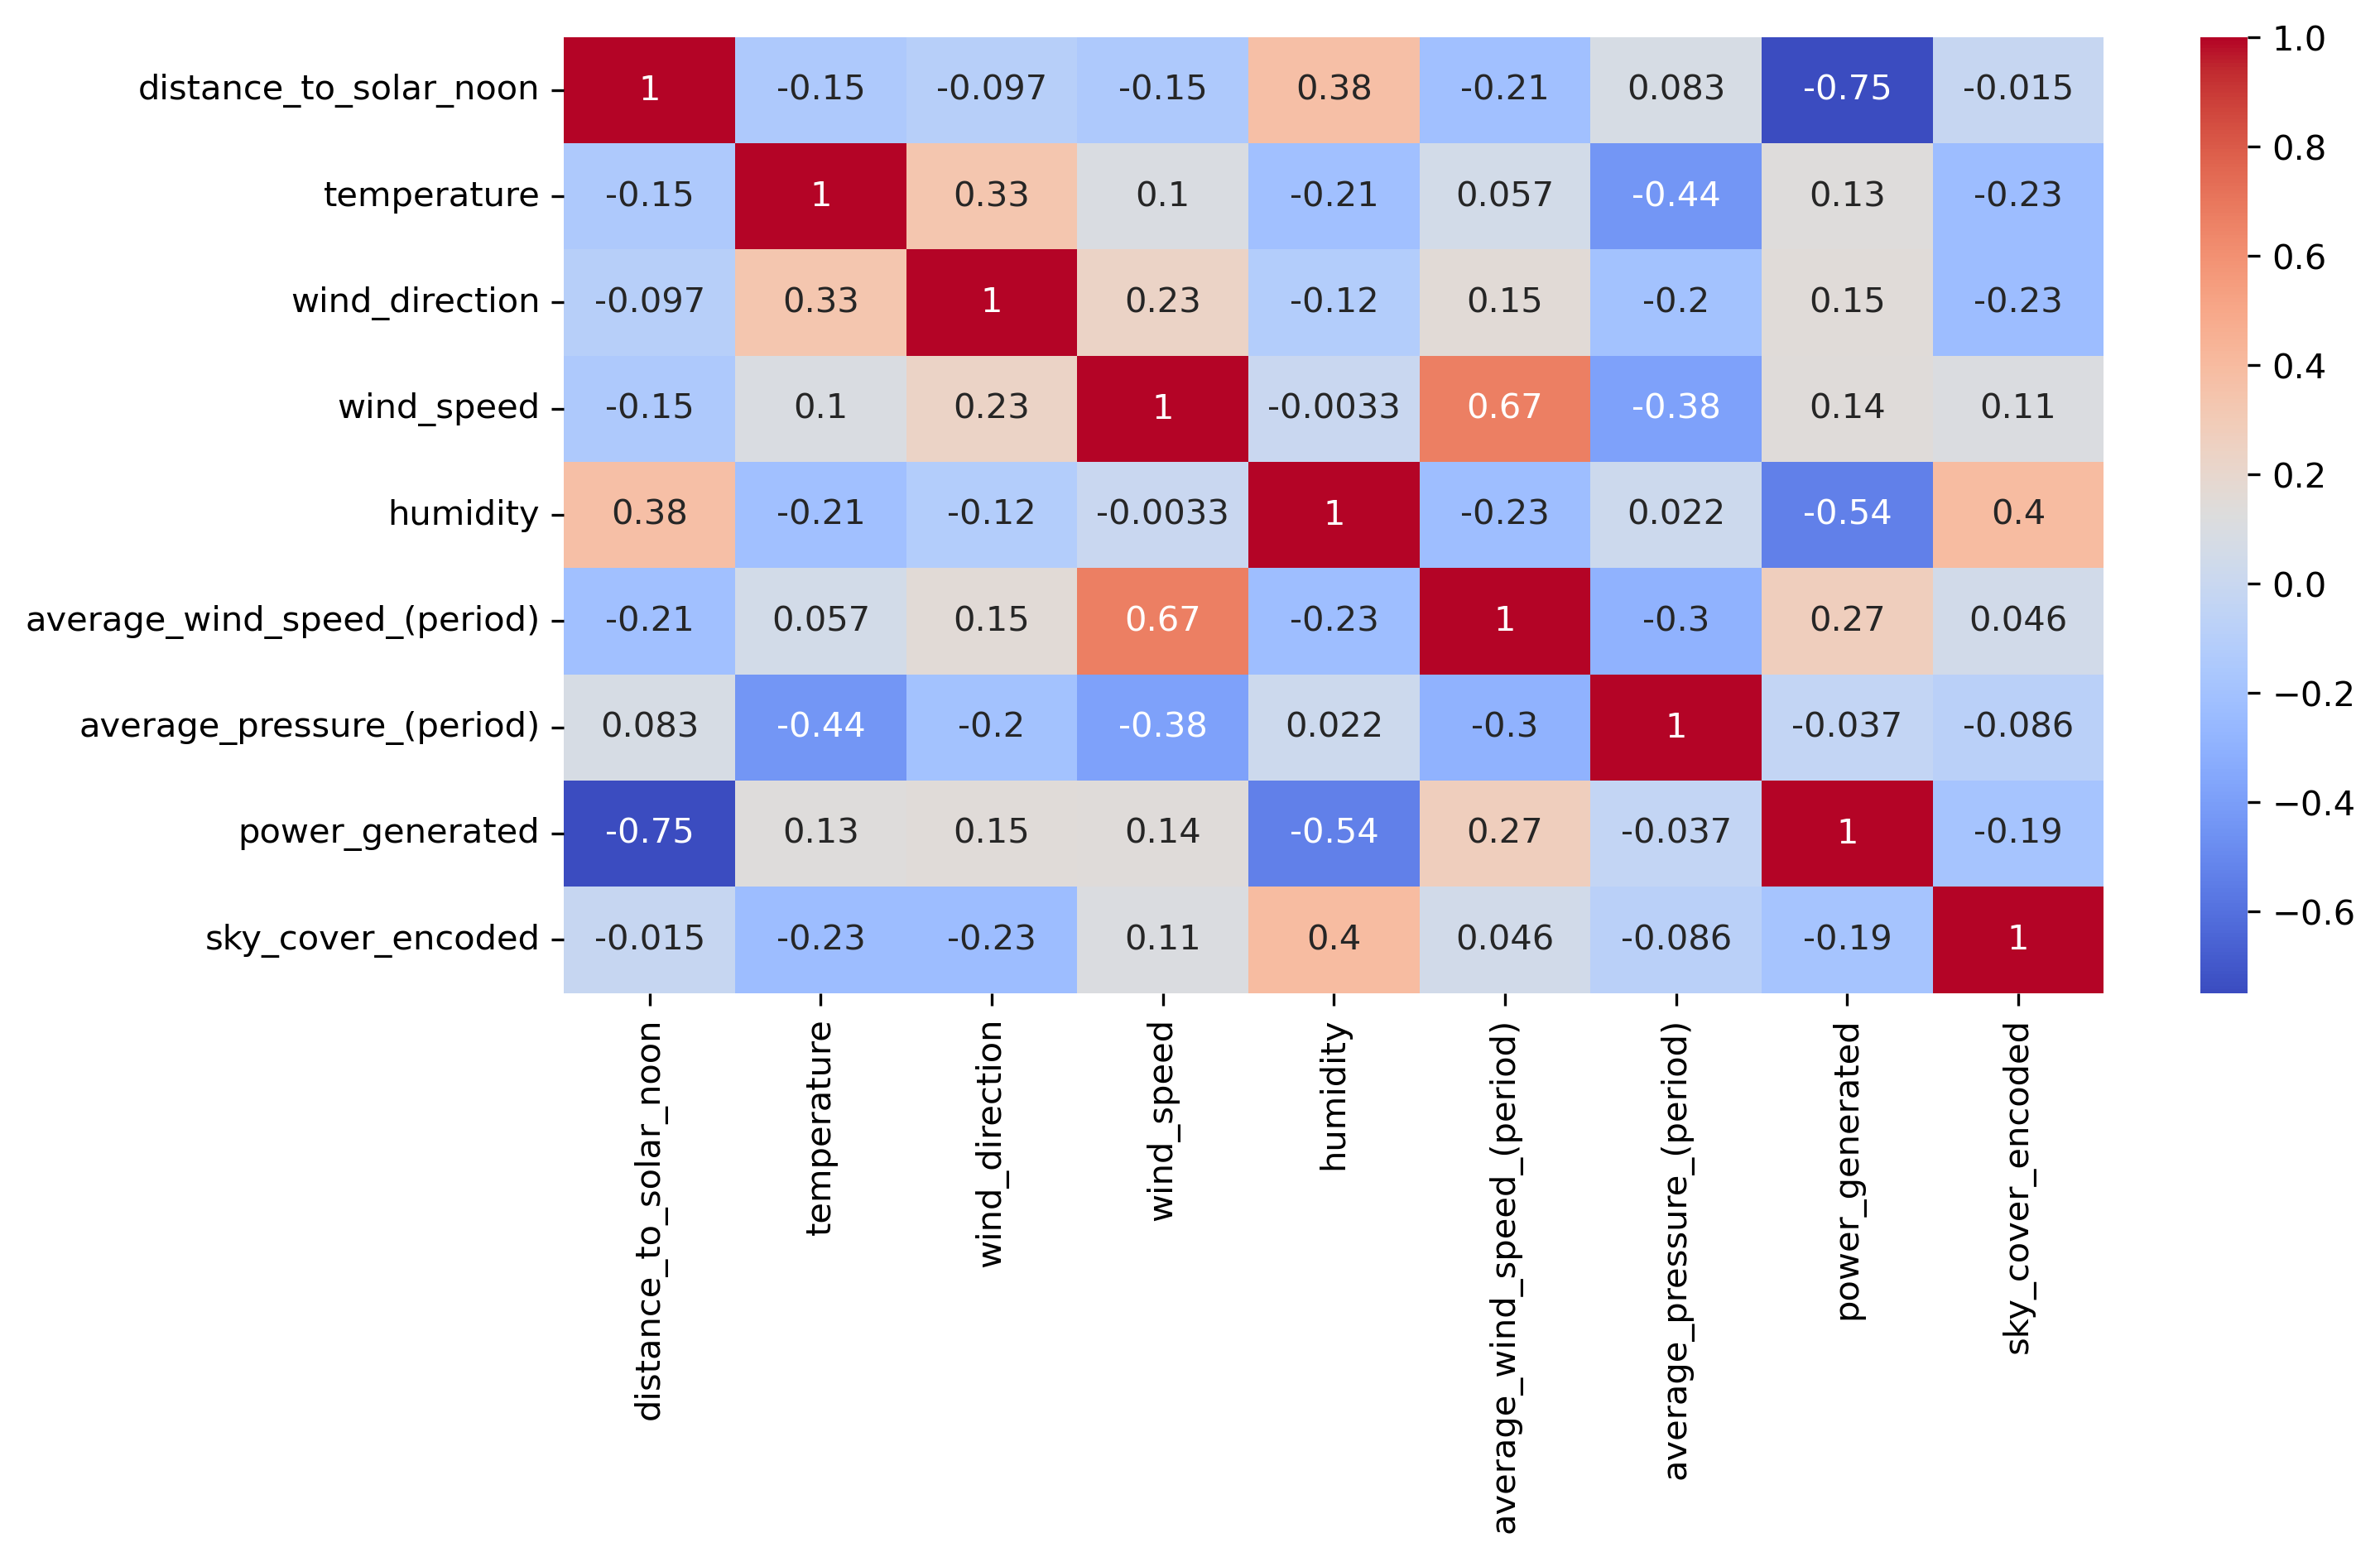

In [41]:
#CORRELATION HEATMAP
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [42]:
#"Distance-to-solar-noon" is negatively correlated with "power-generated" (-0.75).
#"Wind-speed" has a strong positive correlation with "average-wind-speed-period" (0.67).
#"Temperature" has moderate positive correlations with "humidity" (0.38) and "power-generated" (0.33).


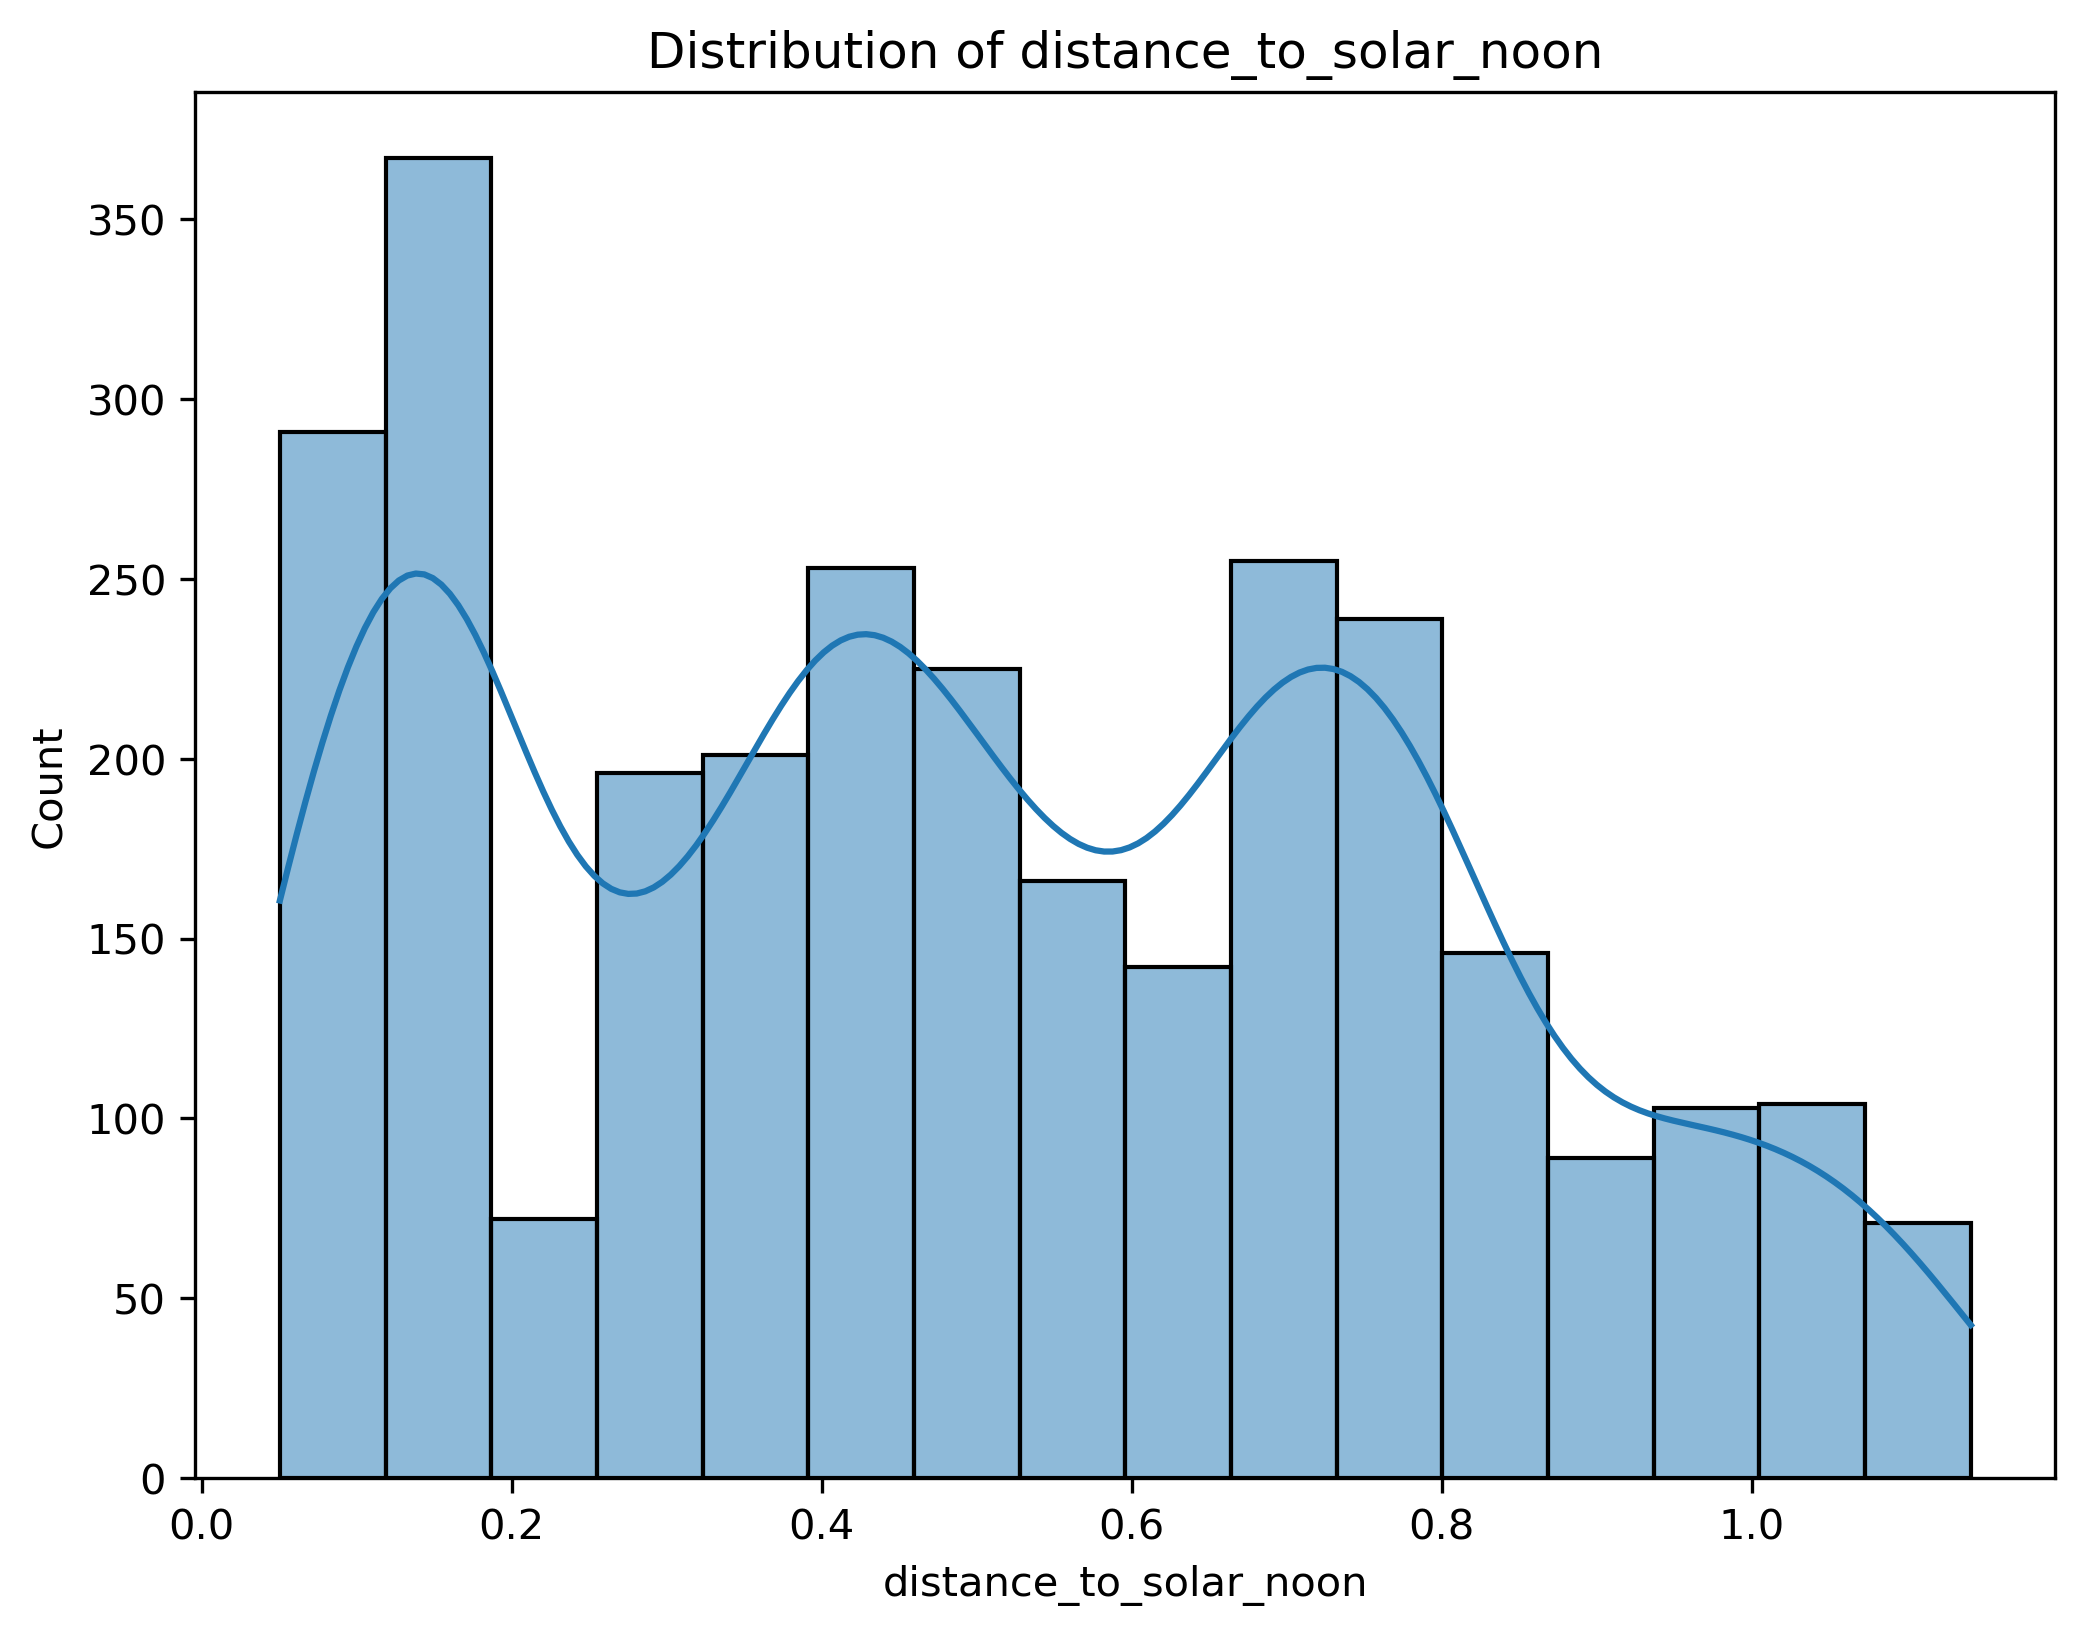

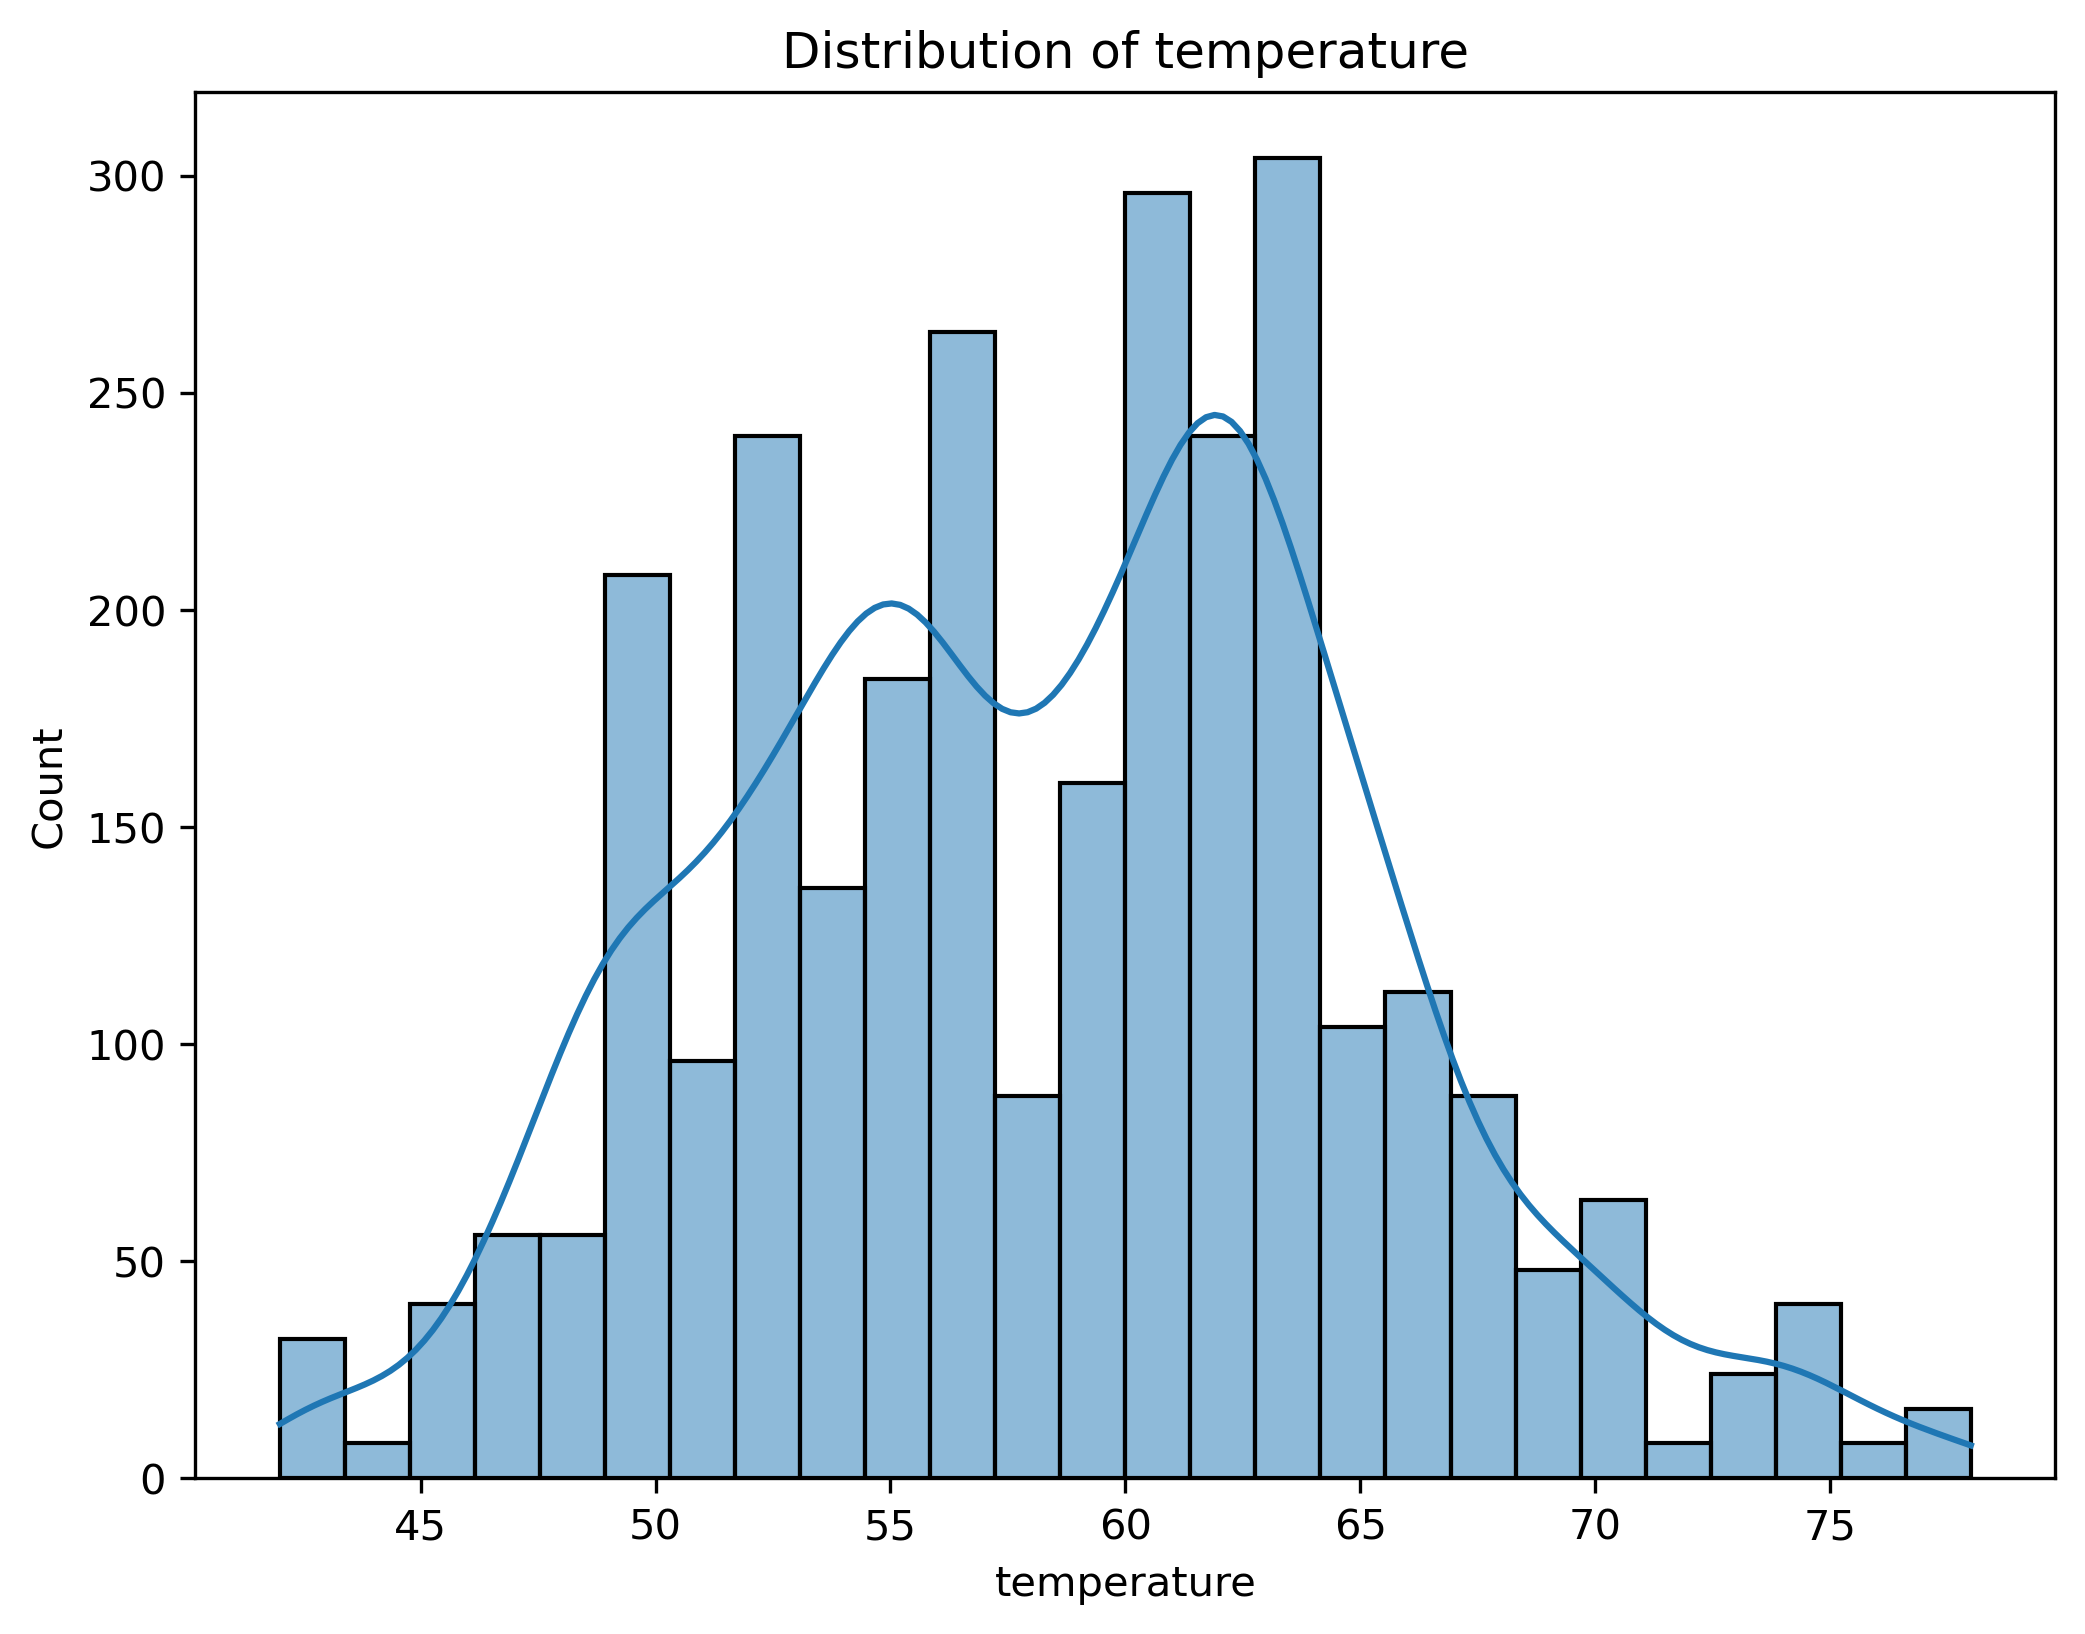

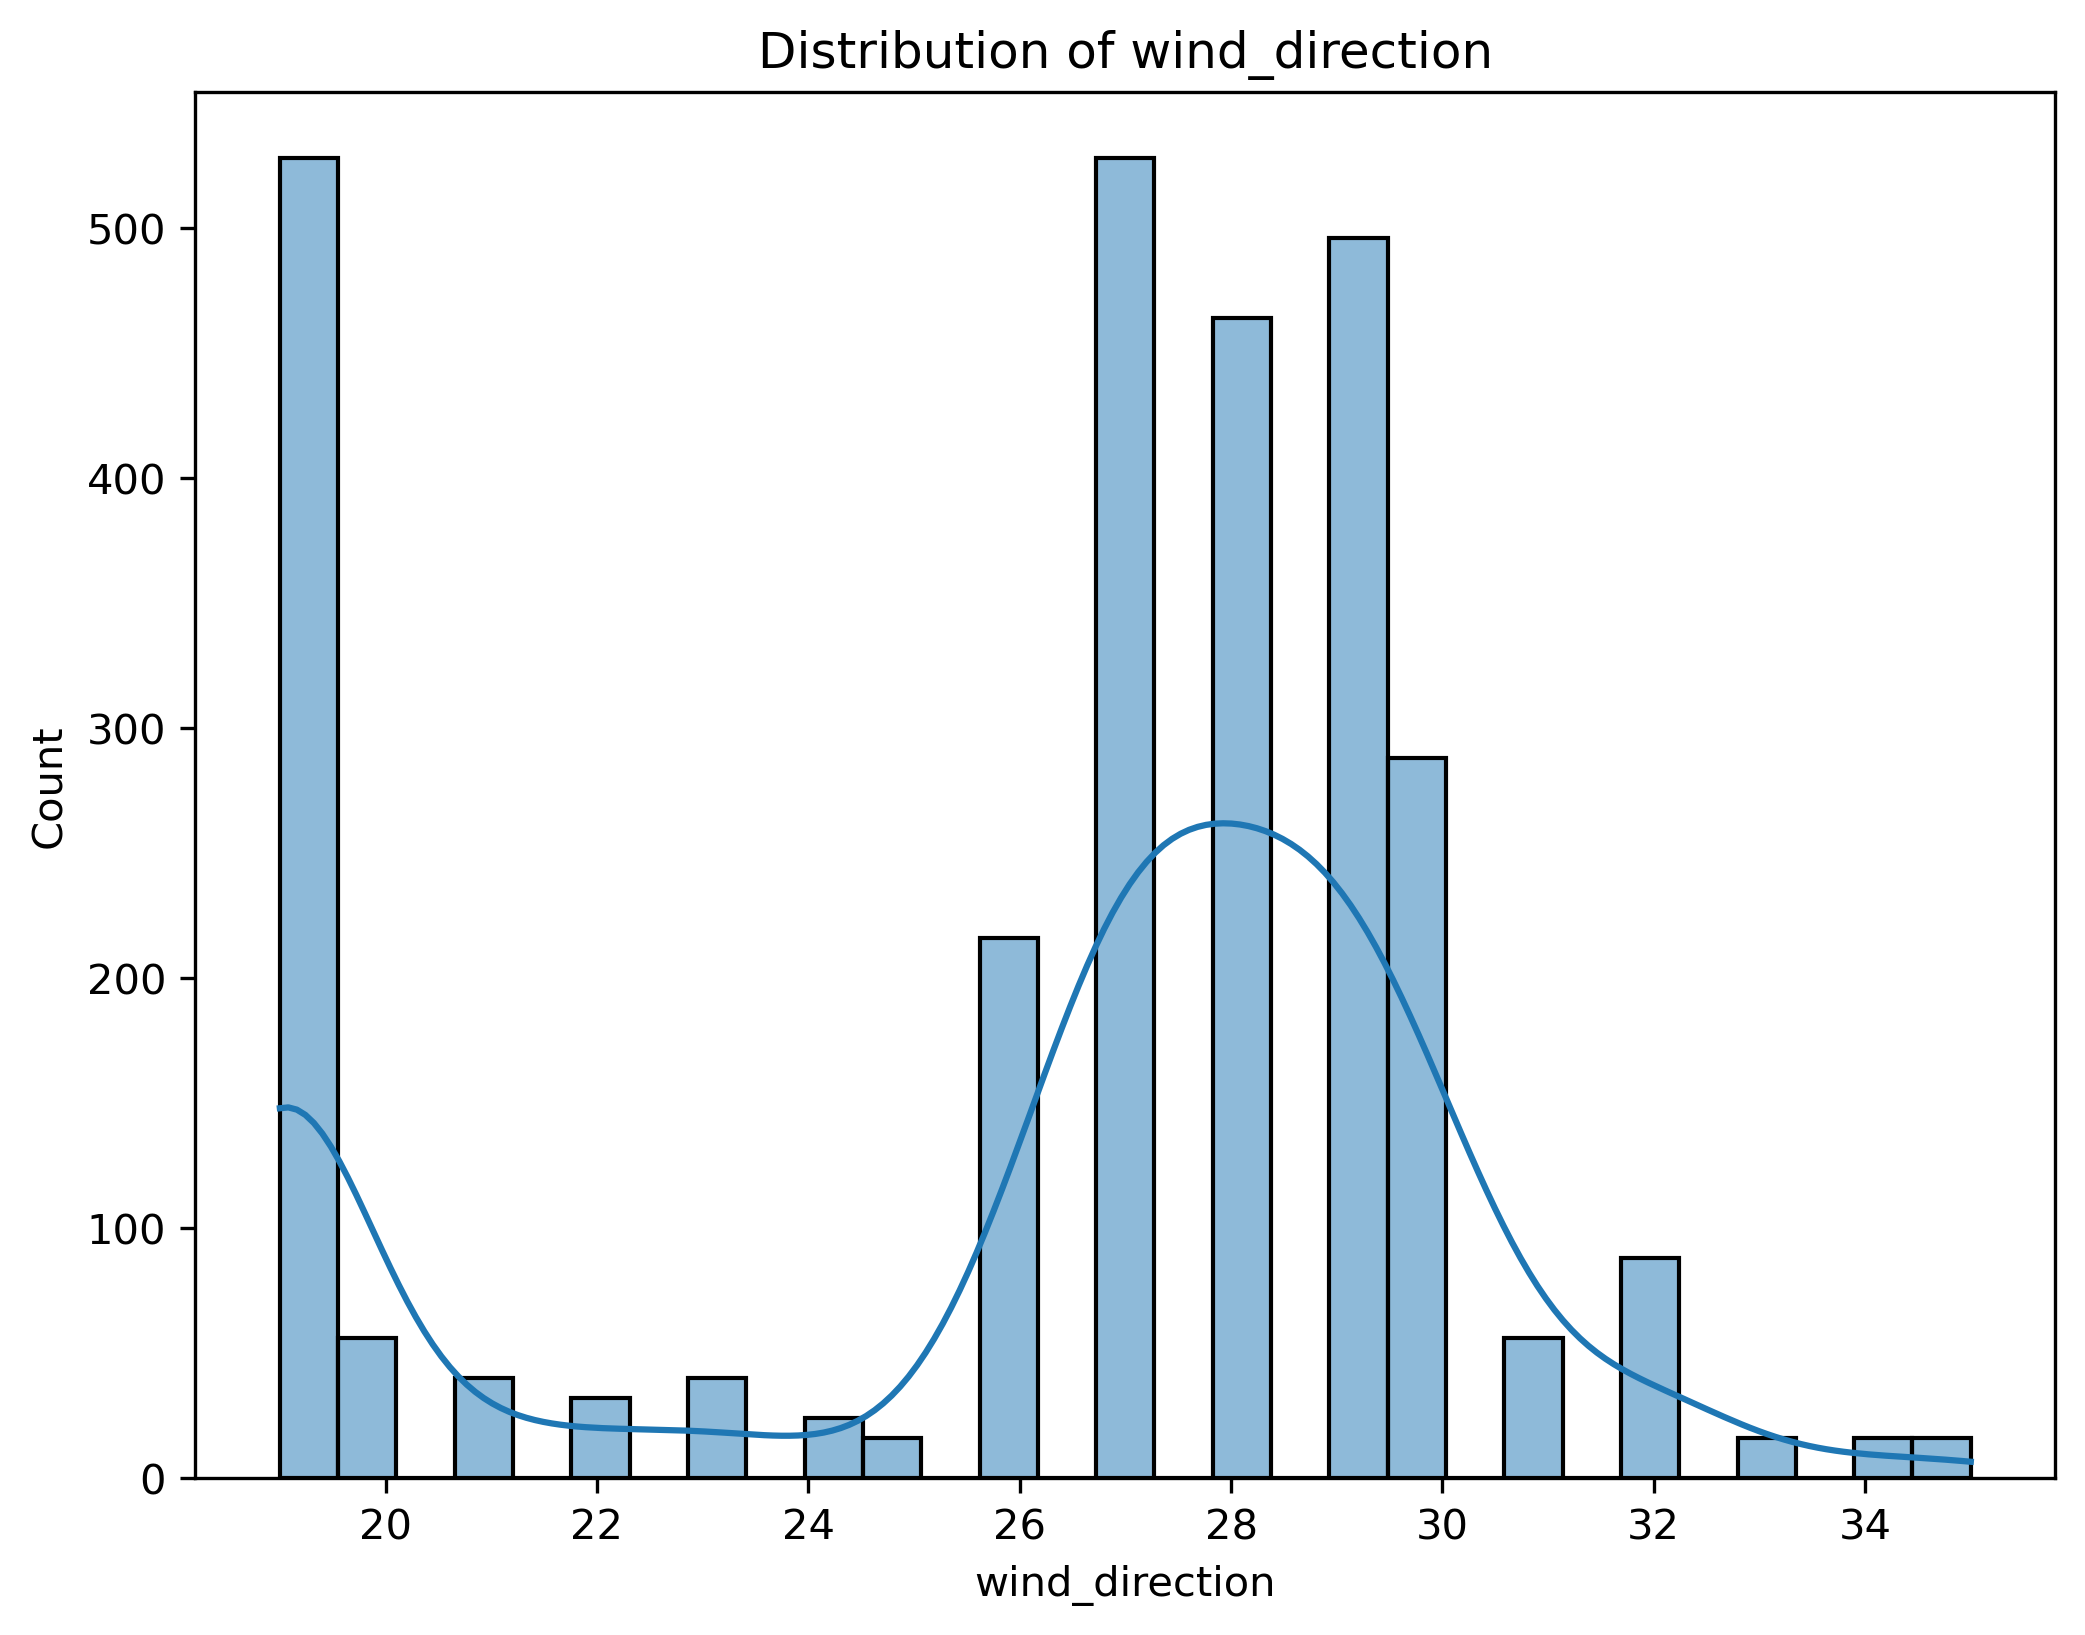

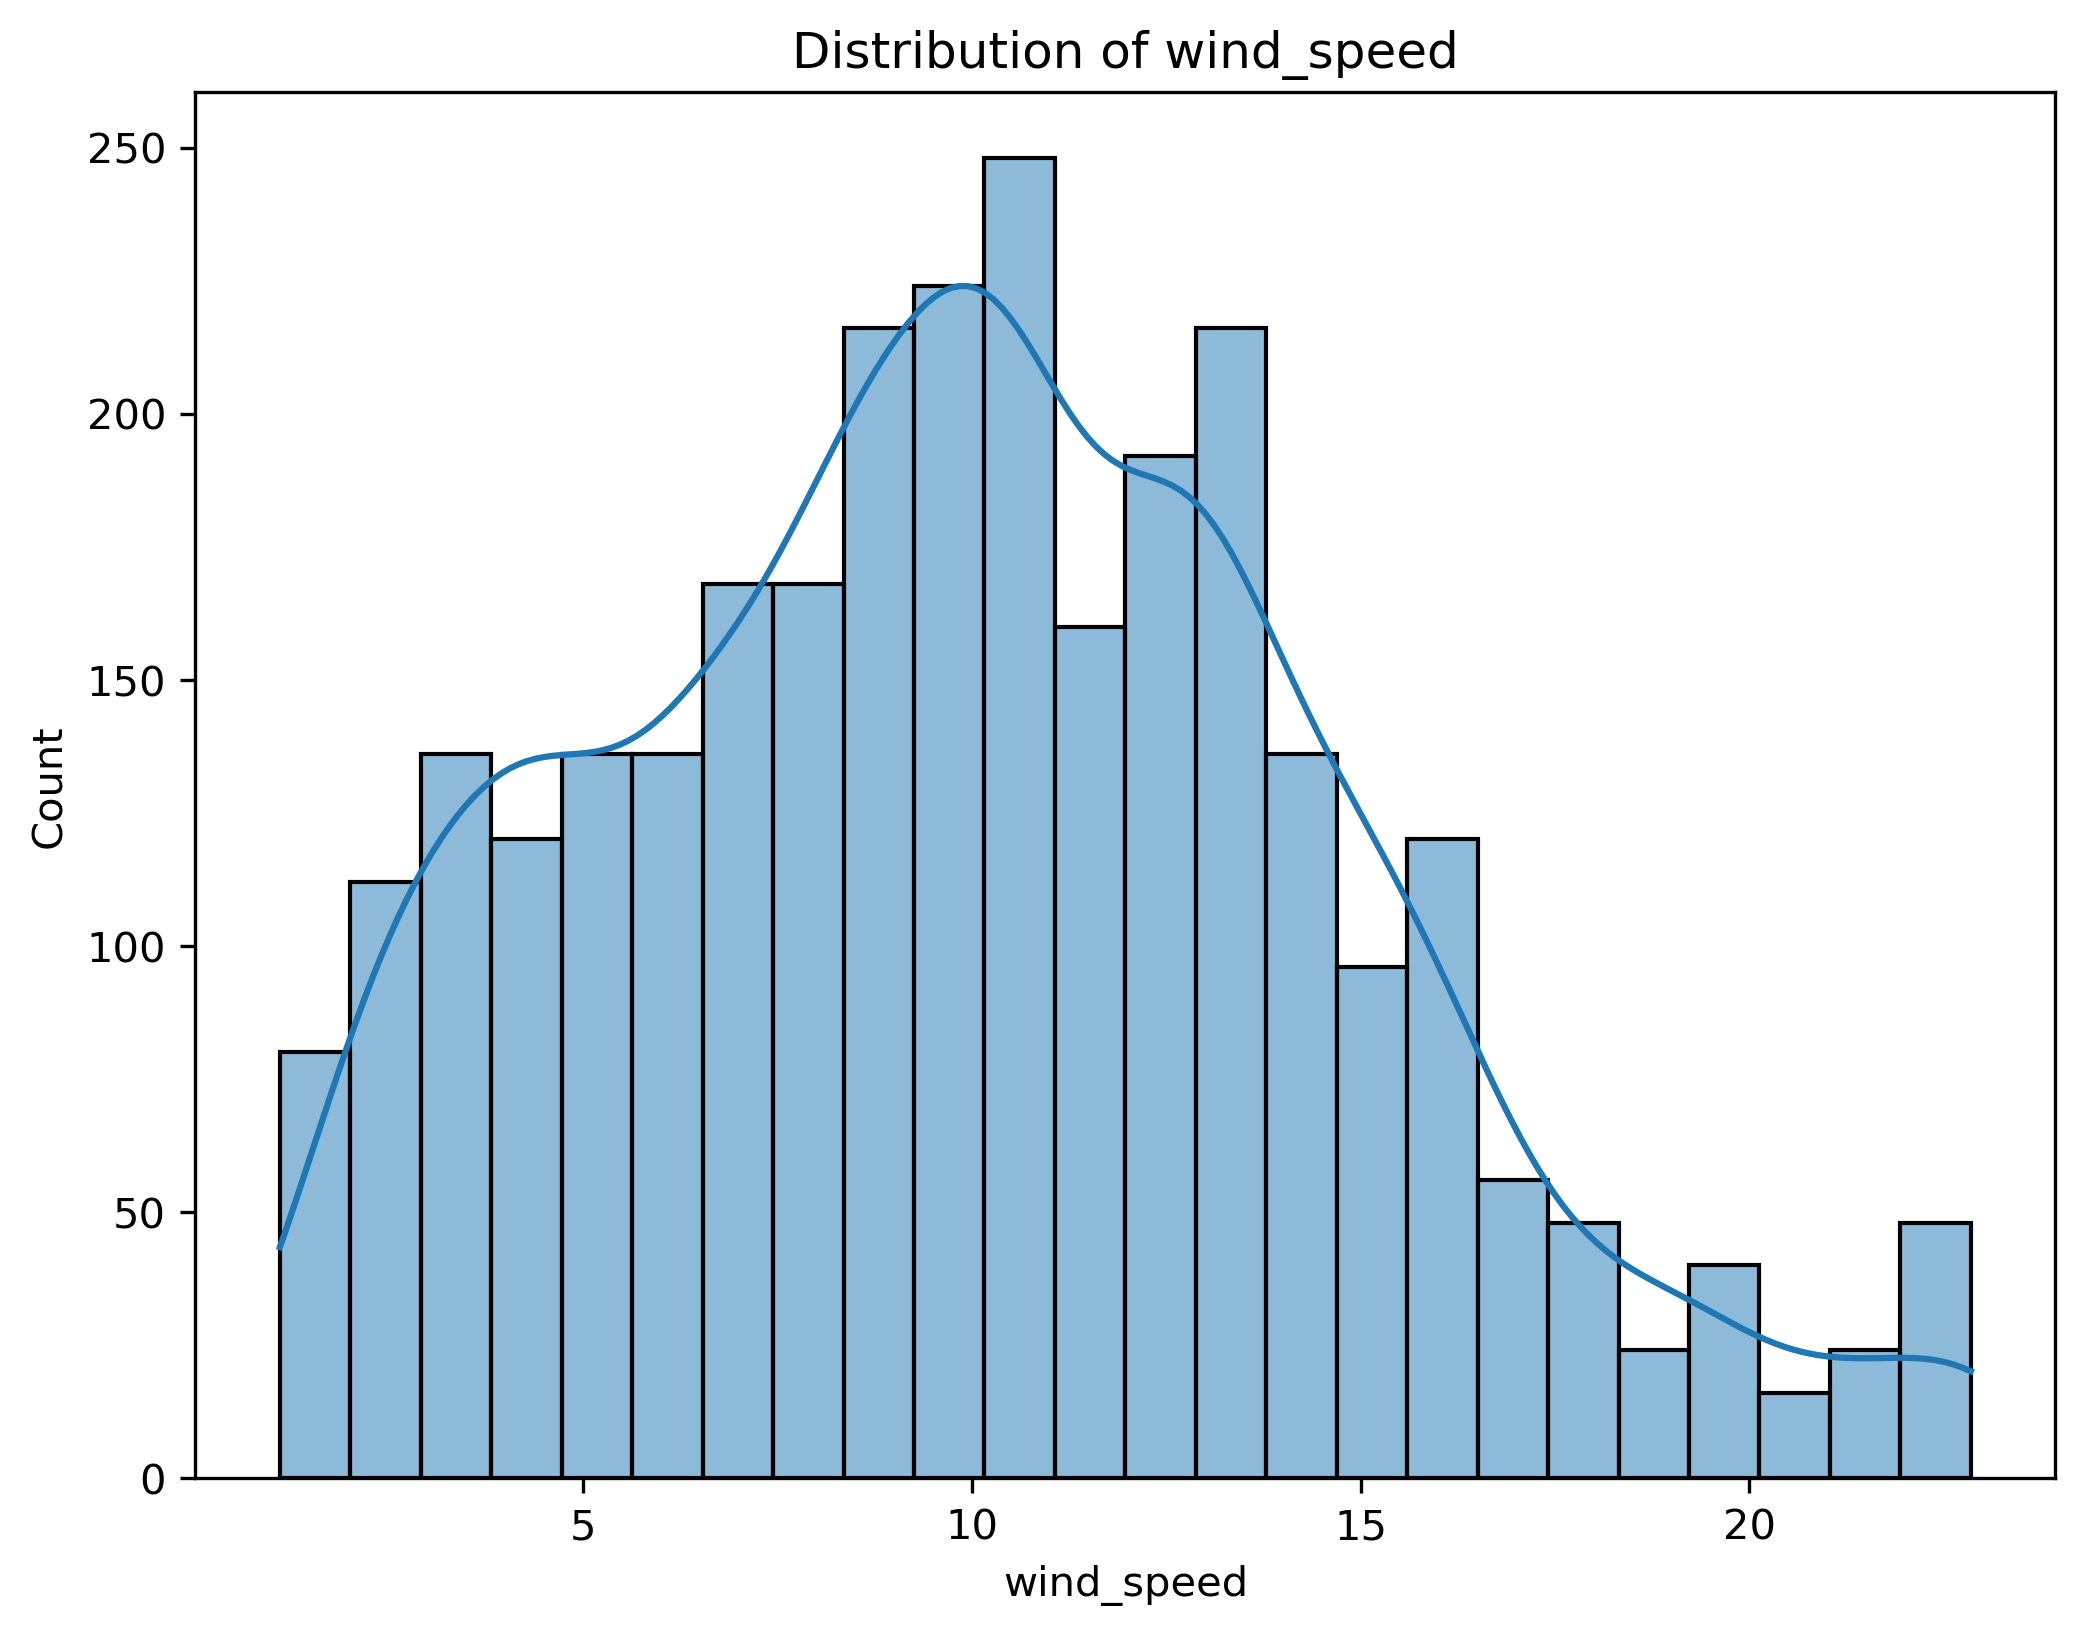

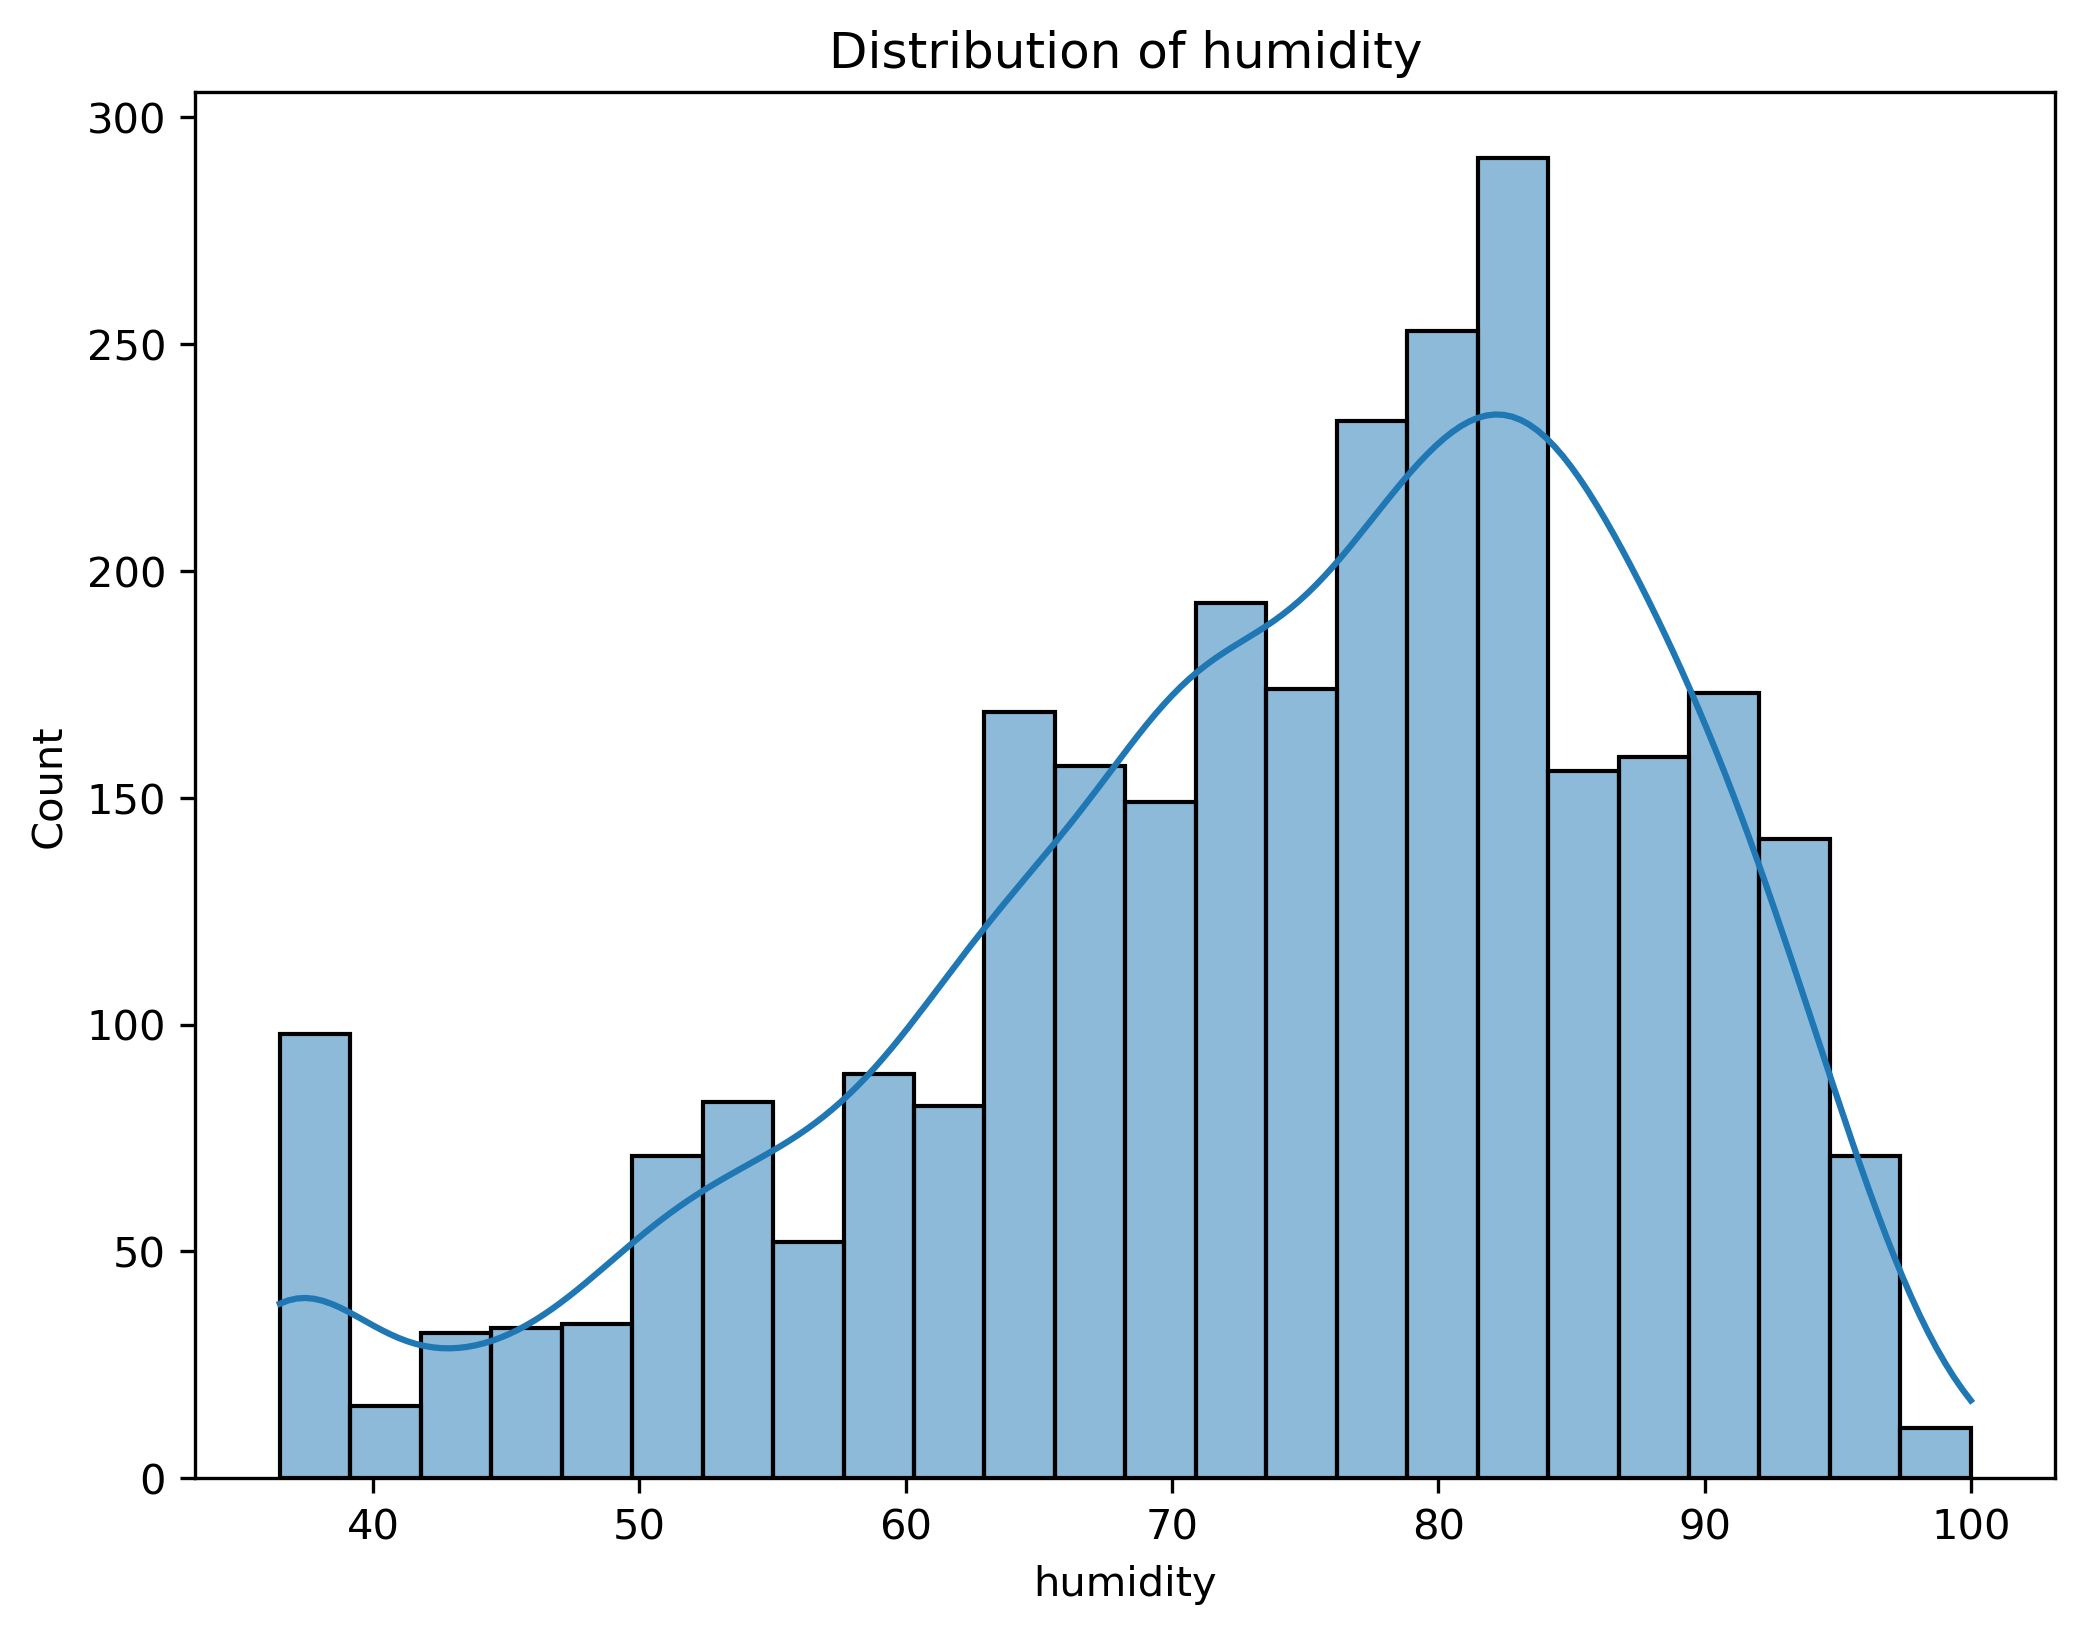

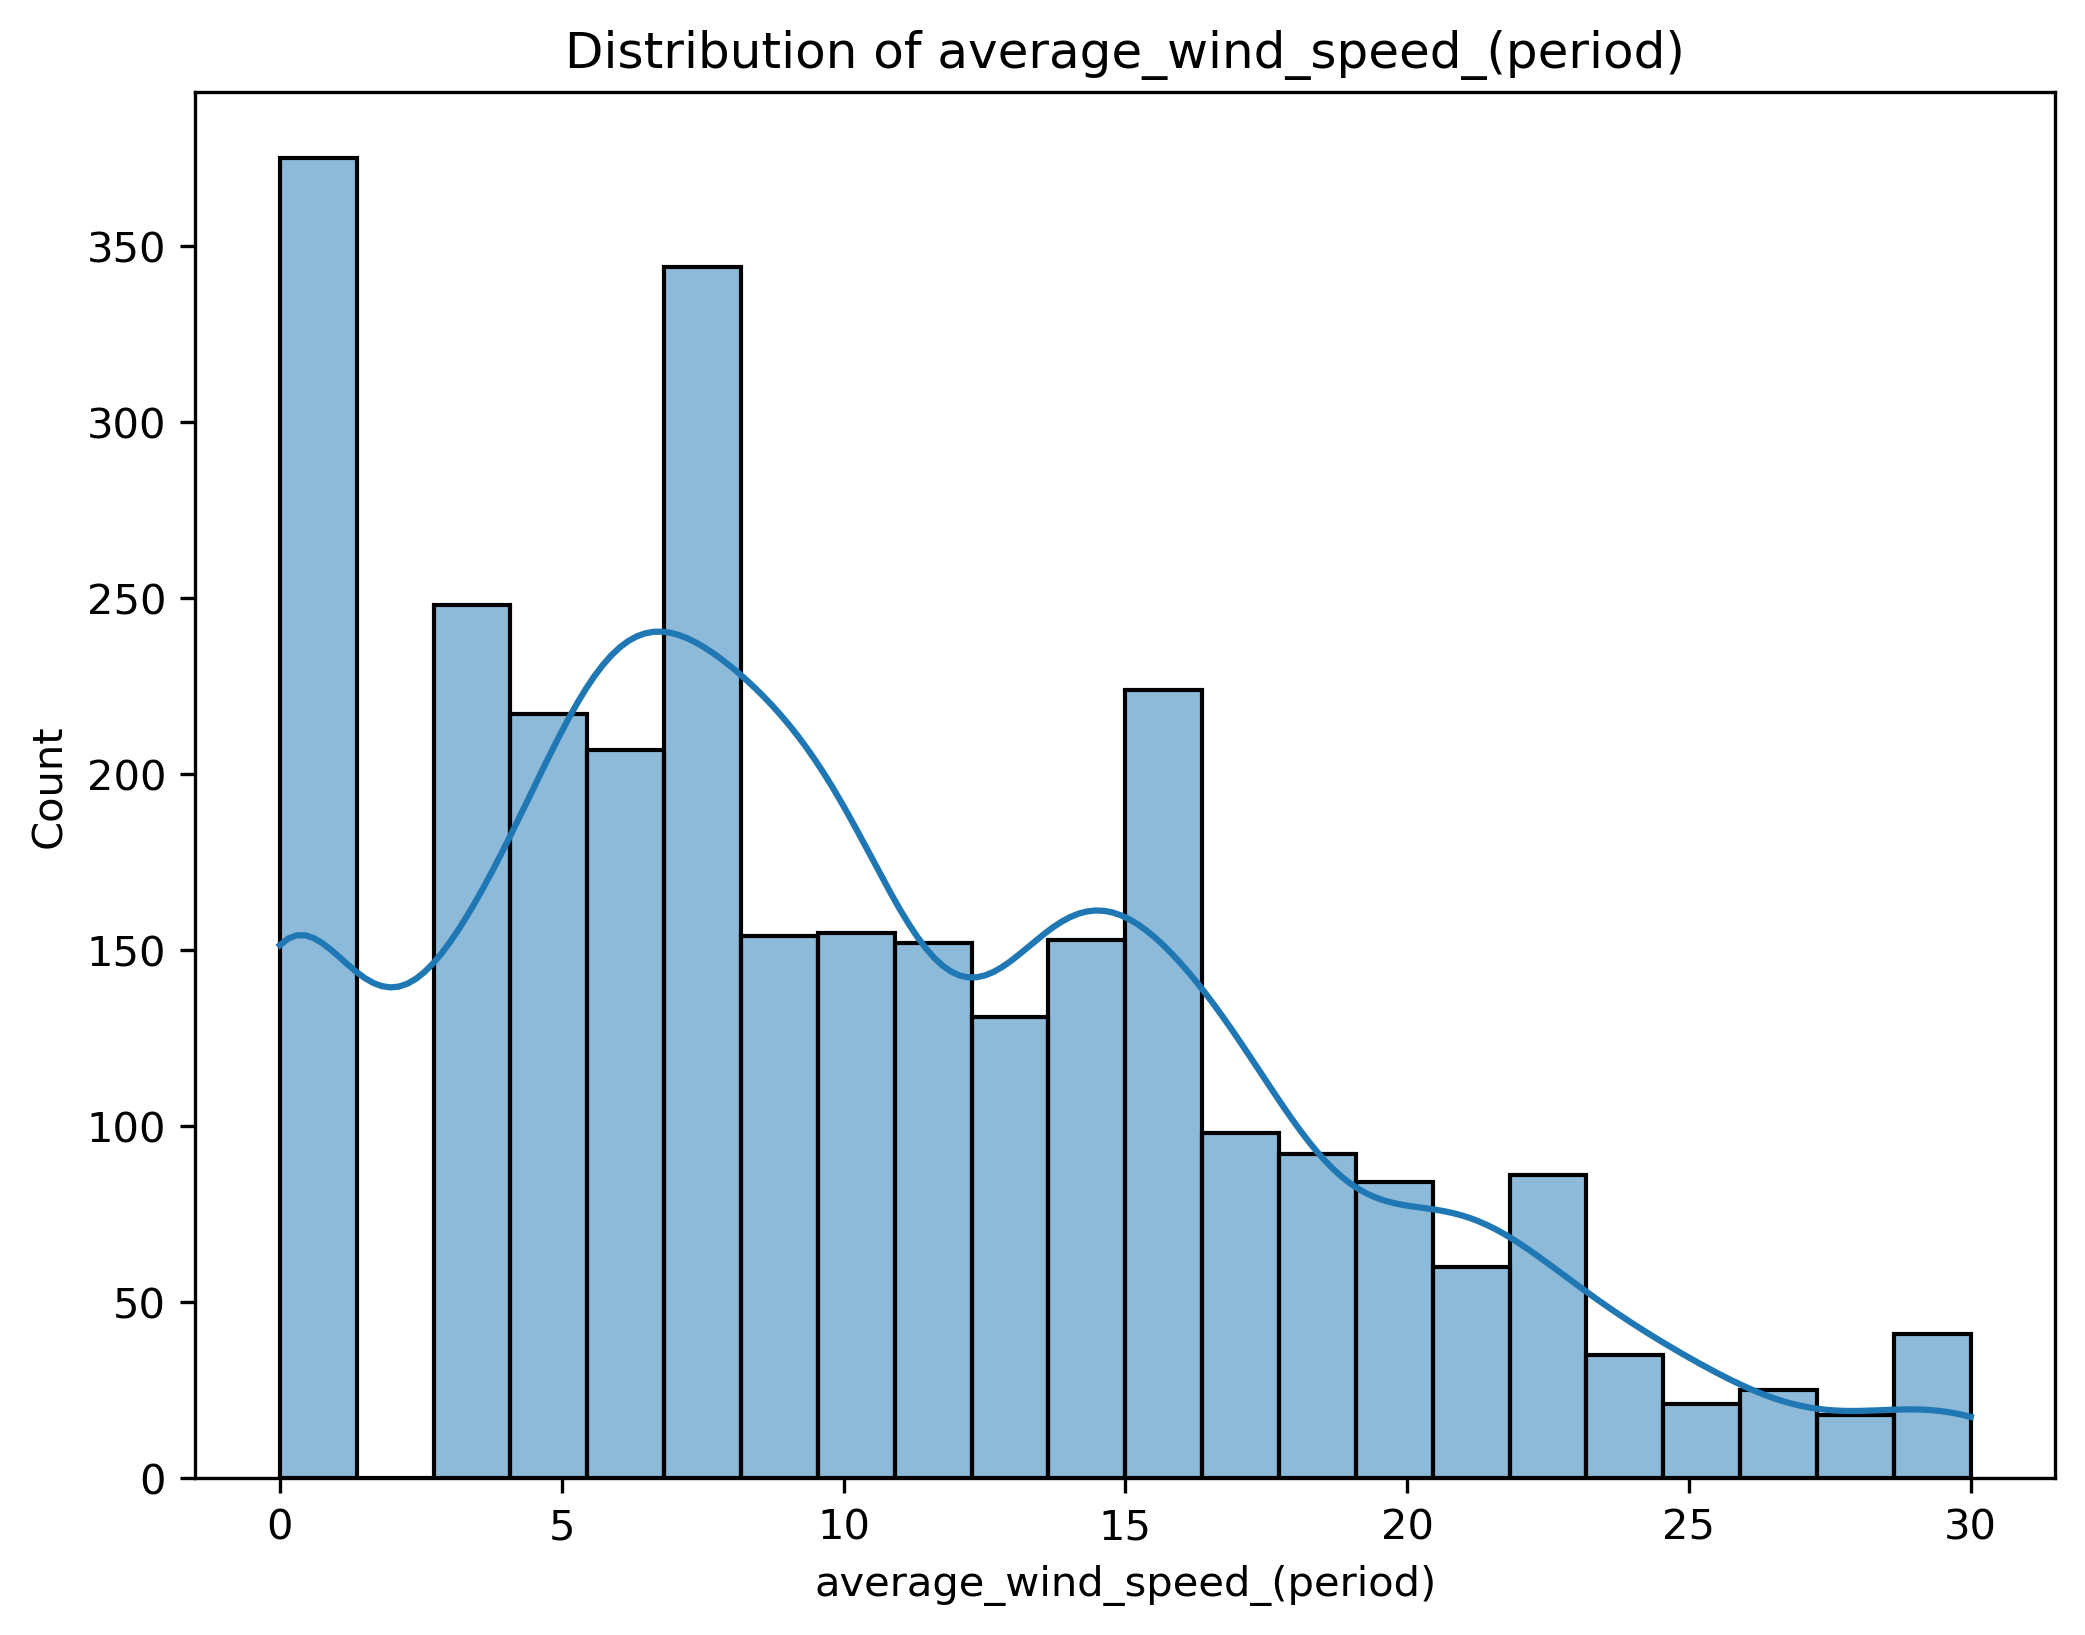

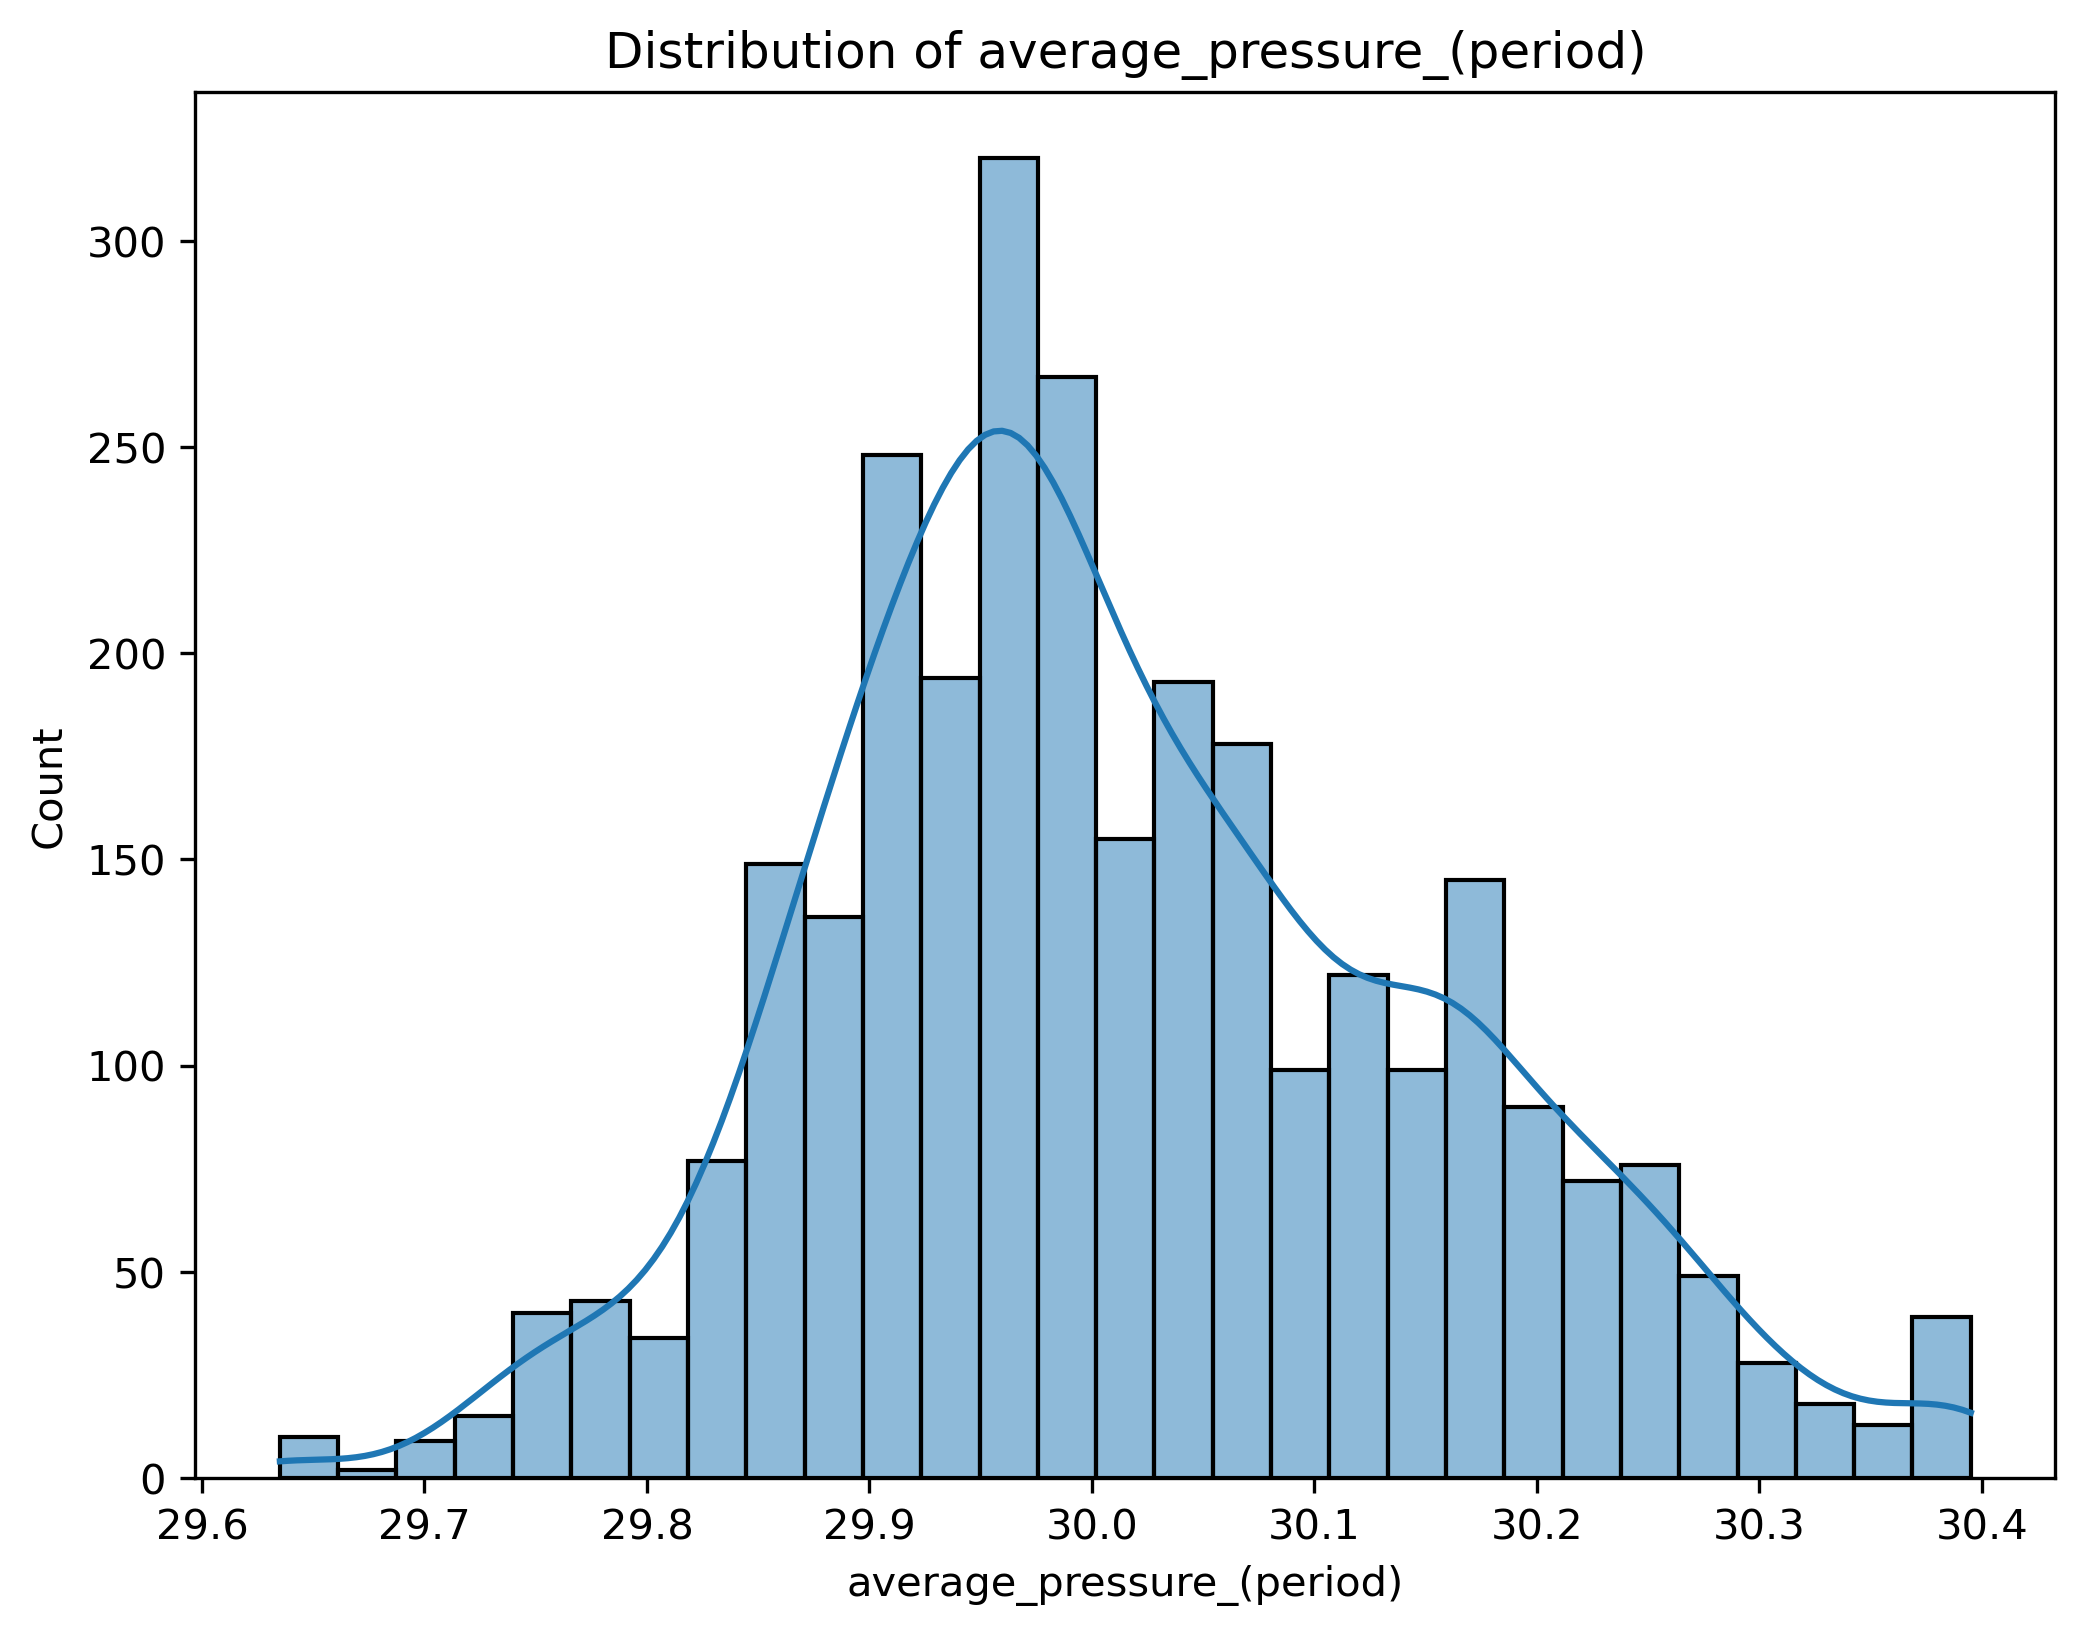

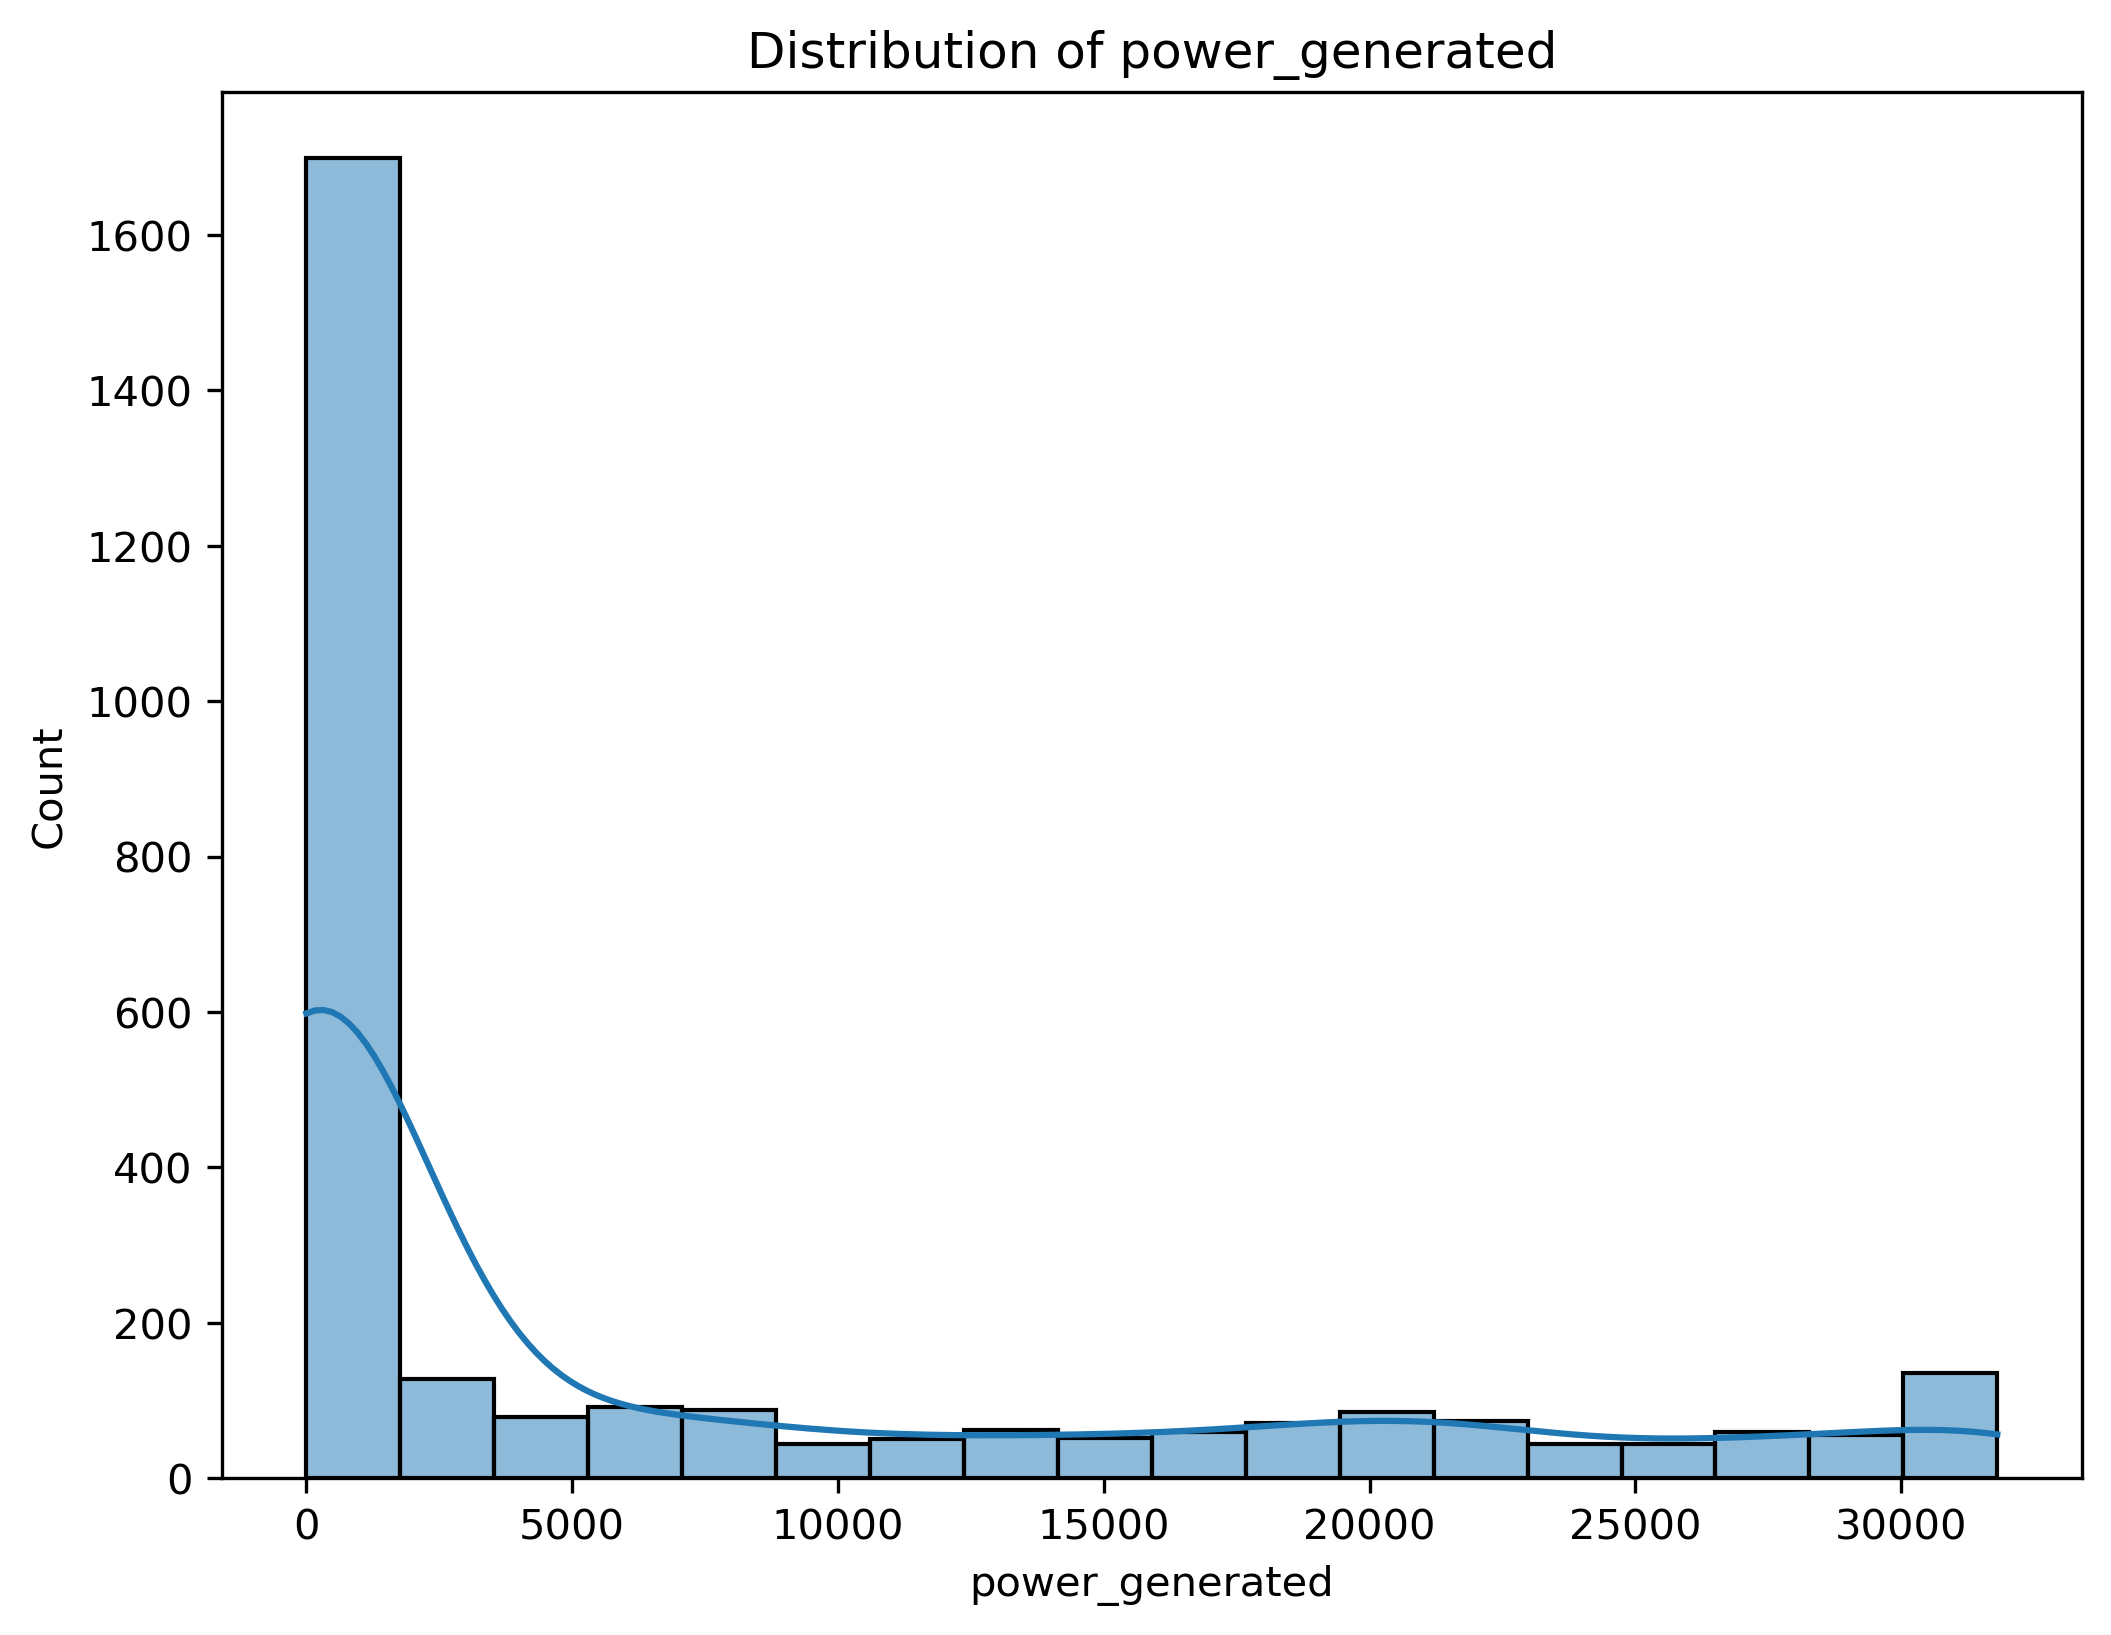

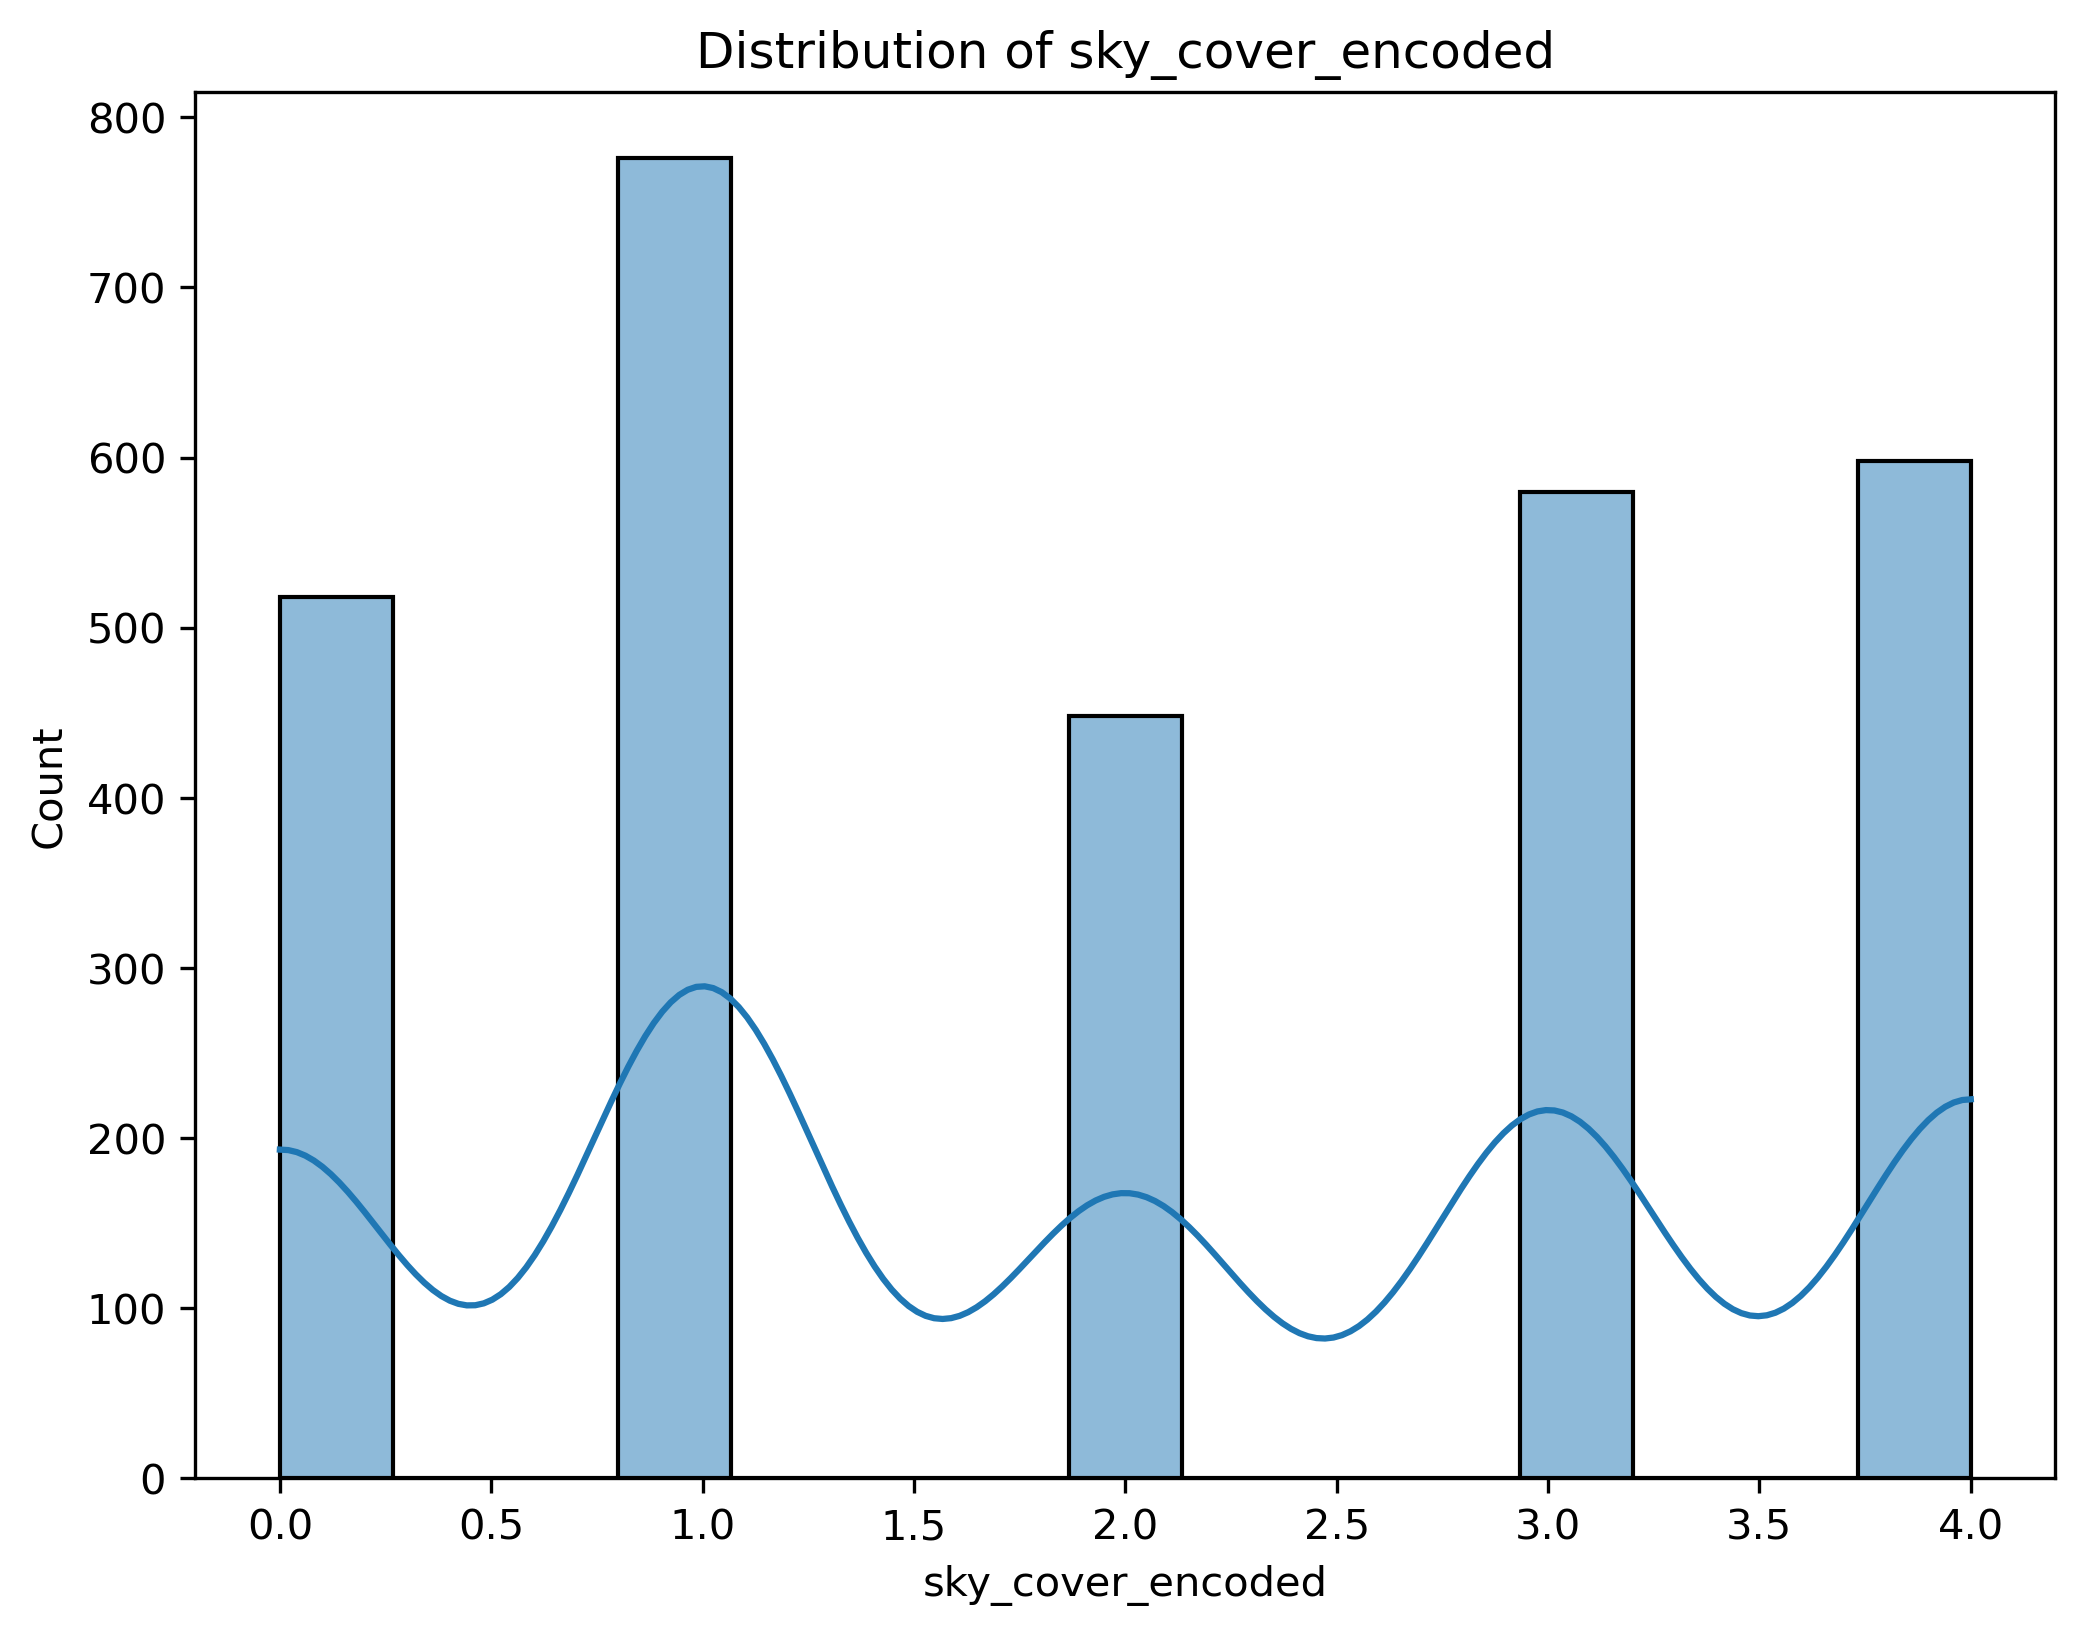

In [43]:
# Check data distribution (using histograms)
for col in df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)  # Include KDE for smoother distribution
  plt.title(f'Distribution of {col}')
  plt.show()

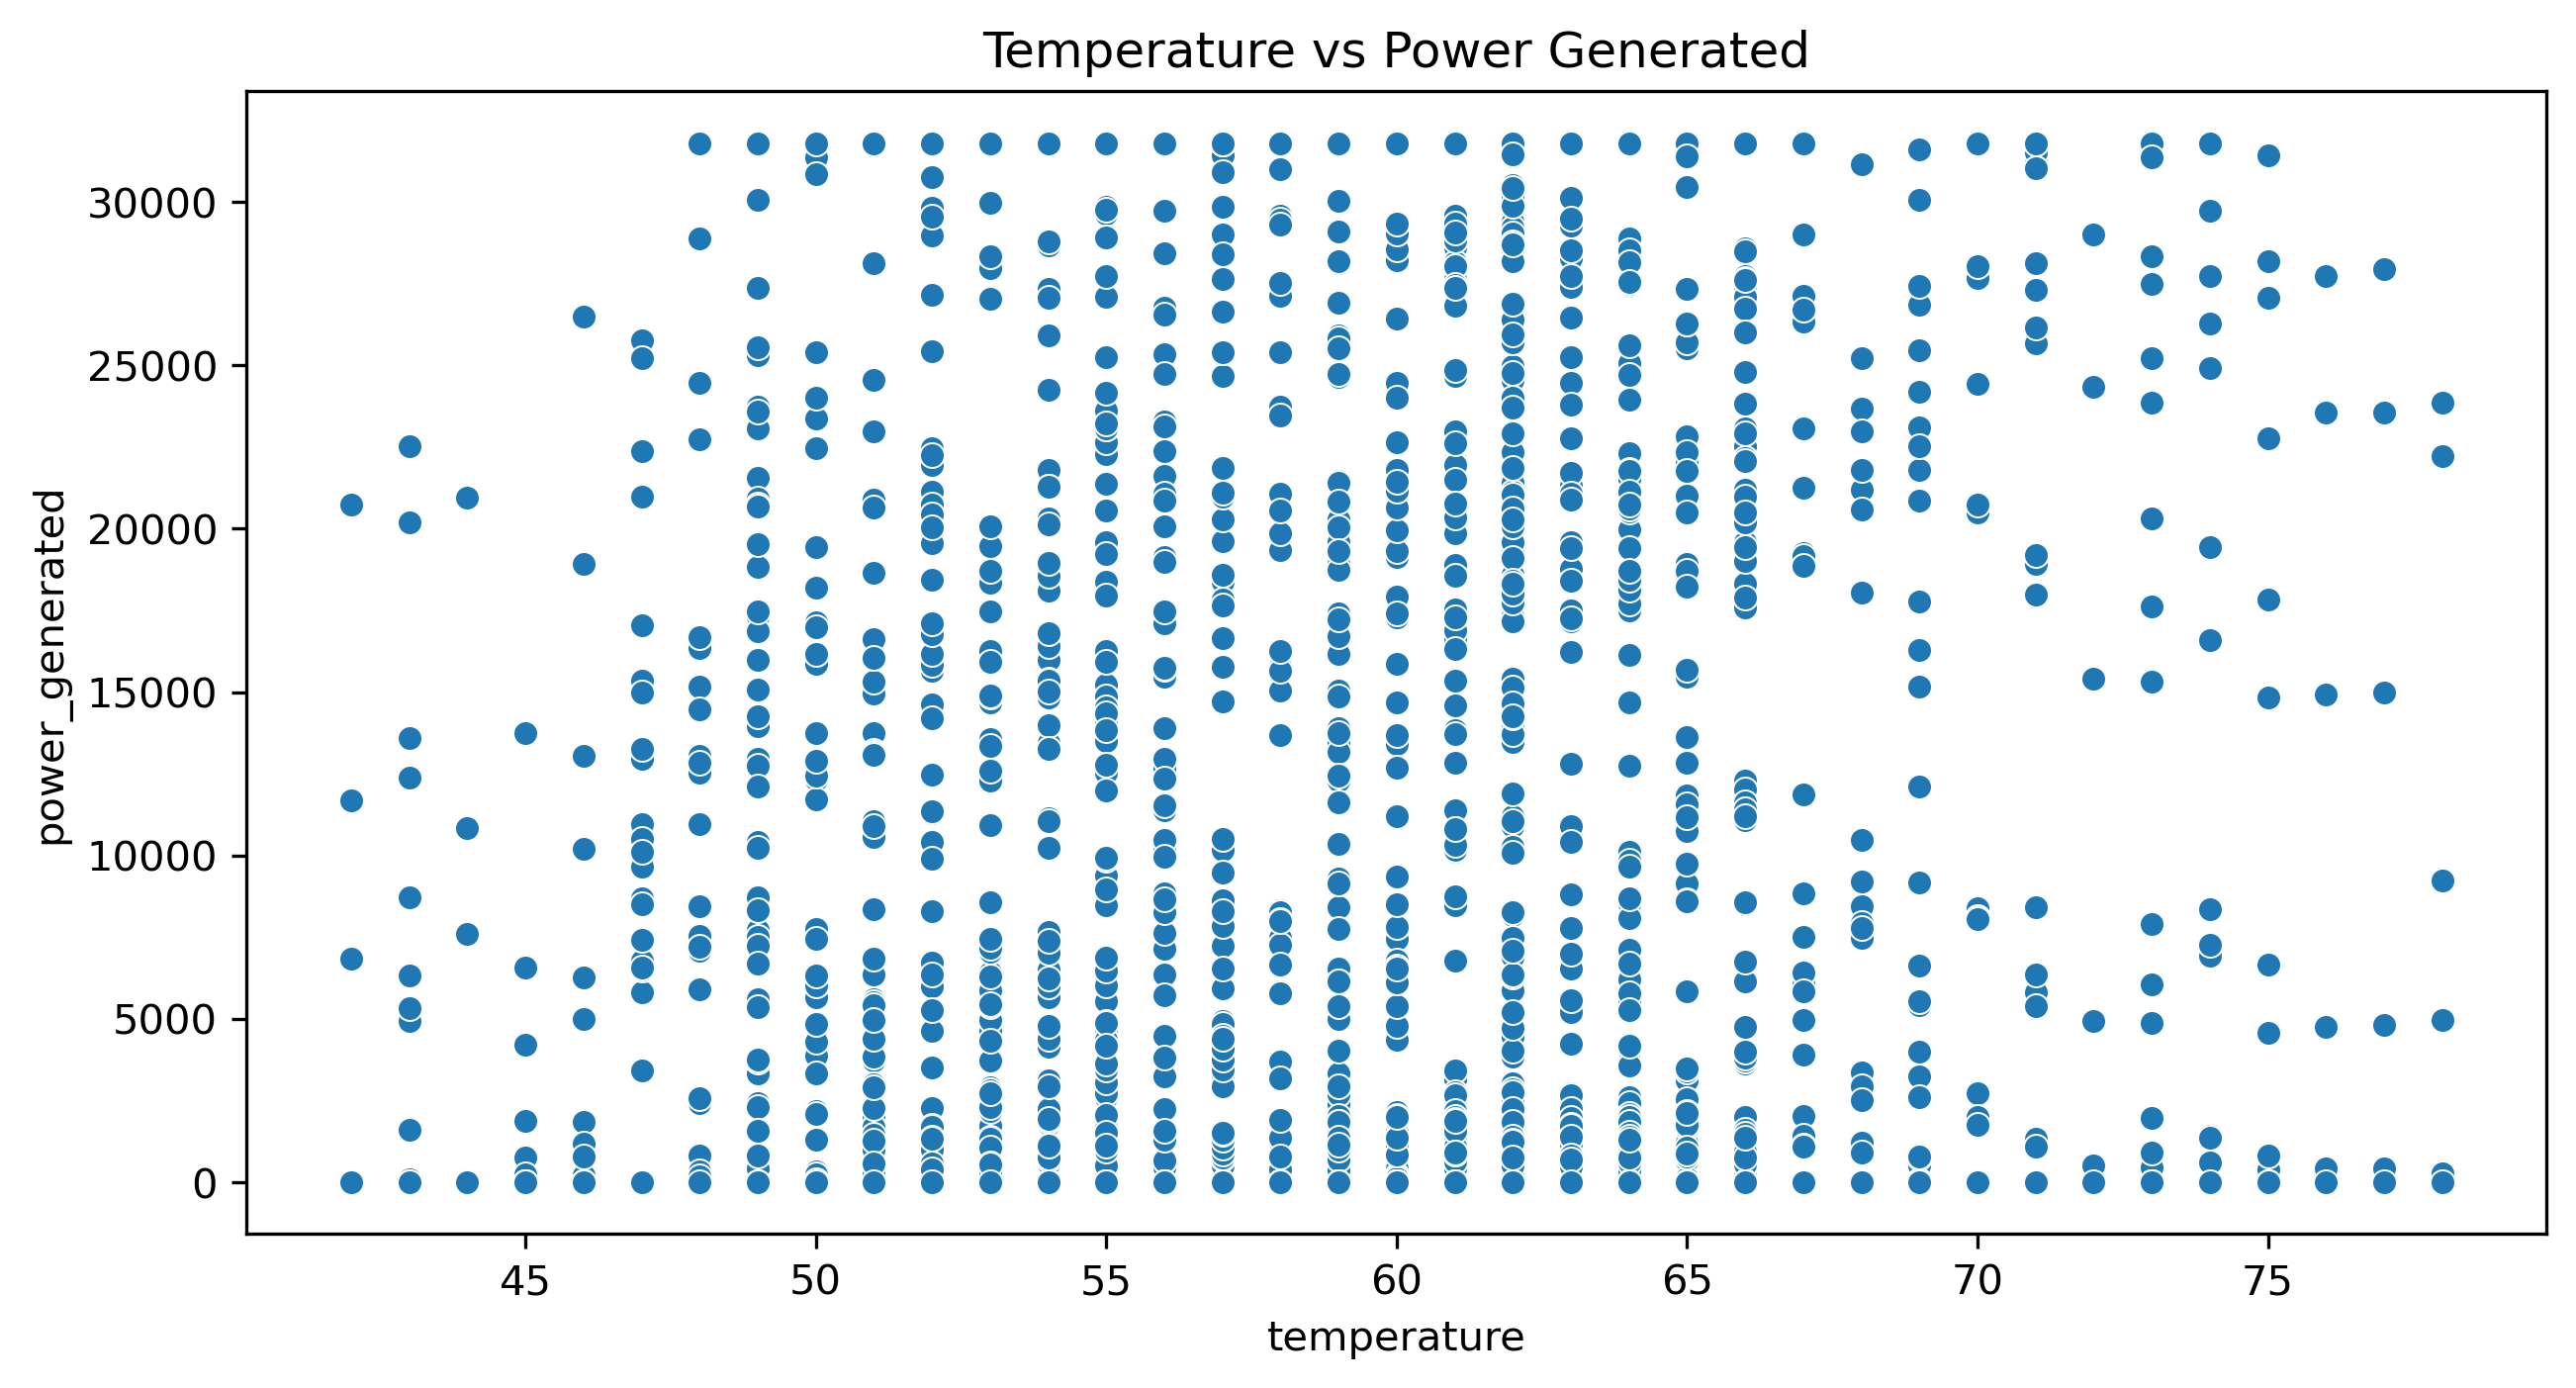

In [44]:
#Scatterplot between independent features and target features
sns.scatterplot(x='temperature', y='power_generated', data=df)
plt.title("Temperature vs Power Generated")
plt.show()


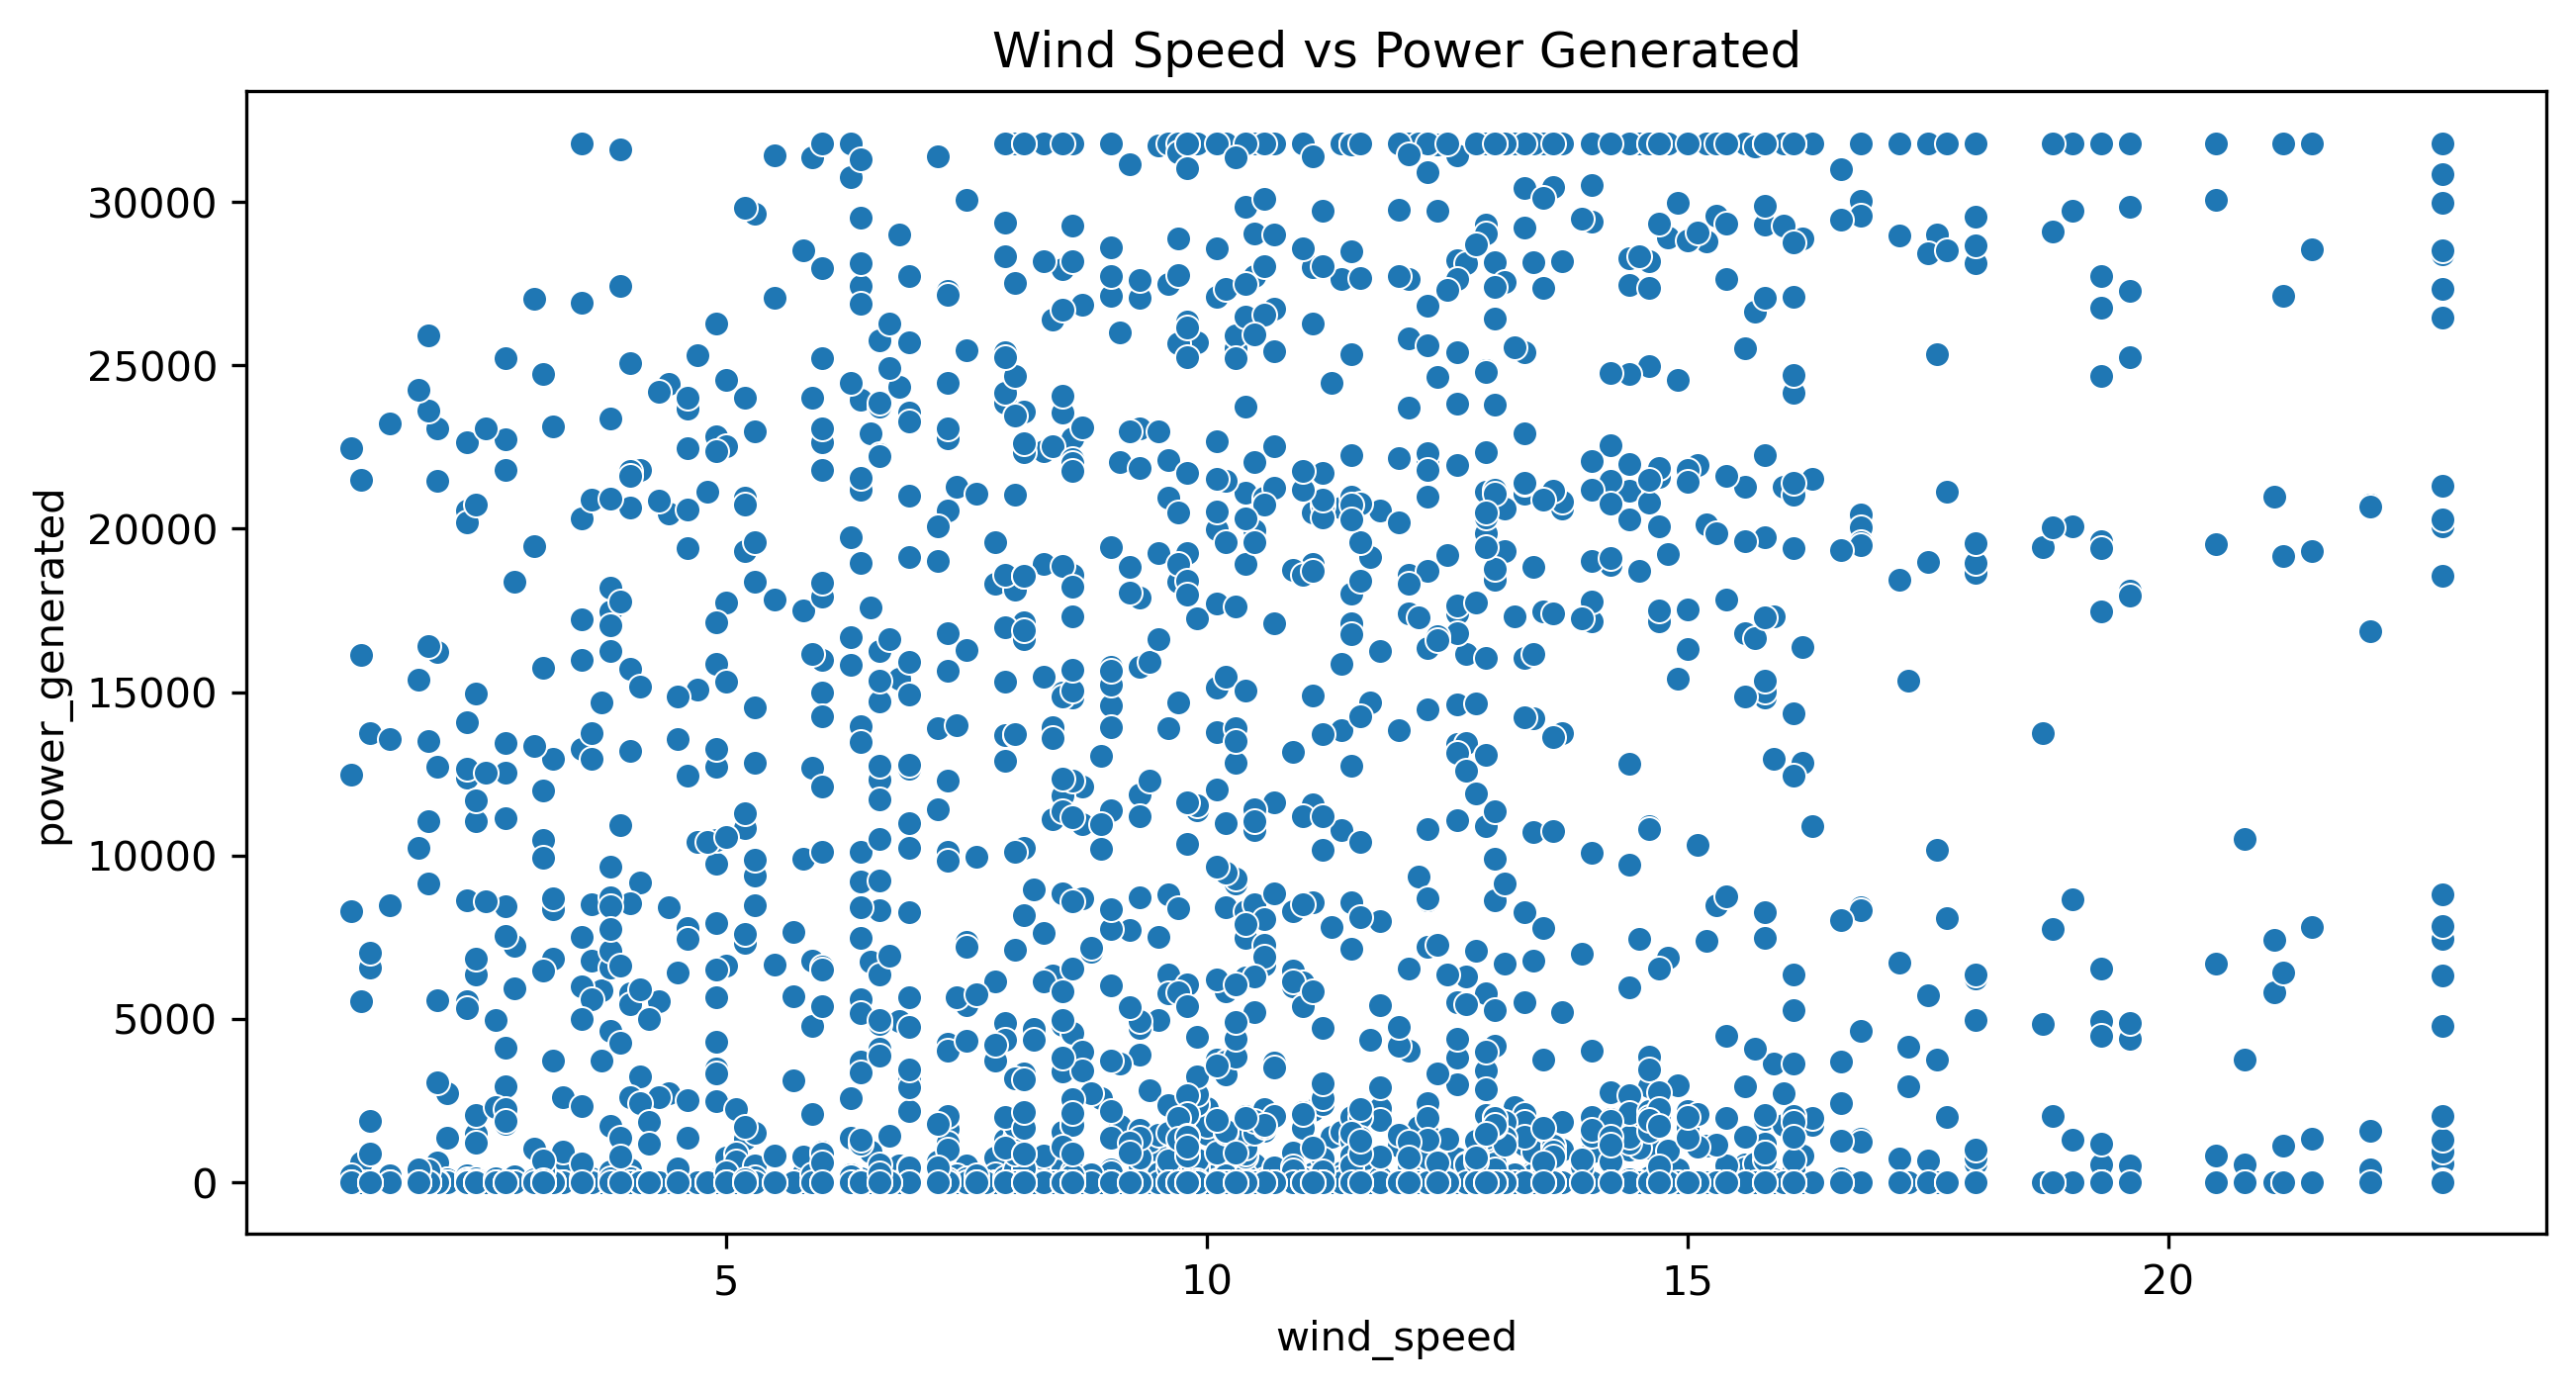

In [45]:
sns.scatterplot(x='wind_speed', y='power_generated', data=df)
plt.title("Wind Speed vs Power Generated")
plt.show()

#
sns.pairplot(df)
plt.show()


# FEATURE SCALING


In [46]:
scaler = StandardScaler()
x = df.drop(columns = "power_generated")
x = scaler.fit_transform(x)
y =df["power_generated"]

In [47]:
x

array([[ 1.19676525,  1.53968751,  0.42685627, ..., -0.29297062,
        -1.41457987, -1.40796236],
       [ 0.4203095 ,  1.53968751,  0.42685627, ..., -0.71061466,
        -1.19939168, -1.40796236],
       [-0.35614625,  1.53968751,  0.42685627, ..., -1.40668806,
        -0.91247409, -1.40796236],
       ...,
       [-0.70073508,  0.66249821,  0.1822683 , ...,  1.51682022,
        -0.98420349,  0.00873305],
       [ 0.07273813,  0.66249821,  0.1822683 , ...,  0.9599615 ,
        -1.05593289,  0.00873305],
       [ 0.84621133,  0.66249821,  0.1822683 , ...,  0.12467342,
        -0.84074469, -0.69961466]])

# MODEL BUILDING

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#SPLITTING THE DATA INTO TRAINING AND TESTING SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =1)

In [50]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2336, 8), (2336,), (584, 8), (584,))

# MODEL 1: LINEAR REGRESSION

In [51]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predictions
y_train_pred = lr.predict(x_train)  # Train predictions
y_test_pred = lr.predict(x_test)    # Test predictions

# Metrics
print("Linear Regression Results:")
print("Train R2 Score:", np.round(r2_score(y_train, y_train_pred), 4))
print("Test R2 Score:", np.round(r2_score(y_test, y_test_pred), 4))
print("MAE:", np.round(mean_absolute_error(y_test, y_test_pred), 4))
print("MSE:", np.round(mean_squared_error(y_test, y_test_pred), 4))
print("RMSE:", np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))  

Linear Regression Results:
Train R2 Score: 0.6566
Test R2 Score: 0.6518
MAE: 4902.426
MSE: 37565226.0485
RMSE: 6129.0477


# MODEL 2:RIDGE REGRESSION (L2 REGULARIZATION)

In [52]:
# Ridge Regression
from sklearn.linear_model import Ridge,Lasso
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)

# Predictions
r_train = ridge.predict(x_train)  # Train predictions
r_test = ridge.predict(x_test)    # Test predictions

# Metrics
print("Ridge Regression Results:")
print("Train R2 Score:", np.round(r2_score(y_train, r_train), 4))
print("Test R2 Score:", np.round(r2_score(y_test, r_test), 4))
print("MAE:", np.round(mean_absolute_error(y_test, r_test), 4))  
print("MSE:", np.round(mean_squared_error(y_test, r_test), 4))   
print("RMSE:", np.round(np.sqrt(mean_squared_error(y_test, r_test)), 4))  

Ridge Regression Results:
Train R2 Score: 0.6566
Test R2 Score: 0.6518
MAE: 4902.3504
MSE: 37565935.9828
RMSE: 6129.1056


# MODEL 3: LASSO REGRESSION (L1 REGULARIZATION)

In [53]:
# Lasso Regression
lasso = Lasso(alpha=0.5)
lasso.fit(x_train, y_train)

# Predictions
l_train = lasso.predict(x_train)  # Train predictions
l_test = lasso.predict(x_test)    # Test predictions

# Metrics
print("Lasso Regression Results:")
print("Train R2 Score:", np.round(r2_score(y_train, l_train), 4))
print("Test R2 Score:", np.round(r2_score(y_test, l_test), 4))
print("MAE:", np.round(mean_absolute_error(y_test, l_test), 4))  
print("MSE:", np.round(mean_squared_error(y_test, l_test), 4))   
print("RMSE:", np.round(np.sqrt(mean_squared_error(y_test, l_test)), 4)) 

Lasso Regression Results:
Train R2 Score: 0.6566
Test R2 Score: 0.6518
MAE: 4902.3834
MSE: 37563685.3066
RMSE: 6128.922


# MODEL 4: DECISION TREE REGRESSOR

In [54]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(x_train, y_train)

# Predictions
dt_train = dt_model.predict(x_train)  # Train predictions
dt_test = dt_model.predict(x_test)    # Test predictions

# Metrics
print("Decision Tree Results:")
print("Train R2 Score:", np.round(r2_score(y_train, dt_train), 4))
print("Test R2 Score:", np.round(r2_score(y_test, dt_test), 4))
print("MAE:", np.round(mean_absolute_error(y_test, dt_test), 4))  
print("MSE:", np.round(mean_squared_error(y_test, dt_test), 4))   
print("RMSE:", np.round(np.sqrt(mean_squared_error(y_test, dt_test)), 4))  

Decision Tree Results:
Train R2 Score: 0.8976
Test R2 Score: 0.8809
MAE: 1850.5333
MSE: 12846817.0266
RMSE: 3584.2457


# MODEL 5: RANDOM FOREST REGRESSOR

In [55]:
# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(x_train, y_train)

# Predictions
rf_train = rf_model.predict(x_train)
rf_test = rf_model.predict(x_test)

# Metrics
print("Random Forest Regressor Results:")
print("Train R2 Score:", np.round(r2_score(y_train, rf_train), 4))
print("Test R2 Score:", np.round(r2_score(y_test, rf_test), 4))
print("MAE:", np.round(mean_absolute_error(y_test, rf_test), 4))
print("MSE:", np.round(mean_squared_error(y_test, rf_test), 4))
print("RMSE:", np.round(np.sqrt(mean_squared_error(y_test, rf_test)), 4))

Random Forest Regressor Results:
Train R2 Score: 0.9871
Test R2 Score: 0.9137
MAE: 1424.1009
MSE: 9311849.3565
RMSE: 3051.5323


# MODEL 6: GRADIENT BOOSTING REGRESSOR

In [56]:
# Gradient Boosting Regressor Model
from sklearn.ensemble import GradientBoostingRegressor
# Model initialization and training
gbr_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1, random_state=42)
gbr_model.fit(x_train, y_train)

# Predictions
pred_gbr_train = gbr_model.predict(x_train)  # Train predictions
pred_gbr_test = gbr_model.predict(x_test)    # Test predictions

# Metrics
print("Gradient Boosting Results:") 
print("Train R2 Score:", np.round(r2_score(y_train, pred_gbr_train), 4))
print("Test R2 Score:", np.round(r2_score(y_test, pred_gbr_test), 4))
print("MAE:", np.round(mean_absolute_error(y_test, pred_gbr_test), 4))
print("MSE:", np.round(mean_squared_error(y_test, pred_gbr_test), 4))
print("RMSE:", np.round(np.sqrt(mean_squared_error(y_test, pred_gbr_test)), 4))


Gradient Boosting Results:
Train R2 Score: 0.9452
Test R2 Score: 0.9163
MAE: 1597.7367
MSE: 9032802.5371
RMSE: 3005.4621


# MODEL 7:XGBOOST REGRESSOR

In [57]:
import xgboost as xgb
# Model initialization and training
xgb_model = xgb.XGBRegressor(n_estimators=100,max_depth=3,learning_rate =0.1,random_state=42)
xgb_model.fit(x_train, y_train)

# Predictions
pred_xgb_train = xgb_model.predict(x_train)  # Train predictions
pred_xgb_test = xgb_model.predict(x_test)    # Test predictions

# Metrics
print("XGBoost Regressor Results:")  
print("Train R2 Score:", np.round(r2_score(y_train, pred_xgb_train), 4))
print("Test R2 Score:", np.round(r2_score(y_test, pred_xgb_test), 4))
print("MAE:", np.round(mean_absolute_error(y_test, pred_xgb_test), 4))
print("MSE:", np.round(mean_squared_error(y_test, pred_xgb_test), 4))
print("RMSE:", np.round(np.sqrt(mean_squared_error(y_test, pred_xgb_test)), 4))


XGBoost Regressor Results:
Train R2 Score: 0.9403
Test R2 Score: 0.9147
MAE: 1602.0085
MSE: 9199519.8244
RMSE: 3033.071


# MODEL 8: XGBOOST REGRESSOR WITH POLYNOMIAL FEAUTRES

In [58]:
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# XGBoost Model Initialization
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

# Fit the model
xgb_model.fit(X_train_poly, y_train)

# Predictions
xgb_train = xgb_model.predict(X_train_poly)
xgb_test = xgb_model.predict(X_test_poly)

# Metrics
print("XGBoost with Polynomial Features Results:")
print("Train R2 Score:", np.round(r2_score(y_train, xgb_train), 4))
print("Test R2 Score:", np.round(r2_score(y_test, xgb_test), 4))
print("MAE:", np.round(mean_absolute_error(y_test, xgb_test), 4))
print("MSE:", np.round(mean_squared_error(y_test, xgb_test), 4))
print("RMSE:", np.round(np.sqrt(mean_squared_error(y_test, xgb_test)), 4))

XGBoost with Polynomial Features Results:
Train R2 Score: 0.9493
Test R2 Score: 0.9155
MAE: 1577.4634
MSE: 9119892.9498
RMSE: 3019.9161


In [59]:
#Gradient Boosting achieves the best R² score (0.9163) on the test set while keeping RMSE and MAE low.
#While XGBoost with polynomial features is close, it slightly underperforms on RMSE compared to Gradient Boosting.

In [60]:
#Good Generalization: It has a strong test R² score, indicating good generalization to unseen data.
#Lower Errors: Both MAE and RMSE are smaller than those of linear models and closer to other high-performing models (like XGBoost).
#Less Overfitting: While the Random Forest model shows a very high R² score on the training set (0.9871), its test R² score of 0.9137 suggests that Gradient Boosting is less prone to overfitting compared to Random Forest.

In [61]:
# Save the model using pickle
import pickle
with open('gbr_model.pkl', 'wb') as model_file:
    pickle.dump(gbr_model, model_file)

In [63]:
with open('scaler_model.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
